## TELECOM CHURN CASE STUDY

- RAHUL NAIR & DHARINI

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

D:\Applns\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
## Reading Data
#df=pd.read_csv(r'D:\Upgrad\Telecom-Assi\telecom_churn_data.csv')


In [3]:
## Reading Data
df=pd.read_csv('telecom_churn_data.csv',encoding = "ISO-8859-1")
df.shape

(99999, 226)

In [4]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [5]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000  96062.000000  96140.000000  94621.000000  92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000           96062.0           96140.0           94621.0   
mean    7.001207e+09      109.0             0.0             0.0             0.0    282.987358    278.536648    279.154731    261.645069    132.395875    133.670805    133.018098    130.302327    197.935577    197.045133    196.574803    190.337222       9.950013       7.149898       7.292981       6.343841      13.911337       9.818732       9.971890       8.555519         47.100763         46.473010         45.887806         44.584446         93.342088         91.397131         91.755128         90.463192          3.751013          3.792985          3.677991          3.655123          1.123056          1.368500          1.433821          1.232726    144.201175    141.670476    141.328209    138.709970         79.829870         83.299598         83.282673         82.342919         87.299624         90.804137         89.838390         86.276622          1.129011          1.115010          1.067792          1.042362               0.0               0.0               0.0   
std     6.956694e+05        0.0             0.0             0.0             0.0    328.439770    338.156291    344.474791    341.998630    297.207406    308.794148    308.951589    308.477668    316.851613    325.862803    327.170662    319.396092      72.825411      73.447948      68.402466      57.137537      71.443196      58.455762      64.713221      58.438186        150.856393        155.318705        151.184830        147.995390        162.780544        157.492308        156.537048        158.681454         14.230438         14.264986         13.270996         13.457549          5.448946          7.533445          6.783335          5.619021    251.751489    248.731086    245.914311    245.934517        252.476533        263.631042        265.486090        267.184991        255.617850        269.347911        271.757783        261.407396          7.984970          8.599406          7.905971          8.261770               0.0               0.0               0.0   
min     7.000000e+09      109.0             0.0             0.0    

In [6]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [7]:
# Check for Duplicates
df[df.duplicated(keep='last')]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

#### There are no duplicate value

In [8]:
telecom=df.copy()

### HIGH VALUE CUSTOMER:

####  To find high value customer we will need to find total recharge amount creating new column for the same

In [9]:
col_names = [col for col in df.columns if 'total_rech_' in col]
print(col_names)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [10]:
#creating new total amount columns for each month

df["total_data_rech_amt_6"] = df["total_rech_data_6"]  * df['av_rech_amt_data_6']
df["total_data_rech_amt_7"] = df["total_rech_data_7"]  * df['av_rech_amt_data_7']
df["total_data_rech_amt_8"] = df["total_rech_data_8"]  * df['av_rech_amt_data_8']
df["total_data_rech_amt_9"] = df["total_rech_data_9"]  * df['av_rech_amt_data_9']

In [11]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

### Finding the high value customer
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [12]:
#Average of Recharge Amount in 6th and 7th Month
av_rech_amt = (df["total_rech_amt_6"].fillna(0) + df["total_data_rech_amt_6"].fillna(0) + 
df["total_rech_amt_7"].fillna(0) + df["total_data_rech_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
av_rech_amt_70 = np.percentile(av_rech_amt, 70.0)
print('70th percentile of 6th and 7th months avg rech amt: ', av_rech_amt_70)

df_cust = df[av_rech_amt >= av_rech_amt_70]
print('Shape after high value customer filtering: ', df_cust.shape)

70th percentile of 6th and 7th months avg rech amt:  478.0
Shape after high value customer filtering:  (30001, 230)


In [13]:
## We can drop unwanted columns for data recharge
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df_cust.drop(drop_col, axis=1, inplace=True)

#### DATA CLEANING:
##### TREATING COLUMNS WITH SINGLE VALUES:

In [14]:
#List of columns with only 1 unqiue value
col_list = df_cust.loc[:,df_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9
0         109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014               NaN               NaN               0.0               NaN               NaN               NaN               0.0               NaN
7         109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014               0.0               0.0               0.0               NaN               0.0               0.0               0.0               NaN
8         109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
21        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
23        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0

In [15]:
col_list.shape[1]

16

In [16]:
#There are 16 columns with only 1 unique value. Removing the same
df_cust = df_cust.loc[:,df_cust.apply(pd.Series.nunique) != 1]
df_cust.shape

(30001, 206)

##### MOBILE NUMBER COLUMN:

In [17]:
### Checking mobile number 
df_cust['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7001560797    1
7002001474    1
7000688705    1
7001669696    1
Name: mobile_number, dtype: int64

In [18]:
### Deleting Mobile number as it is inseignificant
df_cust.pop('mobile_number')

0        7000842753
7        7000701601
8        7001524846
21       7002124215
23       7000887461
            ...    
99981    7000630859
99984    7000661676
99986    7001729035
99988    7002111859
99997    7000498689
Name: mobile_number, Length: 30001, dtype: int64

#### Check for duplicates

In [19]:
## Checking for Duplicates
df_cust[df_cust.duplicated(keep='last')]

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_t2f_mou_9, ...]
Index: []

#### There are no Duplicates

##### COLUMN-WISE NULL VALUE TREATMENT:

In [20]:
#Getting total number of nulls
total = df_cust.isnull().sum().sort_values(ascending=False)
#Getting Percentage values
percent = (df_cust.isnull().sum()/df_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

Total  Percent
total_data_rech_amt_9     14781    49.27
fb_user_9                 14781    49.27
night_pck_user_9          14781    49.27
arpu_3g_9                 14781    49.27
count_rech_3g_9           14781    49.27
count_rech_2g_9           14781    49.27
max_rech_data_9           14781    49.27
arpu_2g_9                 14781    49.27
date_of_last_rech_data_9  14781    49.27
total_data_rech_amt_8     14048    46.83
night_pck_user_8          14048    46.83
arpu_3g_8                 14048    46.83
arpu_2g_8                 14048    46.83
count_rech_3g_8           14048    46.83
date_of_last_rech_data_8  14048    46.83
count_rech_2g_8           14048    46.83
max_rech_data_8           14048    46.83
fb_user_8                 14048    46.83
night_pck_user_6          13245    44.15
arpu_2g_6                 13245    44.15
count_rech_2g_6           13245    44.15
count_rech_3g_6           13245    44.15
max_rech_data_6           13245    44.15
fb_user_6                 13245    44.15
date_of_last_rech_data_6  13245    44.15
arpu_3g_6                 13245    44.15
total_data_rech_amt_6     13245    44.15
max_rech_data_7           12944    43.15
arpu_3g_7                 12944    43.15
date_of_last_rech_data_7  12944    43.15
count_rech_2g_7           12944    43.15
count_rech_3g_7           12944    43.15
arpu_2g_7                 12944    43.15
night_pck_user_7          12944    43.15
total_data_rech_amt_7     12944    43.15
fb_user_7                 12944    43.15
offnet_mou_9               1901     6.34
std_ic_t2f_mou_9           1901     6.34
loc_og_t2t_mou_9           1901     6.34
roam_og_mou_9              1901     6.34
std_ic_mou_9               1901     6.34
roam_ic_mou_9              1901     6.34
ic_others_9                1901     6.34
loc_og_t2f_mou_9           1901     6.34
onnet_mou_9                1901     6.34
spl_ic_mou_9               1901     6.34
spl_og_mou_9               1901     6.34
og_others_9                1901     6.34
loc_ic_t2m_mou_9           1901     6.34
loc_og_t2m_mou_9           1901     6.34
loc_ic_t2t_mou_9           1901     6.34
loc_ic_mou_9               1901     6.34
std_ic_t2t_mou_9           1901     6.34
loc_ic_t2f_mou_9           1901     6.34
isd_og_mou_9               1901     6.34
std_og_mou_9               1901     6.34
isd_ic_mou_9               1901     6.34
std_og_t2f_mou_9           1901     6.34
std_og_t2t_mou_9           1901     6.34
std_ic_t2m_mou_9           1901     6.34
std_og_t2m_mou_9           1901     6.34
loc_og_t2c_mou_9           1901     6.34
loc_og_mou_9               1901     6.34
loc_ic_t2m_mou_8           1174     3.91
loc_ic_t2f_mou_8           1174     3.91
std_ic_t2t_mou_8           1174     3.91
std_ic_t2m_mou_8           1174     3.91
spl_ic_mou_8               1174     3.91
loc_ic_mou_8               1174     3.91
std_ic_t2f_mou_8           1174     3.91
std_og_mou_8               1174     3.91
loc_ic_t2t_mou_8           1174     3.91
loc_og_t2f_mou_8           1174     3.91
onnet_mou_8                1174     3.91
offnet_mou_8               1174     3.91
roam_ic_mou_8              1174     3.91
roam_og_mou_8              1174     3.91
loc_og_t2t_mou_8           1174     3.91
loc_og_t2m_mou_8           1174     3.91
loc_og_t2c_mou_8           1174     3.91
og_others_8                1174     3.91
loc_og_mou_8               1174     3.91
std_og_t2t_mou_8           1174     3.91
std_og_t2m_mou_8           1174     3.91
std_og_t2f_mou_8           1174     3.91
isd_og_mou_8               1174     3.91
spl_og_mou_8               1174     3.91
isd_ic_mou_8               1174     3.91
std_ic_mou_8               1174     3.91
ic_others_8                1174     3.91
date_of_last_rech_9         815     2.72
date_of_last_rech_8         583     1.94
ic_others_6                 545     1.82
std_og_t2f_mou_6            545     1.82
loc_og_mou_6                545     1.82
std_og_t2t_mou_6            545     1.82
std_ic_t2t_mou_6            545     1.82
std_og_t

##### There are categorical data and there are missing data in the same. Imputing with -1 a new level

In [21]:
catcols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
# replace missing values with '-1' in categorical columns
df_cust[catcols] = df_cust[catcols].apply(lambda x: x.fillna(-1))

###### We can see there are many missing values and most of them are related to mobile data. We can see the date of recharge is also 0 that means the customer has not recharged that month.

#### Trying to impute values 

In [22]:
#### We can impute 0 to this value as it means the customer has not recharged.
col_zero = ['total_data_rech_amt_9', 'count_rech_2g_9', 'count_rech_3g_9', 'max_rech_data_9',
        'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_9',
         'total_data_rech_amt_8', 'count_rech_3g_8', 'max_rech_data_8','arpu_2g_8',
        'count_rech_2g_8','arpu_2g_6','count_rech_2g_6','max_rech_data_6','arpu_3g_6',
           'total_data_rech_amt_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','arpu_2g_7',
            'total_data_rech_amt_7','arpu_3g_7','max_rech_data_7'
       ]
df_cust[col_zero] = df_cust[col_zero].apply(lambda x: x.fillna(0))

In [23]:
#Getting total number of nulls
total = df_cust.isnull().sum().sort_values(ascending=False)
#Getting Percentage values
percent = (df_cust.isnull().sum()/df_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
date_of_last_rech_data_9  14781    49.27
date_of_last_rech_data_8  14048    46.83
date_of_last_rech_data_6  13245    44.15
date_of_last_rech_data_7  12944    43.15
loc_og_mou_9               1901     6.34
std_og_mou_9               1901     6.34
isd_og_mou_9               1901     6.34
loc_og_t2c_mou_9           1901     6.34
std_og_t2f_mou_9           1901     6.34
roam_og_mou_9              1901     6.34
std_og_t2t_mou_9           1901     6.34
loc_og_t2f_mou_9           1901     6.34
spl_og_mou_9               1901     6.34
loc_og_t2m_mou_9           1901     6.34
og_others_9                1901     6.34
loc_ic_t2t_mou_9           1901     6.34
loc_og_t2t_mou_9           1901     6.34
isd_ic_mou_9               1901     6.34
ic_others_9                1901     6.34
std_ic_t2f_mou_9           1901     6.34

In [24]:
# Dropping columns
col=percent[percent.values > .15]
print(df_cust.size)
df_cust.drop(columns = list(col.index),inplace=True)
df_cust.shape

6150205


(30001, 201)

In [25]:
df_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 201 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64

In [26]:
#there are 4 features with objct datatype which are dates. Lest treat them
date_col = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']


# convert to datetime
for col in date_col:
    df_cust[col] = pd.to_datetime(df_cust[col])

# convert to categorical
for col in catcols:
    df_cust[col] = df_cust[col].astype(float).astype(int).astype(str)

In [27]:
print(df_cust[date_col].info())
print(df_cust.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
date_of_last_rech_6    29928 non-null datetime64[ns]
date_of_last_rech_7    29903 non-null datetime64[ns]
date_of_last_rech_8    29418 non-null datetime64[ns]
date_of_last_rech_9    29186 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.1 MB
None
(30001, 201)


- There are missing values. Lets derive days from dat column and treat the missing values

In [28]:
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")
last_date_of_month_9 = datetime.datetime.strptime("30-09-2014", "%d-%m-%Y")

In [29]:
# Deriving new features from data columns
df_cust["days_left_rech_6"]= (last_date_of_month_6 - df_cust.date_of_last_rech_6).astype('timedelta64[D]')
df_cust["days_left_rech_7"]= (last_date_of_month_7 - df_cust.date_of_last_rech_7).astype('timedelta64[D]')
df_cust["days_left_rech_8"]= (last_date_of_month_8 - df_cust.date_of_last_rech_8).astype('timedelta64[D]')
df_cust["days_left_rech_9"]= (last_date_of_month_9 - df_cust.date_of_last_rech_9).astype('timedelta64[D]')

In [30]:
df_cust[['days_left_rech_6', 'days_left_rech_7', 'days_left_rech_8','days_left_rech_9']].describe()

days_left_rech_6  days_left_rech_7  days_left_rech_8  days_left_rech_9
count      29928.000000      29903.000000      29418.000000      29186.000000
mean           3.537289          3.730395          4.312462          3.084321
std            4.672795          4.587989          5.270846          4.775478
min            0.000000          0.000000          0.000000          0.000000
25%            0.000000          0.000000          1.000000          0.000000
50%            2.000000          2.000000          3.000000          1.000000
75%            5.000000          5.000000          6.000000          4.000000
max           29.000000         30.000000         30.000000         29.000000

In [31]:
#mean and median are different.Lets impute using mode.
df_cust.loc[np.isnan(df_cust['days_left_rech_6']), ['days_left_rech_6']] = df_cust['days_left_rech_6'].mode()
df_cust.loc[np.isnan(df_cust['days_left_rech_7']), ['days_left_rech_7']] = df_cust['days_left_rech_7'].mode()
df_cust.loc[np.isnan(df_cust['days_left_rech_8']), ['days_left_rech_8']] = df_cust['days_left_rech_8'].mode()
df_cust.loc[np.isnan(df_cust['days_left_rech_9']), ['days_left_rech_9']] = df_cust['days_left_rech_9'].mode()

In [32]:
#lets drop the original data columns
df_cust.drop(date_col, axis=1, inplace=True)

In [33]:
df_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 201 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64

In [34]:
#Getting total number of nulls
total = df_cust.isnull().sum().sort_values(ascending=False)
#Getting Percentage values
percent = (df_cust.isnull().sum()/df_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

Total  Percent
ic_others_9        1901     6.34
loc_og_t2m_mou_9   1901     6.34
loc_og_t2f_mou_9   1901     6.34
loc_og_t2c_mou_9   1901     6.34
std_ic_t2m_mou_9   1901     6.34
loc_og_mou_9       1901     6.34
std_og_t2t_mou_9   1901     6.34
std_ic_t2t_mou_9   1901     6.34
std_og_t2m_mou_9   1901     6.34
std_og_t2f_mou_9   1901     6.34
loc_ic_mou_9       1901     6.34
std_og_mou_9       1901     6.34
isd_og_mou_9       1901     6.34
spl_og_mou_9       1901     6.34
loc_ic_t2f_mou_9   1901     6.34
og_others_9        1901     6.34
loc_ic_t2t_mou_9   1901     6.34
std_ic_t2f_mou_9   1901     6.34
loc_ic_t2m_mou_9   1901     6.34
onnet_mou_9        1901     6.34
std_ic_mou_9       1901     6.34
offnet_mou_9       1901     6.34
roam_ic_mou_9      1901     6.34
roam_og_mou_9      1901     6.34
spl_ic_mou_9       1901     6.34

##### Checking how can we impute the value

In [35]:
df_cust[df_cust['isd_og_mou_9'].isna()][['loc_og_mou_9', 'std_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9']].head()

loc_og_mou_9  std_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9
0             NaN           NaN           NaN          NaN             0.0
7             NaN           NaN           NaN          NaN             0.0
67            NaN           NaN           NaN          NaN             0.0
86            NaN           NaN           NaN          NaN             0.0
111           NaN           NaN           NaN          NaN             0.0

#### As we can see it is ok to replace the value with 0 since the total is 0 

In [36]:
df_cust.fillna(0,inplace=True)

In [37]:
df_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 201 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64

In [38]:
#Getting total number of nulls
total = df_cust.isnull().sum().sort_values(ascending=False)
#Getting Percentage values
percent = (df_cust.isnull().sum()/df_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
days_left_rech_9           0      0.0
spl_og_mou_8               0      0.0
loc_ic_t2t_mou_6           0      0.0
total_og_mou_9             0      0.0
total_og_mou_8             0      0.0
total_og_mou_7             0      0.0
total_og_mou_6             0      0.0
og_others_9                0      0.0
og_others_8                0      0.0
og_others_7                0      0.0
og_others_6                0      0.0
spl_og_mou_9               0      0.0
spl_og_mou_7               0      0.0
std_ic_t2f_mou_9           0      0.0
spl_og_mou_6               0      0.0
isd_og_mou_9               0      0.0
isd_og_mou_8               0      0.0
isd_og_mou_7               0      0.0
isd_og_mou_6               0      0.0
std_og_mou_9               0      0.0
std_og_mou_8               0      0.0
std_og_mou_7               0      0.0
std_og_mou_6               0      0.0
std_og_t2f_mou_9           0      0.0
loc_ic_t2t_mou_7           0      0.0
loc_ic_t2t_mou_8           0      0.0
loc_ic_t2t_mou_9           0      0.0
loc_ic_t2m_mou_6           0      0.0
std_ic_t2f_mou_7           0      0.0
std_ic_t2f_mou_6           0      0.0
std_ic_t2m_mou_9           0      0.0
std_ic_t2m_mou_8           0      0.0
std_ic_t2m_mou_7           0      0.0
std_ic_t2m_mou_6           0      0.0
std_ic_t2t_mou_9           0      0.0
std_ic_t2t_mou_8           0      0.0
std_ic_t2t_mou_7           0      0.0
std_ic_t2t_mou_6           0      0.0
loc_ic_mou_9               0      0.0
loc_ic_mou_8               0      0.0
loc_ic_mou_7               0      0.0
loc_ic_mou_6               0      0.0
loc_ic_t2f_mou_9           0      0.0
loc_ic_t2f_mou_8           0      0.0
loc_ic_t2f_mou_7           0      0.0
loc_ic_t2f_mou_6           0      0.0
loc_ic_t2m_mou_9           0      0.0
loc_ic_t2m_mou_8           0      0.0
loc_ic_t2m_mou_7           0      0.0
std_og_t2f_mou_8           0      0.0
std_og_t2f_mou_7           0      0.0
std_og_t2f_mou_6           0      0.0
loc_og_t2t_mou_9           0      0.0
loc_og_t2t_mou_7           0      0.0
loc_og_t2t_mou_6           0      0.0
roam_og_mou_9              0      0.0
roam_og_mou_8              0      0.0
roam_og_mou_7              0      0.0
roam_og_mou_6              0      0.0
roam_ic_mou_9              0      0.0
roam_ic_mou_8              0      0.0
roam_ic_mou_7              0      0.0
roam_ic_mou_6              0      0.0
offnet_mou_9               0      0.0
offnet_mou_8               0      0.0
offnet_mou_7               0      0.0
offnet_mou_6               0      0.0
onnet_mou_9                0      0.0
onnet_mou_8                0      0.0
onnet_mou_7                0      0.0
onnet_mou_6                0      0.0
arpu_9                     0      0.0
arpu_8                     0      0.0
arpu_7                     0      0.0
loc_og_t2t_mou_8           0      0.0
loc_og_t2m_mou_6           0      0.0
std_og_t2m_mou_9           0      0.0
loc_og_t2m_mou_7           0      0.0
std_og_t2m_mou_8           0      0.0
std_og_t2m_mou_7           0      0.0
std_og_t2m_mou_6           0      0.0
std_og_t2t_mou_9           0      0.0
std_og_t2t_mou_8           0      0.0
std_og_t2t_mou_7           0      0.0
std_og_t2t_mou_6           0      0.0
loc_og_mou_9               0      0.0
loc_og_mou_8               0      0.0
loc_og_mou_7               0      0.0
loc_og_mou_6               0      0.0
loc_og_t2c_mou_9           0      0.0
loc_og_t2c_mou_8           0      0.0
loc_og_t2c_mou_7           0      0.0
loc_og_t2c_mou_6           0      0.0
loc_og_t2f_mou_9           0      0.0
loc_og_t2f_mou_8           0      0.0
loc_og_t2f_mou_7           0      0.0
loc_og_t2f_mou_6           0      0.0
loc_og_t2m_mou_9           0      0.0
loc_og_t2m_mou_8           0      0.0
std_ic_t2f_mou_8           0      0.0
std_ic_mou_6               0      0.0
days_left_rech_8           0      0.0
arpu_2g_9                  0      0.0
sachet_2g_7                0      0.0
sachet_2g_6                0     

- MISSING VALUES IN COLUMNS ARE TREATED.LETS LOOK AT MISSING VALUES IN ROWS.

##### ROW-WISE NULL VALUE TREATMENT:

In [39]:
# sum of misisng values in each row
rows_missing_data = df_cust.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Series([], dtype: int64)

In [40]:
len(rows_missing_data[rows_missing_data <= 0])

30001

 - No missing values in rows

##### MISSING VALUE TREATMENT IS COMPLETED

In [41]:
df_cust.shape

(30001, 201)

##### Finding the type of variable

In [42]:
print('CATEGORICAL VARIABLES - object datatype:\n')
print(list(df_cust.select_dtypes('object').columns))
print('\n')
print('NUMERIC VARIABLES:')
print('int datatype:')
print(list(df_cust.select_dtypes('int64').columns))
print('\n')
print('float datatype:')
print(list(df_cust.select_dtypes('float64').columns))
print('\n')
print('Date datatype:')
print(list(df_cust.select_dtypes('datetime64[ns]').columns))

CATEGORICAL VARIABLES - object datatype:

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


NUMERIC VARIABLES:
int datatype:
['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon']


float datatype:
['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7

- During the missing value treatment, the datatype conversion was taken care of and hence now the variables are in the correct datatype format. Further conversion of datatype is not needed.

### DERIVING NEW FEATURES:
#### 8th month is action phase we can check what are the possible actions or differences that customers are performing compared with the good phase that is first two months

In [43]:
#### Difference in  total Recharge Amount
df_cust['total_rech_amt_diff'] = df_cust.total_rech_amt_8 - ((df_cust.total_rech_amt_6 + df_cust.total_rech_amt_7)/2)

In [44]:
df_cust.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  \
0    197.385   214.816   213.803   21.100         0.00         0.00         0.00         0.00          0.00          0.00          0.00          0.00           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0              0.00              0.00          0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0           0.0          0.00          0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29         0.00        453.43        567.16        325.91          0.00          16.23          33.49          31.64            0.0          23.74          12.59          38.06            0.0             51.39             31.38             40.28              0.00            308.63            447.38            162.28              0.00             62.13             55.14             53.23              0.00               0.0               0.0              0.00              0.00        422.16        533.91        255.79          0.00              4.30             23.29             12.01              0.00             49.89             31.76             49.14              0.00              6.66             20.08             16.68              0.00         60.86         75.14         77.84          0.00           0.0          0.18         10.01           0.0           4.5           0.0          6.50          0.00   
8    378.721   492.223   137.362  166.787       413.69       351.03        35.08        33.46         94.66         80.63        136.48        108.71           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0            297.13            217.59             12.49             26.13             80.96             70.58             50.54             34.58              0.00              0.00              0.00              0.00               0.0               0.0              7.15              0.00        378.09        288.18         63.04         60.71            116.56            133.43             22.58              7.33             13.69             10.04             75.69             74.13              0.00              0.00              0.00              0.00        130.26        143.48         98.28         81.46           0.0          0.00          0.00           0.0           0.0           0.0         10.23          0.00   
21

In [45]:
#### Difference in  Max data Recharge Amount
df_cust['total_rech_data_diff'] = df_cust.total_data_rech_amt_8 - ((df_cust.total_data_rech_amt_6 + df_cust.total_data_rech_amt_7)/2)

In [46]:
#### Difference in  Max Recharge Amount
df_cust['max_rech_amt_diff'] = df_cust.max_rech_amt_8 - ((df_cust.max_rech_amt_6 + df_cust.max_rech_amt_7)/2)

In [47]:
#### Difference in  number of Recharge 
df_cust['total_rech_num_diff'] = df_cust.total_rech_num_8 - ((df_cust.total_rech_num_6 + df_cust.total_rech_num_7)/2)

In [48]:
#### Difference in total min of usage
df_cust['total_og_mou_diff'] = df_cust.total_og_mou_8 - ((df_cust.total_og_mou_6 + df_cust.total_og_mou_7)/2)

In [49]:
#### Difference in average revenue per user
df_cust['arpu_diff'] = df_cust.arpu_8 - ((df_cust.arpu_6 + df_cust.arpu_7)/2)

In [50]:
#### Difference in average data recharge amount
df_cust['av_rech_amt_data_diff'] = df_cust.total_data_rech_amt_8 - ((df_cust.total_data_rech_amt_6 + df_cust.total_data_rech_amt_7)/2)

In [51]:
#### Difference in 2g datausage
df_cust['vol_2g_mb_diff'] = df_cust.vol_2g_mb_8 - ((df_cust.vol_2g_mb_6 + df_cust.vol_2g_mb_7)/2)

In [52]:
#### Difference in 3g datausage
df_cust['vol_3g_mb_diff'] = df_cust.vol_3g_mb_8 - ((df_cust.vol_3g_mb_6 + df_cust.vol_3g_mb_7)/2)

In [53]:
#### Most of the customers will be calling and recieveing local calls to difference in the local call minute of usage seems to be important
df_cust['loc_ic_mou_diff'] = df_cust.loc_ic_mou_8 - ((df_cust.loc_ic_mou_6 + df_cust.loc_ic_mou_7)/2)
df_cust['total_og_mou_diff'] = df_cust.total_og_mou_8 - ((df_cust.total_og_mou_6 + df_cust.total_og_mou_7)/2)

In [54]:
df_cust.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_t2c_mou_9         0
loc_og_mou_6             0
l

In [55]:
#replacing the missing values with 0
df_cust.fillna(0,inplace=True)

In [56]:
df_cust.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_t2c_mou_9         0
loc_og_mou_6             0
l

In [57]:
df_cust1=df_cust.copy()

### TAGGING CUSTOMERS:
- We need to Tag customer with churn or not for that we need to calculate total min of usage

In [58]:
# calculate total incoming and outgoing minutes of usage
df_cust['total_calls_mou_9'] = df_cust.total_ic_mou_9 + df_cust.total_og_mou_9

In [59]:
# calculate 2g and 3g data consumption
df_cust['total_internet_mb_9'] =  df_cust.vol_2g_mb_9 + df_cust.vol_3g_mb_9

In [60]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
df_cust['churn'] = df_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [61]:
# delete derived variables
df_cust = df_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [62]:
# change data type to category
df_cust.churn = df_cust.churn.astype("category")

# print churn ratio
print("Churn Rate:")
print(df_cust.churn.value_counts()*100/df_cust.shape[0])

Churn Rate:
0    91.863605
1     8.136395
Name: churn, dtype: float64


#### Churn rate:

In [63]:
#Churn rate:
churn_rate = 100*(sum(df_cust['churn'])/len(df_cust['churn'].index))
churn_rate

8.136395453484884

In [64]:
df_cust.shape

(30001, 212)

In [65]:
df_cust.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  \
0    197.385   214.816   213.803   21.100         0.00         0.00         0.00         0.00          0.00          0.00          0.00          0.00           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0              0.00              0.00          0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0           0.0          0.00          0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29         0.00        453.43        567.16        325.91          0.00          16.23          33.49          31.64            0.0          23.74          12.59          38.06            0.0             51.39             31.38             40.28              0.00            308.63            447.38            162.28              0.00             62.13             55.14             53.23              0.00               0.0               0.0              0.00              0.00        422.16        533.91        255.79          0.00              4.30             23.29             12.01              0.00             49.89             31.76             49.14              0.00              6.66             20.08             16.68              0.00         60.86         75.14         77.84          0.00           0.0          0.18         10.01           0.0           4.5           0.0          6.50          0.00   
8    378.721   492.223   137.362  166.787       413.69       351.03        35.08        33.46         94.66         80.63        136.48        108.71           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0            297.13            217.59             12.49             26.13             80.96             70.58             50.54             34.58              0.00              0.00              0.00              0.00               0.0               0.0              7.15              0.00        378.09        288.18         63.04         60.71            116.56            133.43             22.58              7.33             13.69             10.04             75.69             74.13              0.00              0.00              0.00              0.00        130.26        143.48         98.28         81.46           0.0          0.00          0.00           0.0           0.0           0.0         10.23          0.00   
21

In [66]:
# delete all variables relating to 9th month
df_cust = df_cust.filter(regex='[^9]$', axis=1)
df_cust.shape

(30001, 163)

In [67]:
df_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0    197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00              0.00              0.00              0.16              0.00              0.00              4.13              0.00              0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16             58.14             32.26             27.31            217.56            221.49            121.19            152.16            101.46   
8    378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00        130.26        143.48         98.28           0.0          0.00          0.00           0.0           0.0         10.23          0.0          0.0          0.0          508.36          431.66          171.56             23.84              9.84              0.31             57.58             13.98             15.48              0.00              0.00   
21   514.453   597.753   637.760       102.41       132.11        85.1

In [68]:
df_cust.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

### EDA & OUTLIER TREATMENT

### UNIVARIATE:

Text(0.5,1,'Churn status Distribution')

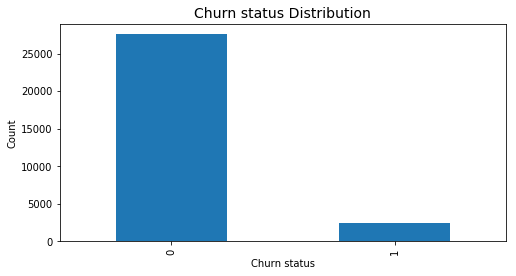

In [69]:
plt.figure(figsize=(8,4))
df_cust['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [70]:
print(df_cust.shape)
df_cust.info(verbose=1)

(30001, 163)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 163 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8   

#### NUMERICAL COLUMNS:

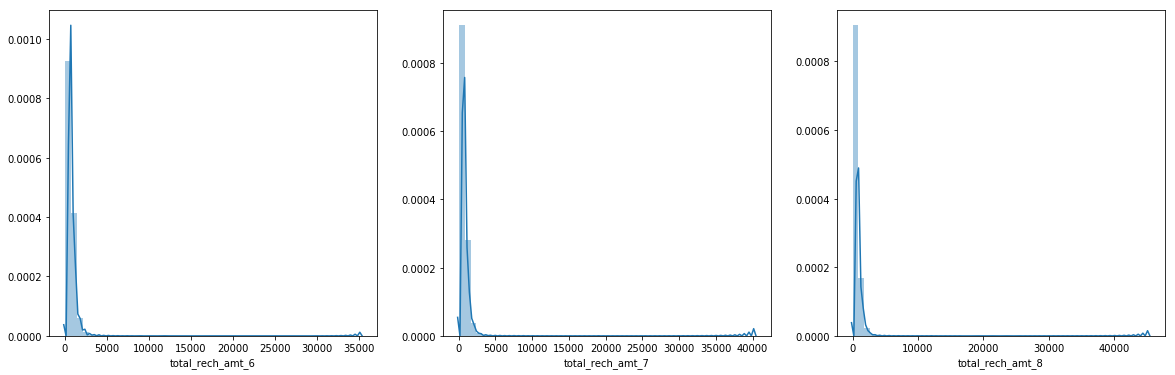

In [71]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(df_cust['total_rech_amt_6'])
plt.subplot(1,3,2)
sns.distplot(df_cust['total_rech_amt_7'])
plt.subplot(1,3,3)
sns.distplot(df_cust['total_rech_amt_8'])
plt.show()

- From the above plots, we can see the data is left skewed. We have to treat it,which will be done below

#### No of days remaining to recharge in a particular month

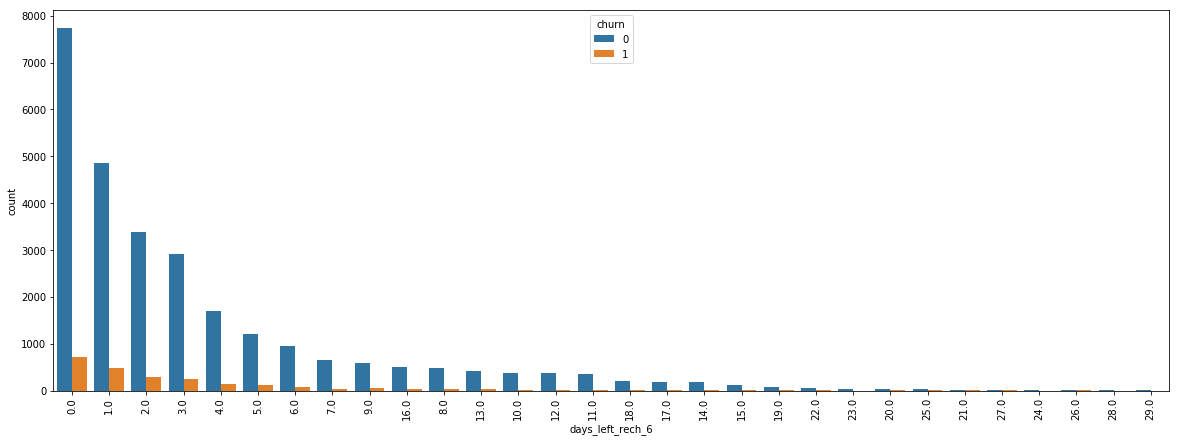

In [72]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(x="days_left_rech_6", hue="churn", data=df_cust,order = df_cust['days_left_rech_6'].value_counts().index)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

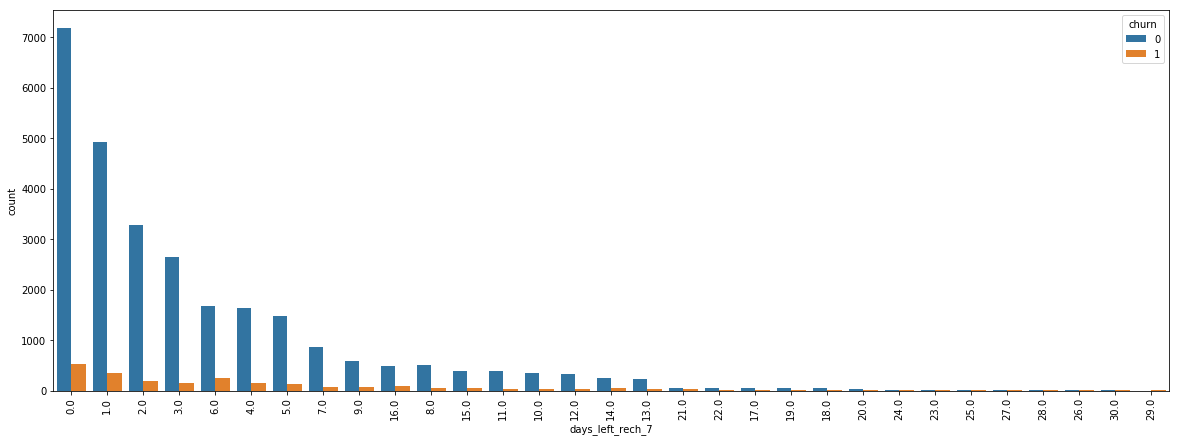

In [73]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(x="days_left_rech_7", hue="churn", data=df_cust,order = df_cust['days_left_rech_7'].value_counts().index)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

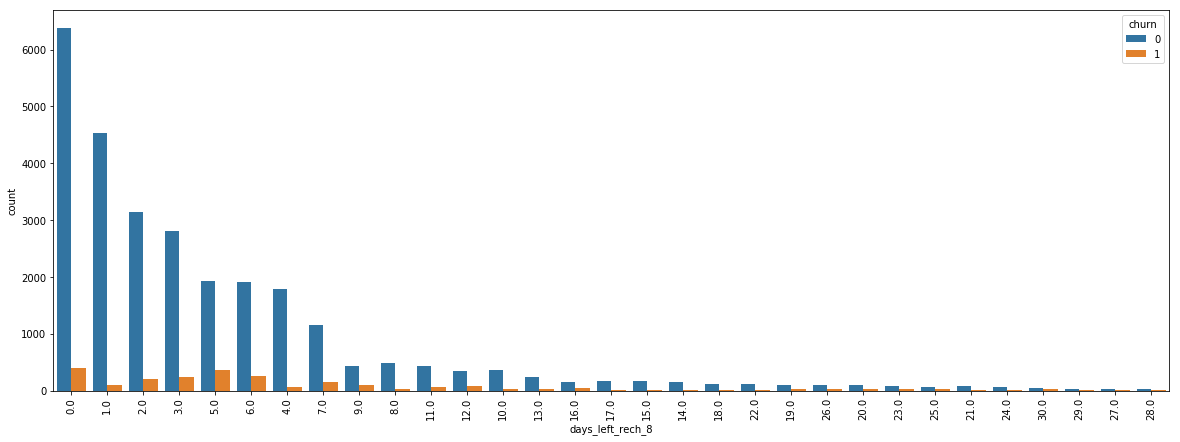

In [74]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(x="days_left_rech_8", hue="churn", data=df_cust,order = df_cust['days_left_rech_8'].value_counts().index)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

 -  customers mostly recharge post 20th of every month and the same custoemrs are likely to churn

In [75]:
def univariate(df,col):  
    sns.boxplot(df[col])
    plt.title("Distribution of "+col)
    plt.show()

In [76]:
#Getting numeric data
numeric_df = df_cust._get_numeric_data()
numeric_df.shape

(30001, 156)

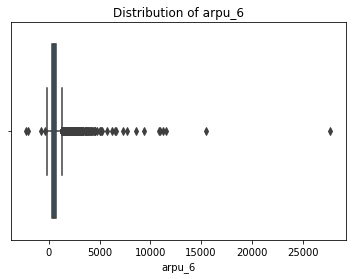

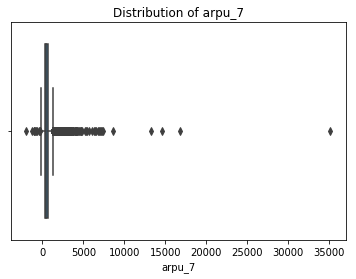

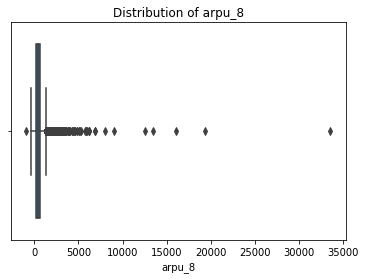

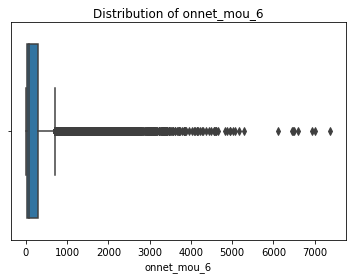

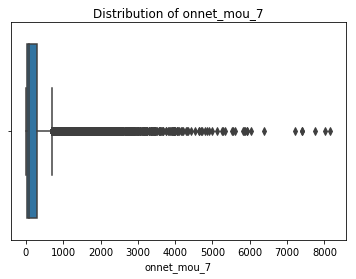

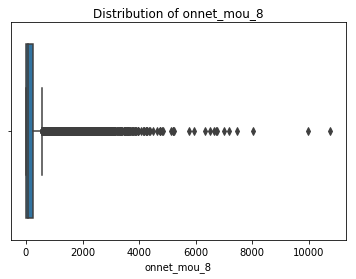

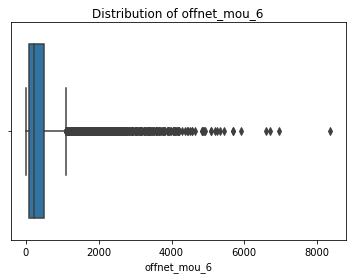

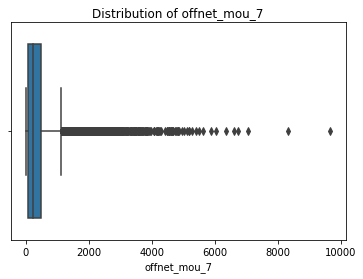

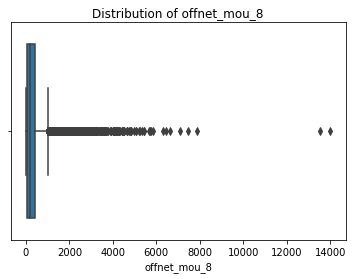

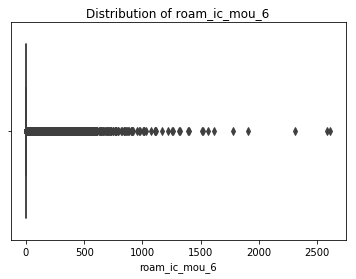

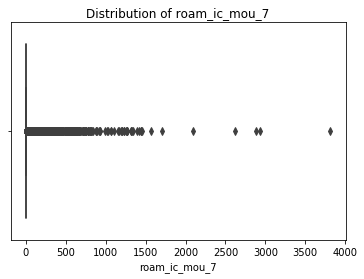

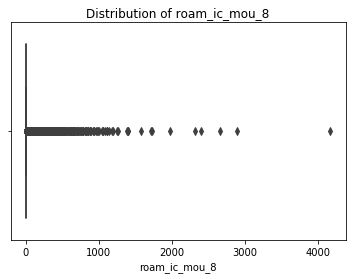

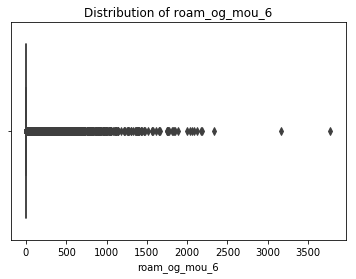

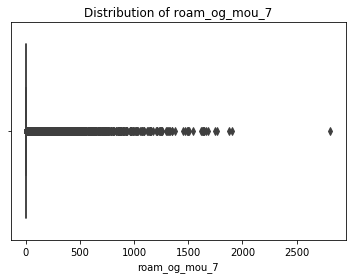

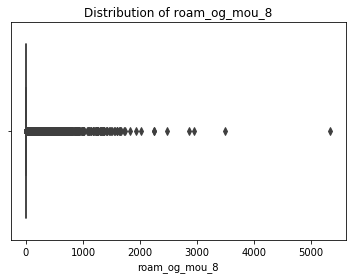

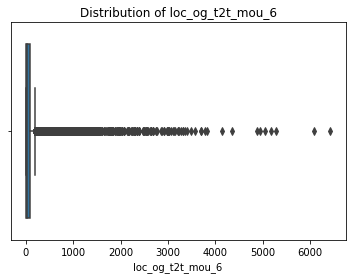

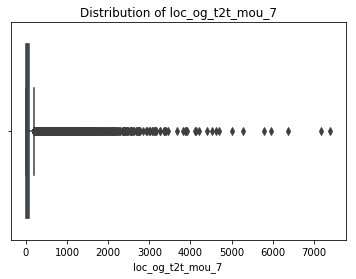

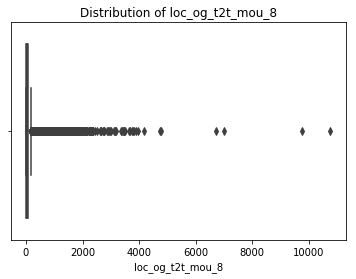

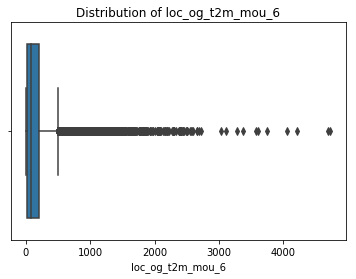

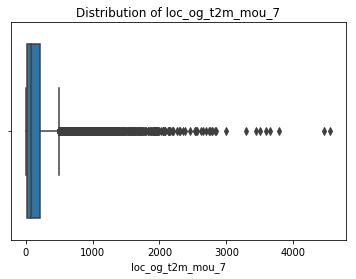

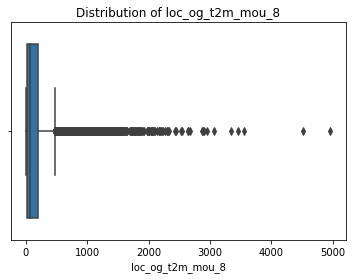

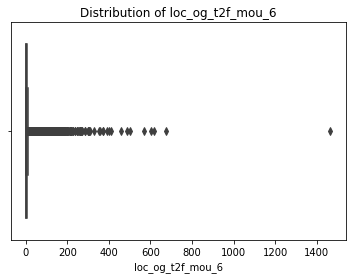

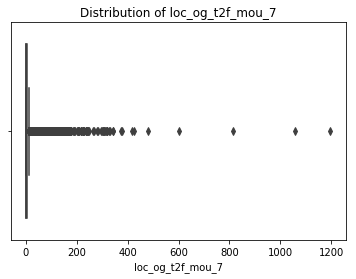

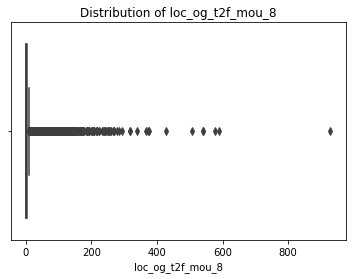

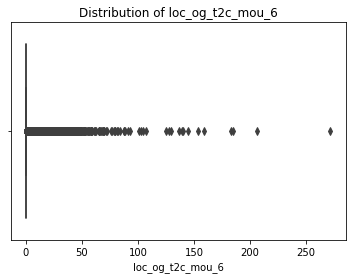

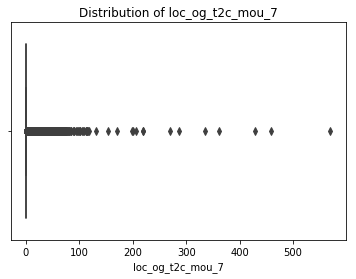

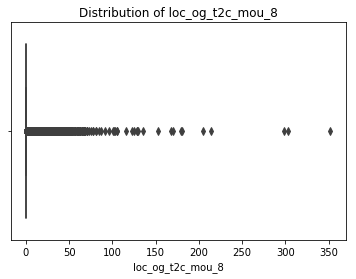

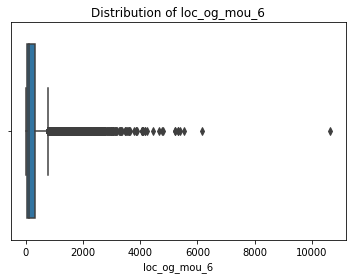

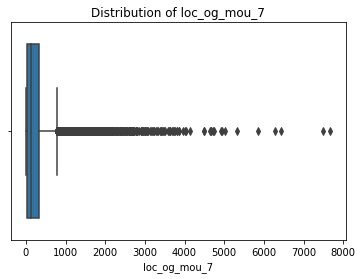

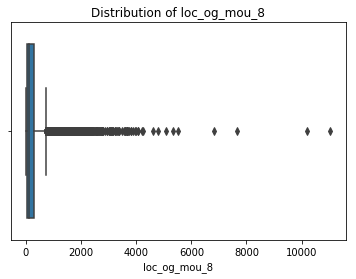

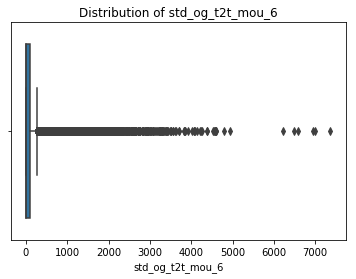

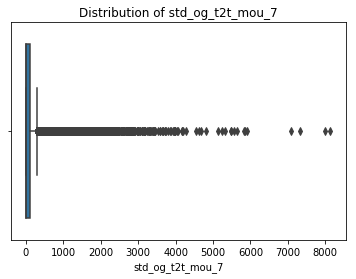

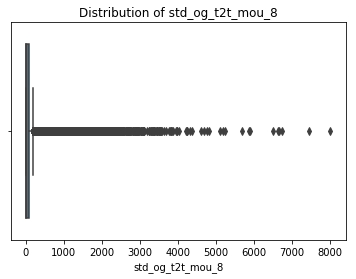

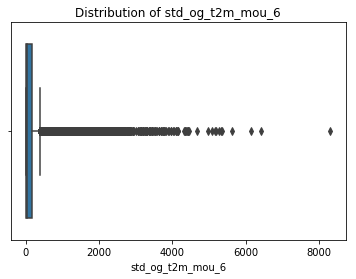

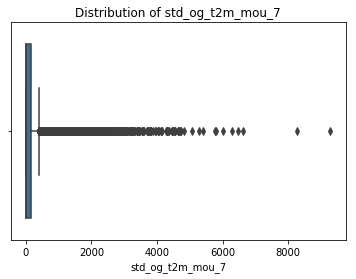

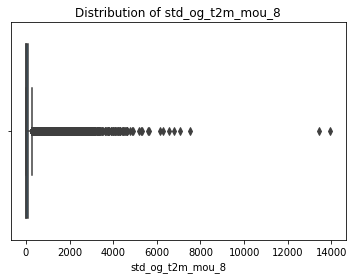

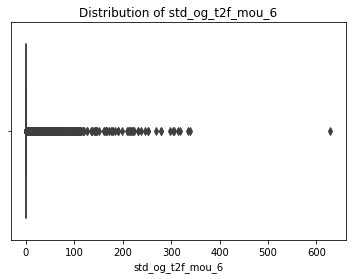

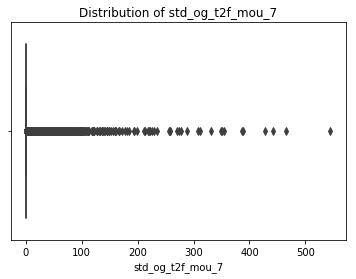

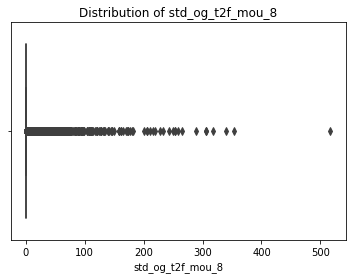

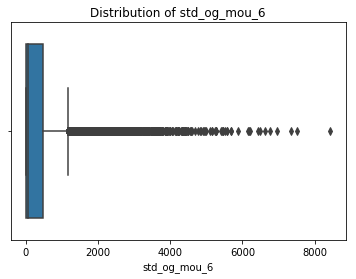

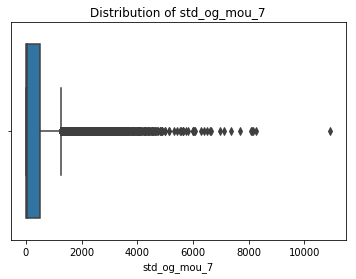

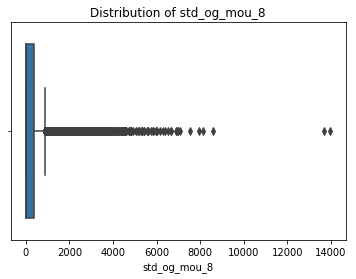

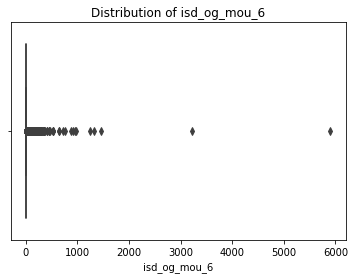

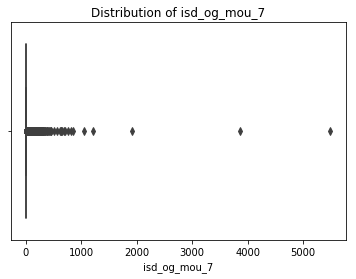

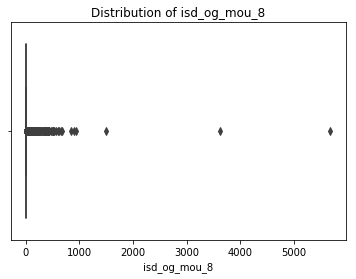

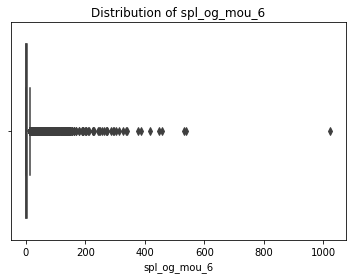

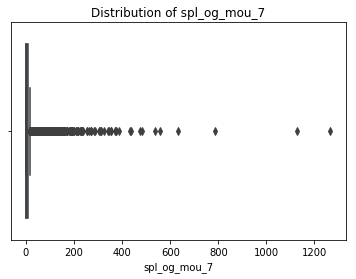

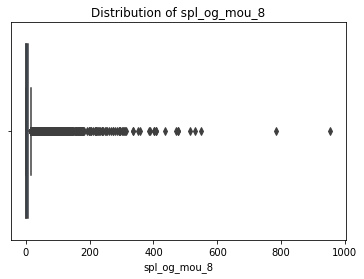

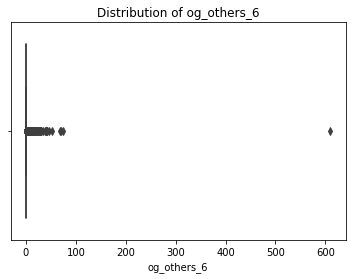

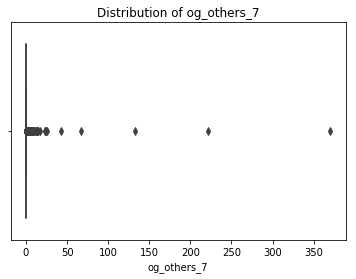

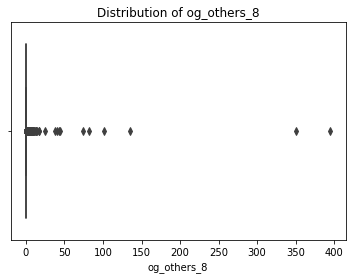

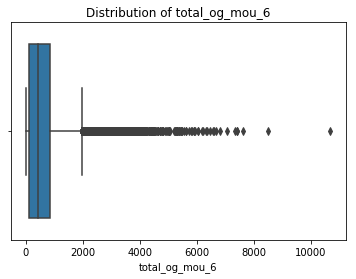

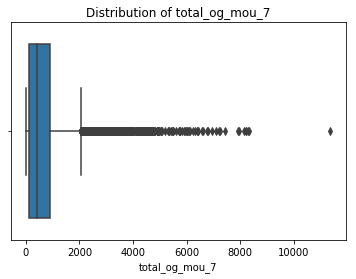

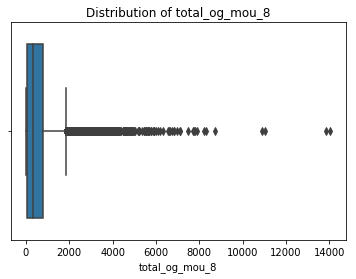

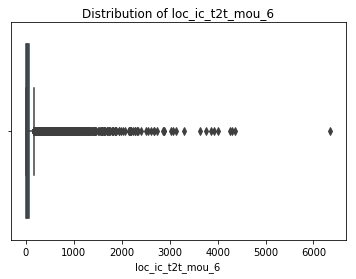

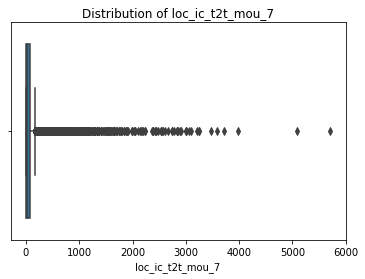

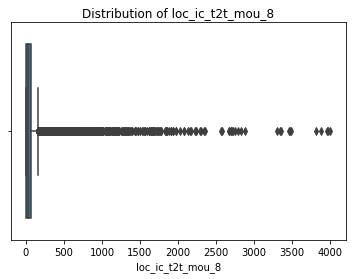

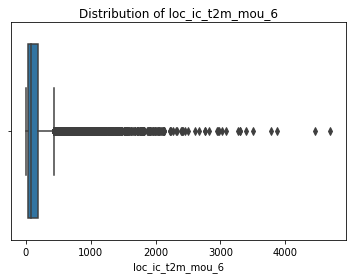

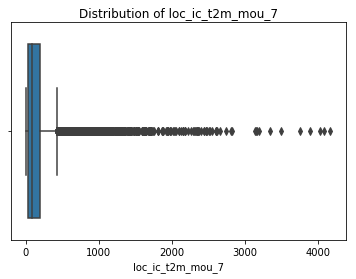

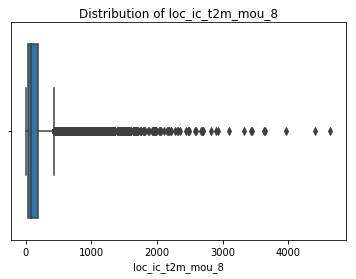

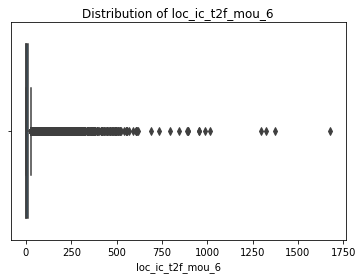

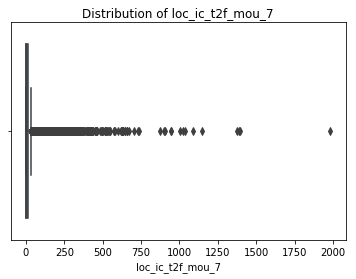

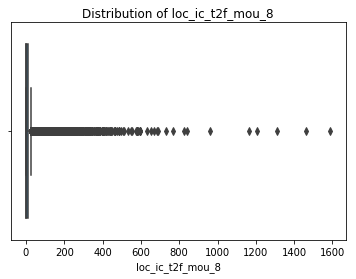

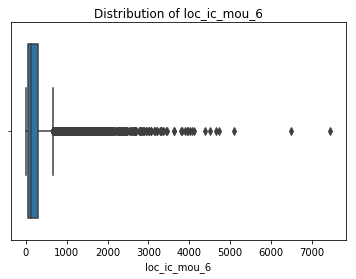

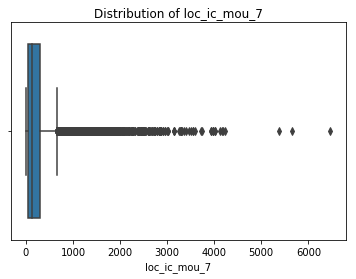

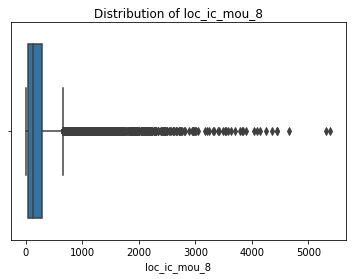

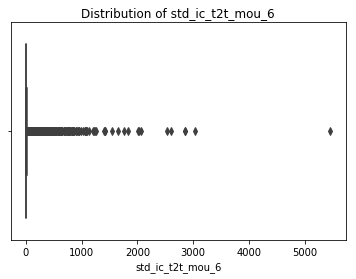

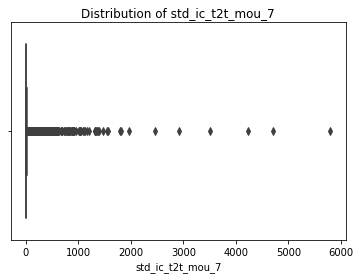

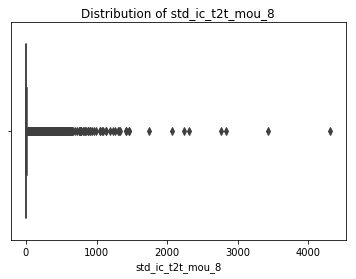

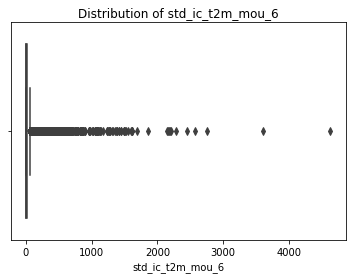

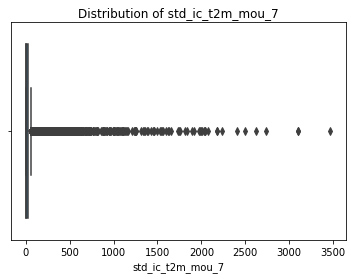

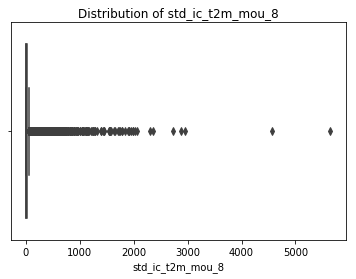

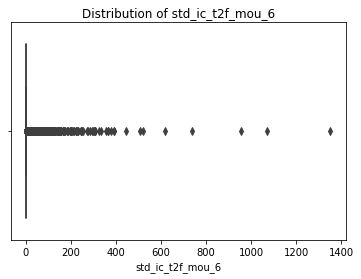

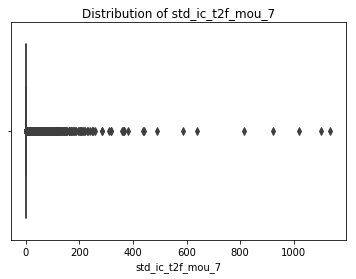

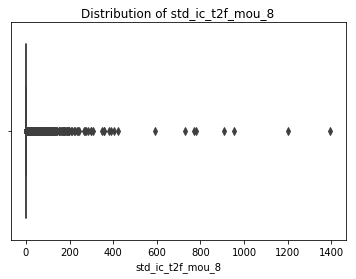

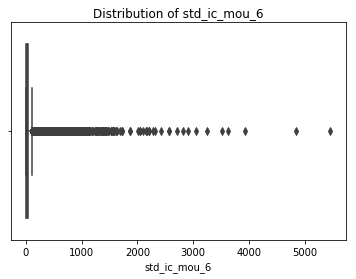

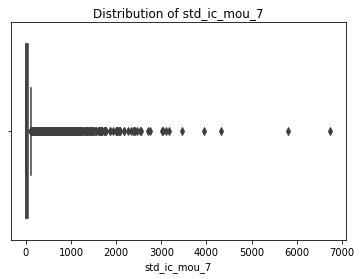

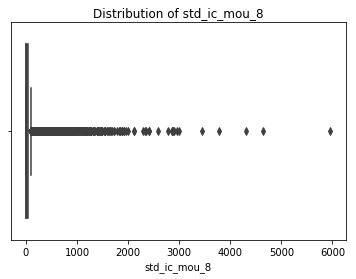

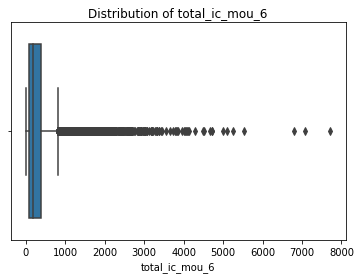

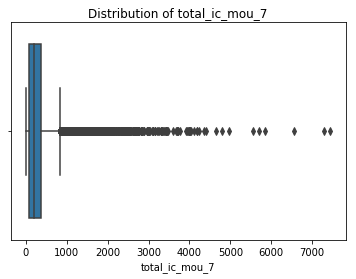

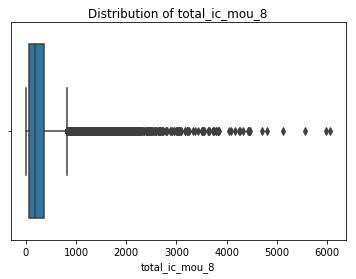

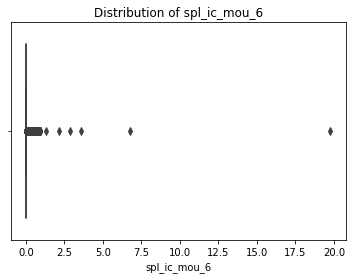

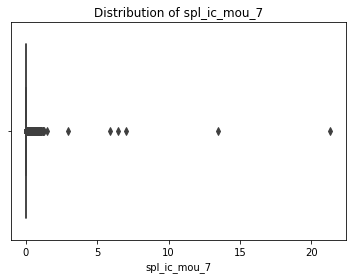

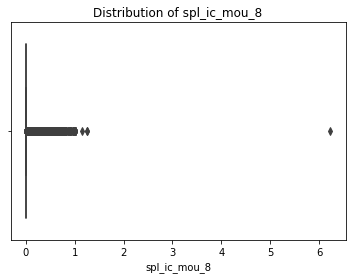

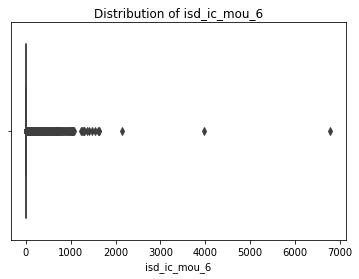

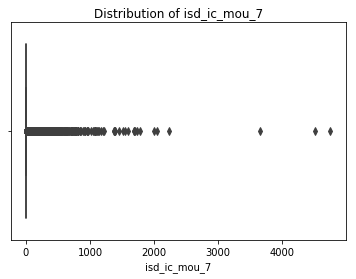

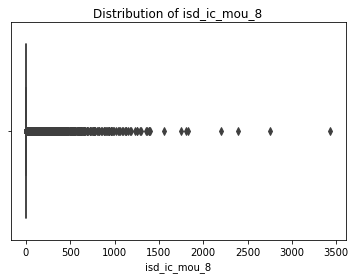

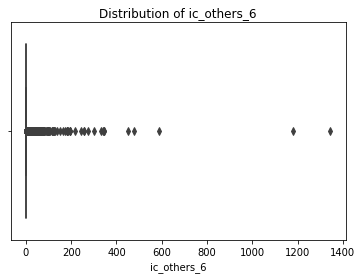

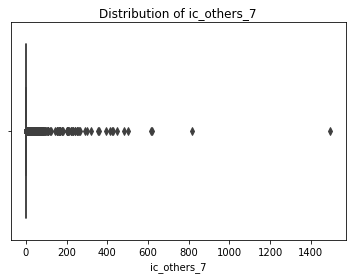

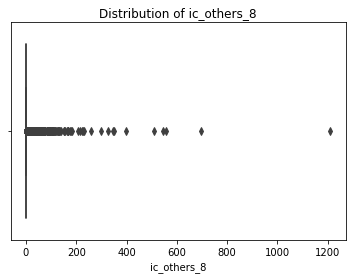

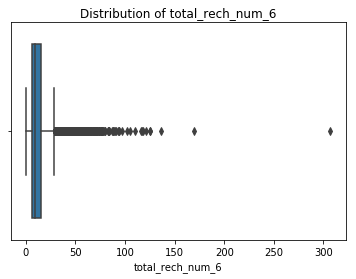

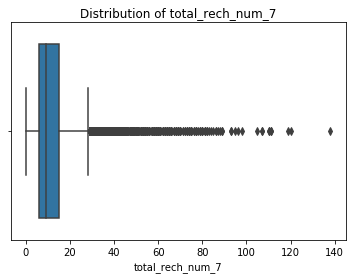

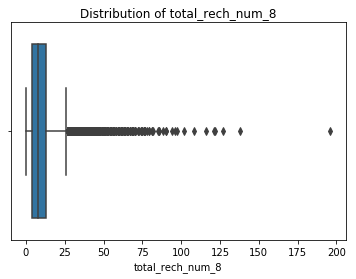

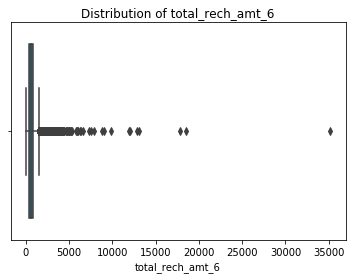

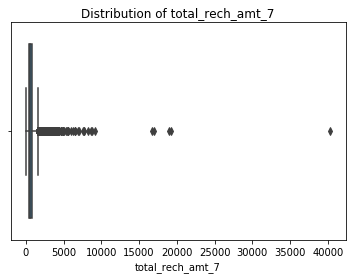

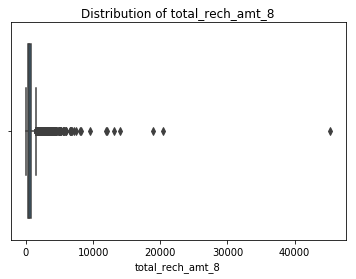

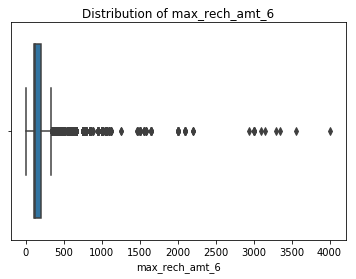

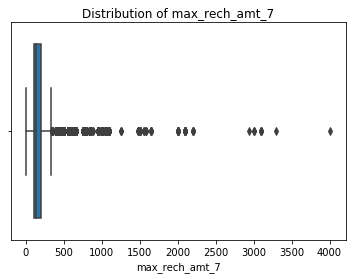

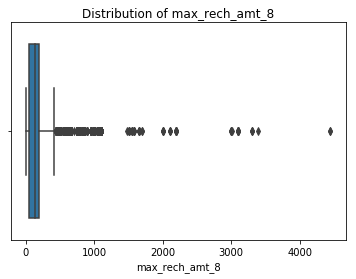

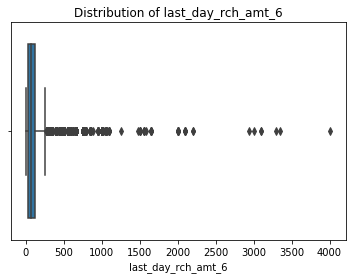

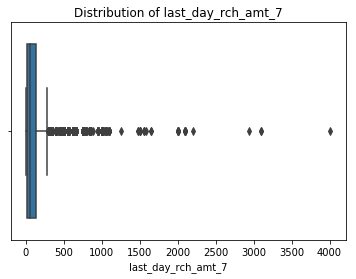

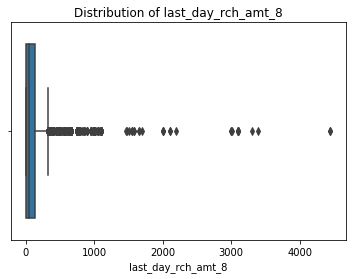

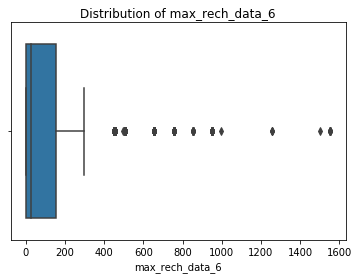

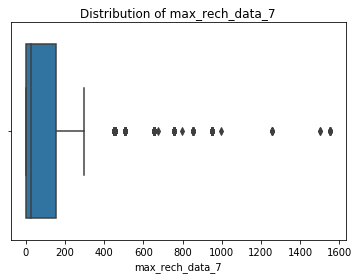

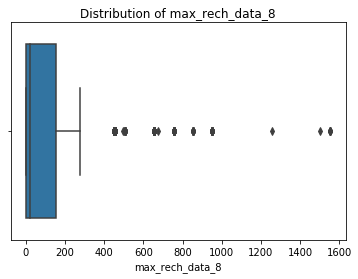

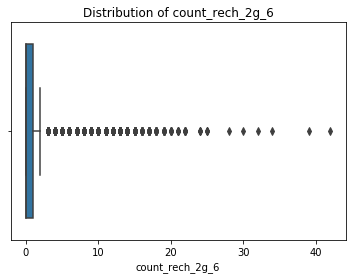

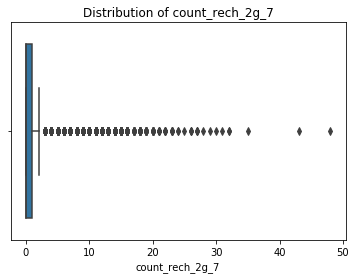

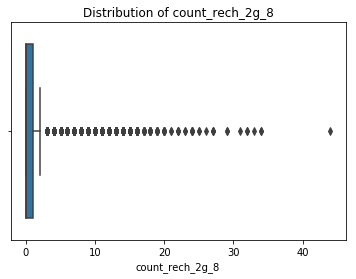

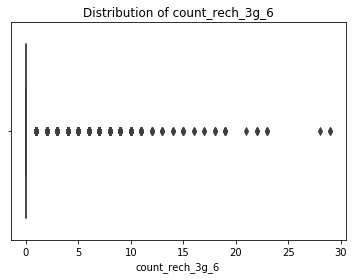

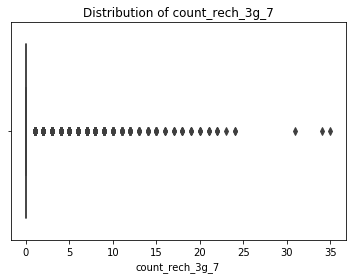

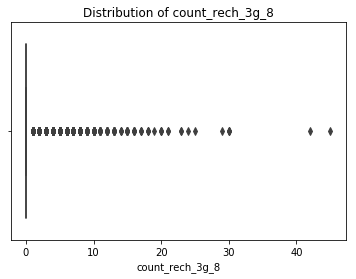

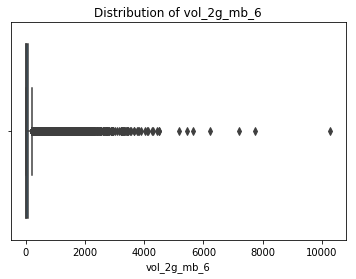

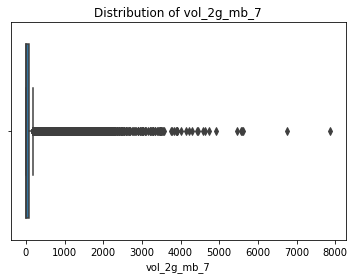

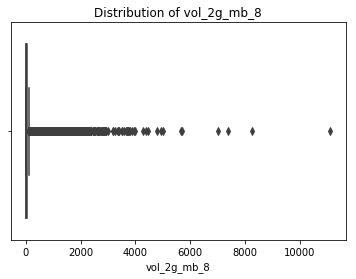

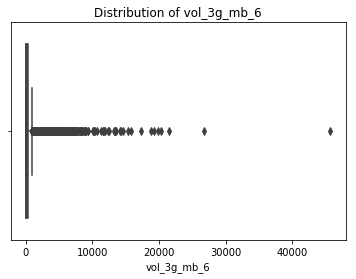

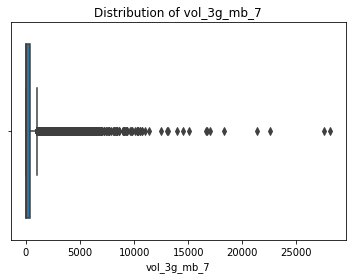

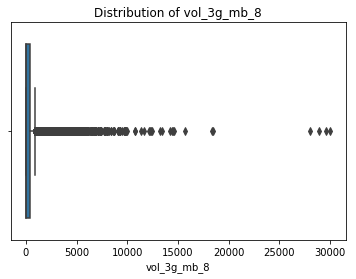

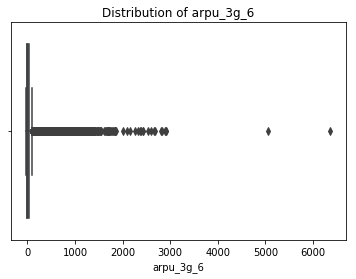

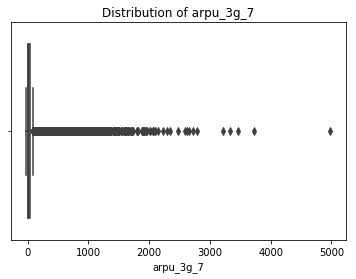

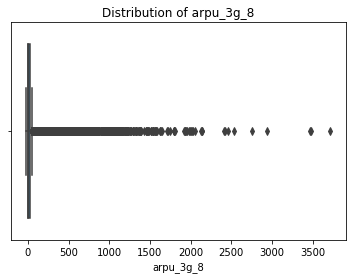

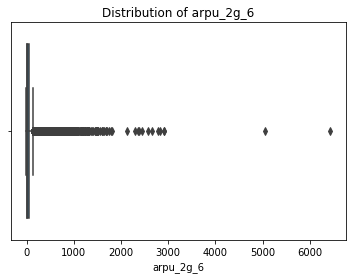

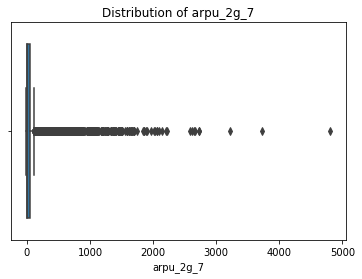

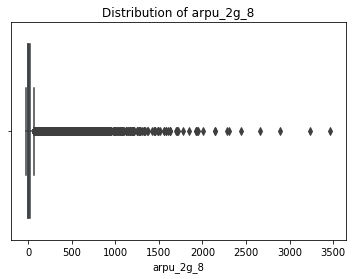

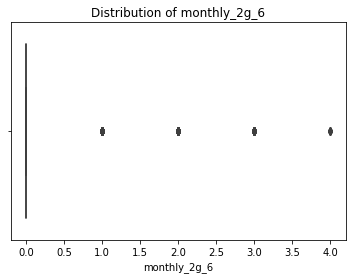

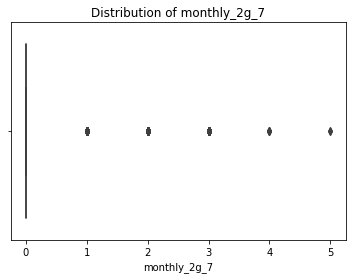

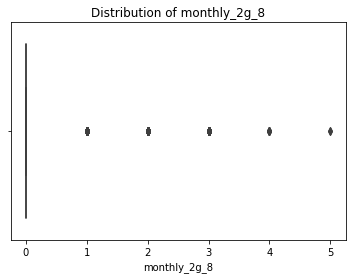

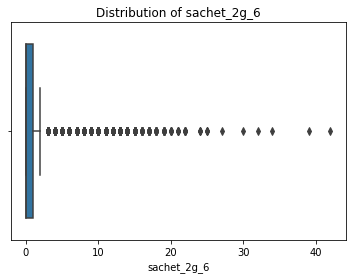

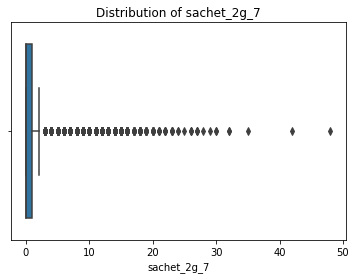

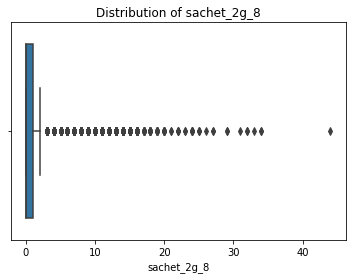

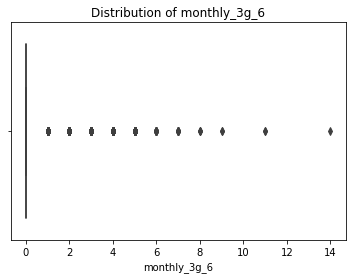

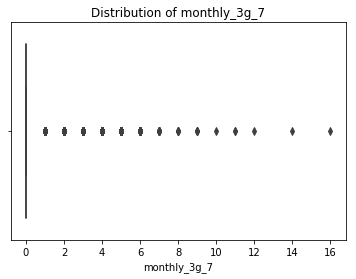

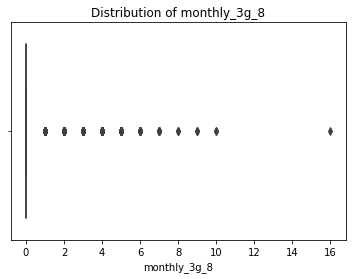

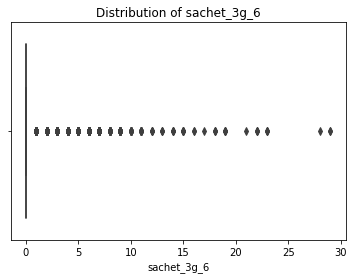

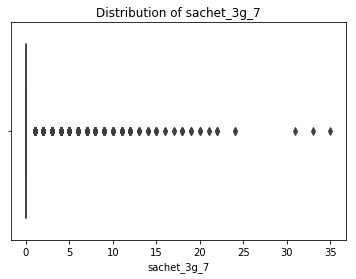

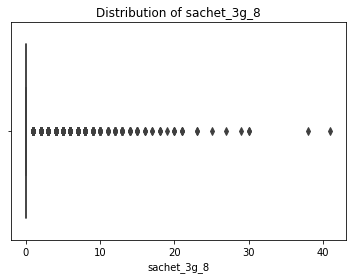

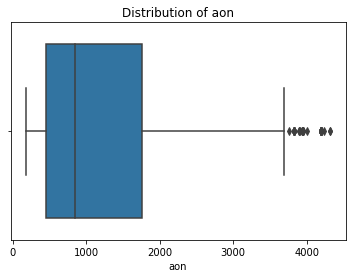

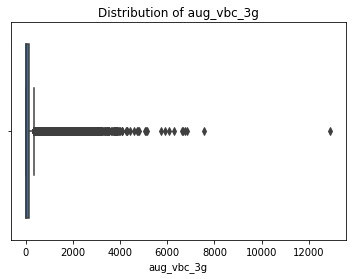

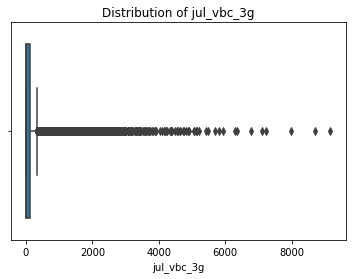

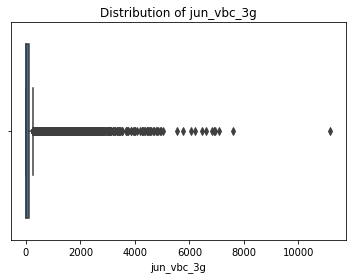

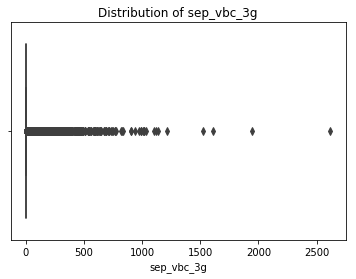

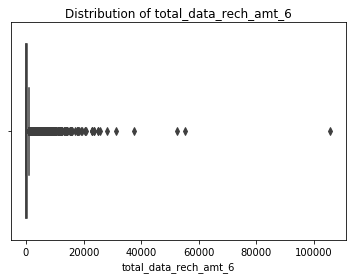

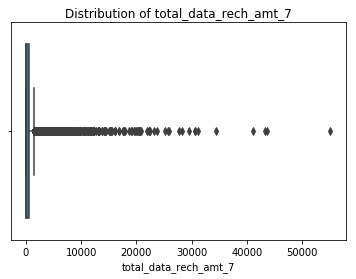

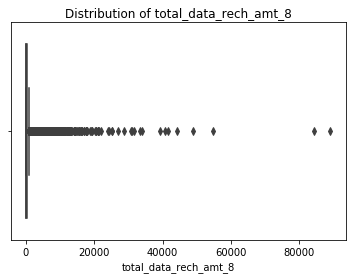

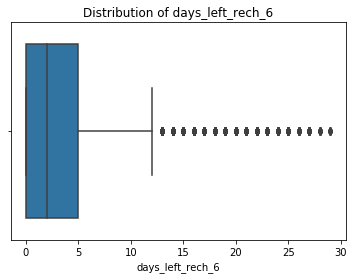

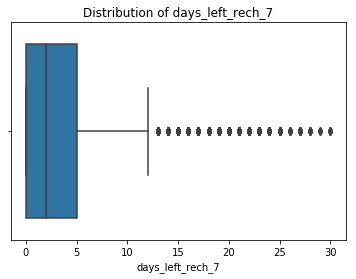

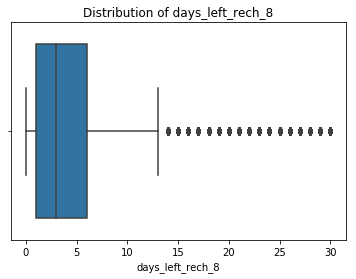

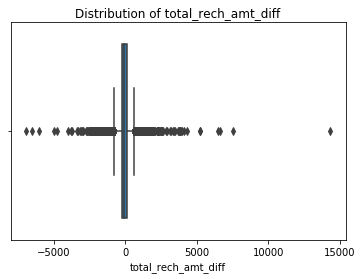

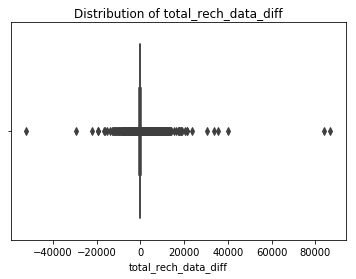

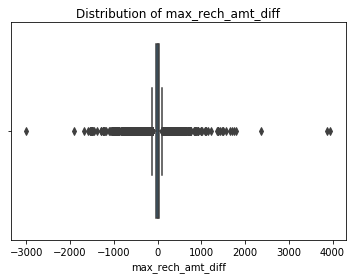

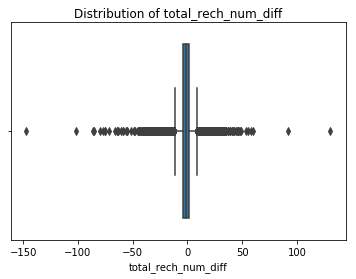

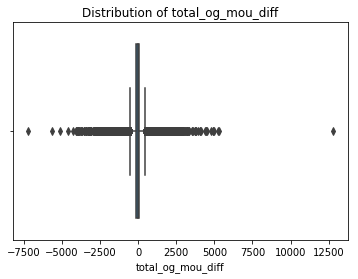

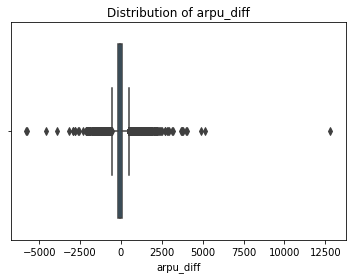

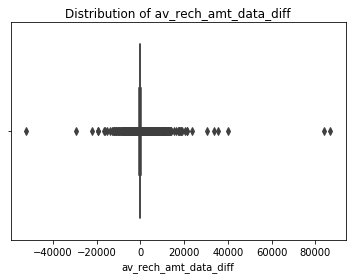

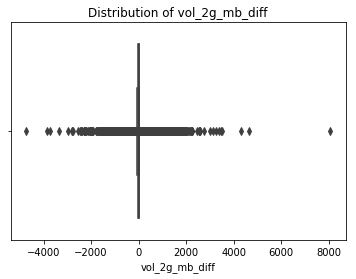

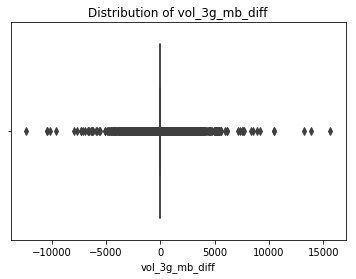

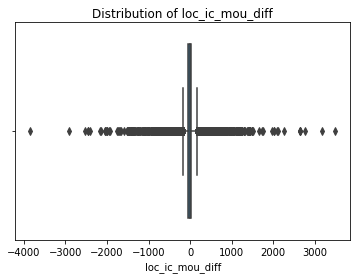

In [77]:
for col in numeric_df:
    univariate(df_cust, col)

- ITS VERY EVIDENT FROM THE ABOVE PLOTS THAT THERE ARE OUTLIERS PRESENT IN THE DATA FOR MORE THAN 90% OF THE COLUMNS. WE NEED TO TREAT THEM
- lets also have a look at the statistics of the numerical columns

In [78]:
df_cust.describe([0.01,0.05, 0.10,.25,.5,.75,.80,0.90,.95,.99]).transpose()

count         mean          std         min        1%         5%      10%       25%       50%       75%       80%       90%       95%       99%         max
arpu_6                 30001.0   558.490824   460.640461  -2258.7090     1.000   112.5100  171.605  309.8650  481.6940   699.943   768.302   994.099  1240.964  1985.115   27731.088
arpu_7                 30001.0   560.782203   479.776947  -2014.0450     0.700   114.2730  177.886  309.8260  480.9430   698.315   770.398   995.859  1261.272  1999.500   35145.834
arpu_8                 30001.0   508.597957   501.961981   -945.8080     0.000     9.5500   84.000  231.4730  427.5850   661.491   735.931   977.345  1255.019  1986.622   33543.624
onnet_mou_6            30001.0   260.793024   459.644368      0.0000     0.000     0.0000    0.700   17.0800   84.5800   290.440   385.330   754.160  1135.440  2151.740    7376.710
onnet_mou_7            30001.0   267.819295   479.993989      0.0000     0.000     0.0000    0.580   16.0300   82.8100   290.240   393.830   784.480  1185.790  2201.960    8157.780
onnet_mou_8            30001.0   234.112539   458.448598      0.0000     0.000     0.0000    0.000   10.3900   65.6100   239.960   323.310   665.080  1074.590  2159.110   10752.560
offnet_mou_6           30001.0   373.693961   482.523558      0.0000     0.000     0.2100   11.260   71.6100  222.5400   487.940   578.580   895.830  1256.610  2326.360    8362.360
offnet_mou_7           30001.0   378.103169   498.923555      0.0000     0.000     0.0500   10.430   69.9100  220.0300   494.010   589.960   916.080  1272.290  2410.890    9667.130
offnet_mou_8           30001.0   335.077044   482.062509      0.0000     0.000     0.0000    2.200   46.7400  182.7900   438.890   526.430   823.680  1167.540  2193.130   14007.340
roam_ic_mou_6          30001.0    16.110355    76.302156      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     0.900    27.390    84.540   342.440    2613.310
roam_ic_mou_7          30001.0    12.642504    75.785903      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     0.000    14.290    55.640   280.460    3813.290
roam_ic_mou_8          30001.0    12.500551    74.125281      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     0.000    15.010    56.350   282.190    4169.810
roam_og_mou_6          30001.0    26.571547   116.205525      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     1.360    50.430   145.410   530.710    3775.110
roam_og_mou_7          30001.0    20.152086    96.100428      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     0.000    31.090   104.240   438.590    2812.040
roam_og_mou_8          30001.0    19.865615   104.719009      0.0000     0.000     0.0000    0.000    0.0000    0.0000     0.000     0.000    28.880   100.510   427.030    5337.040
loc_og_t2t_mou_6       30001.0    84.484753   228.794004      0.0000     0.000     0.0000    0.000    4.3800   24.3300    77.980   100.860   187.930   322.740  1006.360    6431.330
loc_og_t2t_mou_7       30001.0    85.674287   240.525999      0.0000     0.000     0.0000    0.000    4.6100   24.6800    78.340   100.340   190.840   324.390  1018.530    7400.660
loc_og_t2t_mou_8       30001.0    78.077112   227.373609      0.0000     0.000     0.0000    0.000    2.5300   20.7300    72.040    94.640   178.840   298.780   913.330   10752.560
loc_og_t2m_mou_6       30001.0   163.243297   250.116700      0.0000     0.000     0.0000    1.000   19.2100   77.1800   208.930   256.610   419.480   604.380  1136.960    4729.740
loc_og_t2m_mou_7       30001.0   163.009963   241.576705      0.0000     0.000     0.0000    1.200   20.4600   78.8800   208.410   257.980   421.880   600.460  1111.480    4557.140
loc_og_t2m_mou_8       30001.0   151.756812   233.660905      0.0000     0.000     0.0000    0.000   13.0900   67.7600   196.960   242.590   398.510   574.760  1088.310    4961.330
loc_og_t2f_mou_6       30001.0     6.344115

##### Inferences:
- the data is not uniforly distributed. 
- Mean and median are away in most columns
- MAximum and 99th percentile values are too far, indicating outliers
- The statistics also clearly indicates the outlier, which needs to be treated

##### TREATING THE NUMERICAL COLUMNS FOR 0UTLIERS.
   - As removing outlliers will cause data loss, we are imputing the outliers with floor and cap values
   - Taking 99% and 1% percentile as cap and floor for each column

In [79]:
for col in numeric_df:
    percentiles = df_cust[col].quantile([0.10,0.99]).values
    df_cust[col][df_cust[col] <= percentiles[0]] = percentiles[0]
    df_cust[col][df_cust[col] >= percentiles[1]] = percentiles[1]

In [80]:
#Lets look at the statistics again
df_cust.describe([0.01, 0.10,.25,.5,.75,.80,.95,.99]).transpose()

count         mean         std      min       1%      10%       25%       50%       75%       80%       95%       99%       max
arpu_6                 30001.0   556.225463  348.945588  171.605  171.605  171.605  309.8650  481.6940   699.943   768.302  1240.964  1985.115  1985.115
arpu_7                 30001.0   558.749453  351.049719  177.886  177.886  177.886  309.8260  480.9430   698.315   770.398  1261.272  1999.500  1999.500
arpu_8                 30001.0   504.263241  376.102189   84.000   84.000   84.000  231.4730  427.5850   661.491   735.931  1255.019  1986.622  1986.622
onnet_mou_6            30001.0   252.231082  403.469623    0.700    0.700    0.700   17.0800   84.5800   290.440   385.330  1135.440  2151.740  2151.740
onnet_mou_7            30001.0   258.677961  418.133485    0.580    0.580    0.580   16.0300   82.8100   290.240   393.830  1185.790  2201.960  2201.960
onnet_mou_8            30001.0   224.895572  390.856953    0.000    0.000    0.000   10.3900   65.6100   239.960   323.310  1074.590  2159.110  2159.110
offnet_mou_6           30001.0   366.769370  433.473437   11.260   11.260   11.260   71.6100  222.5400   487.940   578.580  1256.610  2326.360  2326.360
offnet_mou_7           30001.0   370.334088  443.248220   10.430   10.430   10.430   69.9100  220.0300   494.010   589.960  1272.290  2410.890  2410.890
offnet_mou_8           30001.0   325.238986  409.595915    2.200    2.200    2.200   46.7400  182.7900   438.890   526.430  1167.540  2193.130  2193.130
roam_ic_mou_6          30001.0    13.572928   49.336952    0.000    0.000    0.000    0.0000    0.0000     0.000     0.900    84.540   342.440   342.440
roam_ic_mou_7          30001.0     9.636307   38.699269    0.000    0.000    0.000    0.0000    0.0000     0.000     0.000    55.640   280.460   280.460
roam_ic_mou_8          30001.0     9.763929   38.946961    0.000    0.000    0.000    0.0000    0.0000     0.000     0.000    56.350   282.190   282.190
roam_og_mou_6          30001.0    22.732495   79.312550    0.000    0.000    0.000    0.0000    0.0000     0.000     1.360   145.410   530.710   530.710
roam_og_mou_7          30001.0    16.688892   62.862903    0.000    0.000    0.000    0.0000    0.0000     0.000     0.000   104.240   438.590   438.590
roam_og_mou_8          30001.0    15.985223   60.492319    0.000    0.000    0.000    0.0000    0.0000     0.000     0.000   100.510   427.030   427.030
loc_og_t2t_mou_6       30001.0    76.276691  149.890333    0.000    0.000    0.000    4.3800   24.3300    77.980   100.860   322.740  1006.360  1006.360
loc_og_t2t_mou_7       30001.0    76.684236  150.825195    0.000    0.000    0.000    4.6100   24.6800    78.340   100.340   324.390  1018.530  1018.530
loc_og_t2t_mou_8       30001.0    69.731313  136.796483    0.000    0.000    0.000    2.5300   20.7300    72.040    94.640   298.780   913.330   913.330
loc_og_t2m_mou_6       30001.0   157.758031  212.494631    1.000    1.000    1.000   19.2100   77.1800   208.930   256.610   604.380  1136.960  1136.960
loc_og_t2m_mou_7       30001.0   158.312626  209.514721    1.200    1.200    1.200   20.4600   78.8800   208.410   257.980   600.460  1111.480  1111.480
loc_og_t2m_mou_8       30001.0   147.305392  204.027495    0.000    0.000    0.000   13.0900   67.7600   196.960   242.590   574.760  1088.310  1088.310
loc_og_t2f_mou_6       30001.0     5.643210   13.745878    0.000    0.000    0.000    0.0000    0.0000     4.230     6.510    30.430    87.640    87.640
loc_og_t2f_mou_7       30001.0     5.731630   13.824771    0.000    0.000    0.000    0.0000    0.1000     4.380     6.690    31.130    87.340    87.340
loc_og_t2f_mou_8       30001.0     5.285765   12.978820    0.000    0.000    0.000    0.0000    0.0000     3.930     5.990    28.390    82.240    82.240
loc_og_t2c_mou_6       30001.0     1.362552    3.999325    0.000    0.000    0.000    0.0000    0.0000     0.000     0.660     8.880    24.940    24.940
loc_og_t2c_mou_7       30001.0     1.575163    

- Since outliers are not treated fully, lets try to take log for the features

In [81]:
for col in numeric_df:
    #percentiles = df_cust[col].quantile([0.01,0.99]).values
    df_cust[col][df_cust[col] < 0] = np.log(df_cust[col])
    df_cust[col][df_cust[col] > 0] = np.log(df_cust[col])

#Lets look at the statistics again
df_cust.describe([0.01, 0.10,.25,.5,.75,.80,.95,.99]).transpose()

 - outliers are treated

In [82]:
df_cust.isnull().sum()

arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_6             0
loc_og_t2m_mou_7             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_6             0
loc_og_t2f_mou_7             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_6             0
loc_og_t2c_mou_7             0
loc_og_t2c_mou_8             0
loc_og_mou_6                 0
loc_og_mou_7                 0
loc_og_mou_8                 0
std_og_t2t_mou_6             0
std_og_t2t_mou_7             0
std_og_t

In [83]:
df_cust.fillna(0,inplace=True)

#### BIVARIATE:

In [84]:
# Lets check for correlation between the variables
df_cust_cor = df_cust.corr()

In [85]:
#plt.figure(figsize=(16,16))
#sns.heatmap(df_cust_cor,annot=True)

In [86]:
#lets take a look the highlu correlated features

# Upper triangle of correlation matrix
upper_cor = df_cust_cor.where(np.triu(np.ones(df_cust_cor.shape), k=1).astype(np.bool))

# Index of columns with correlation greater than 0.75
high_corr_col = [col for col in upper_cor.columns if any(upper_cor[col] > 0.75)]
len(high_corr_col)

57

In [87]:
high_corr_col

['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total

 ##### INFERENCES:
 - there are 60 highly correlated features
 - We can choose to drop the highly correlated columns manually or we can treat them using feature reduction techniques
 - We are gointo use feature reduction techniques to treat multicollinearity

In [88]:
df_cust.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

#### MINUTES OF USAGE - CALLS WITHIN SAME OPERATOR NETWORK

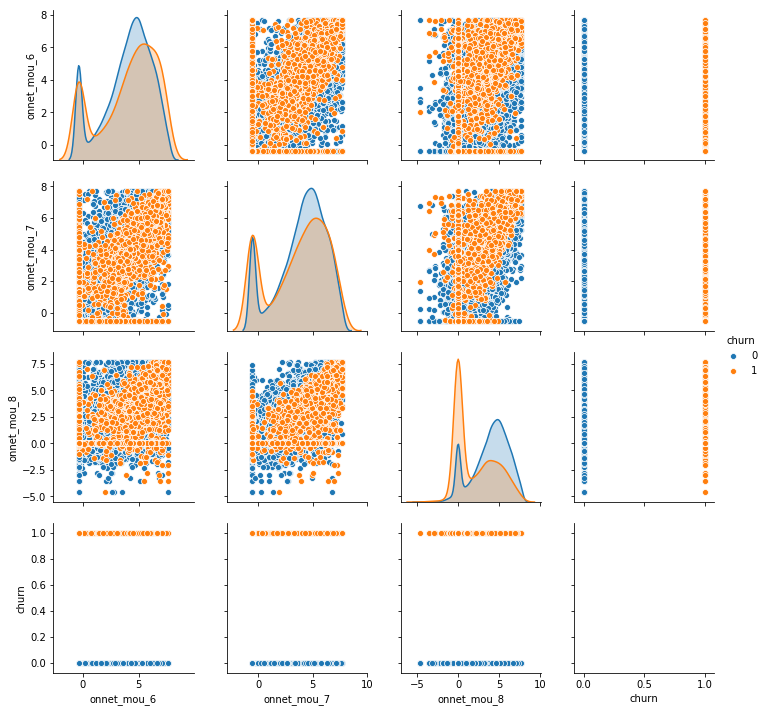

In [89]:
sns.pairplot(data=df_cust[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

 - Customers are likely to churn if the voice call usage in the same operator network in minutes is less in the action phase,i.e in 8th month

#### MINUTES OF USAGE - CALLS OUTSIDE OPERATOR NETWORK

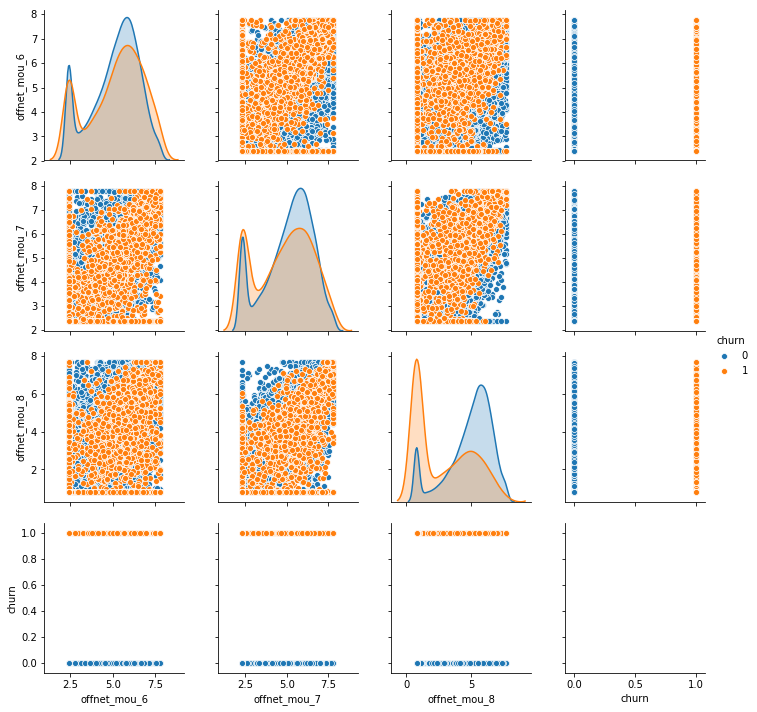

In [90]:
sns.pairplot(data=df_cust[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

 - Customers are likely to churn if the voice call usage outside operator network in minutes is less in the action phase,i.e in 8th month

#### Total outgoing min of usage.

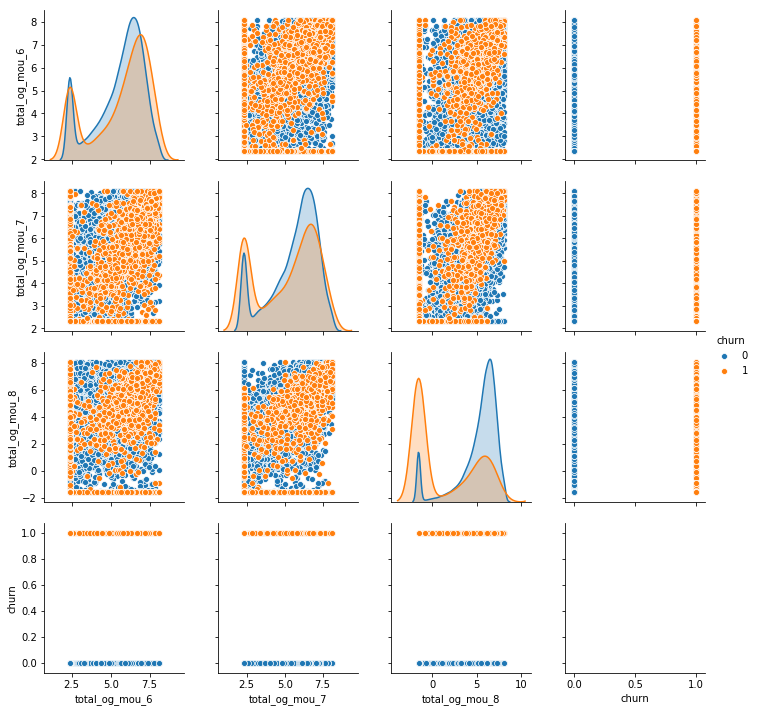

In [91]:
sns.pairplot(data=df_cust[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

From the plot we can observe most of the churn cases are those who have less outgoing calls in month 6 and month 7 ie below 5000

#### Incoming local calls

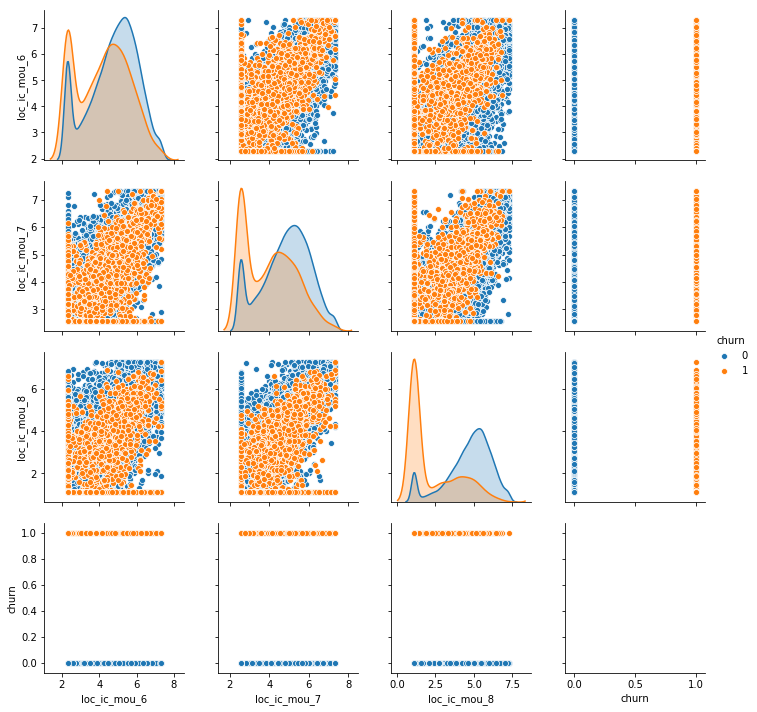

In [92]:
sns.pairplot(data=df_cust[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

In the case of incoming calls those who recieve less incoming call min have chruned more comapred with others

### Total Incoming Calls

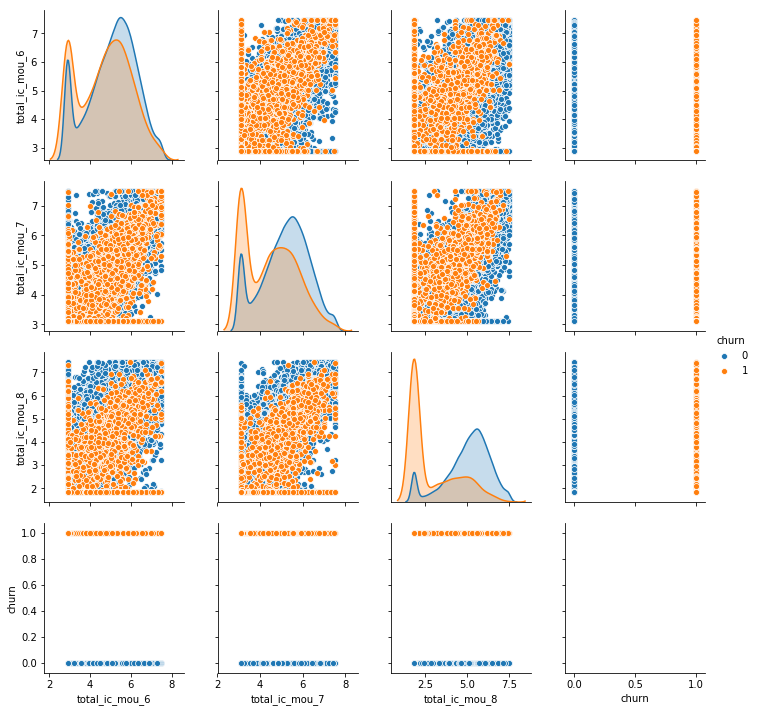

In [93]:
sns.pairplot(data=df_cust[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

Here also the pattern is same those who had less incoming calls less than 2000 have chruned 

### Total number of times recharge happened

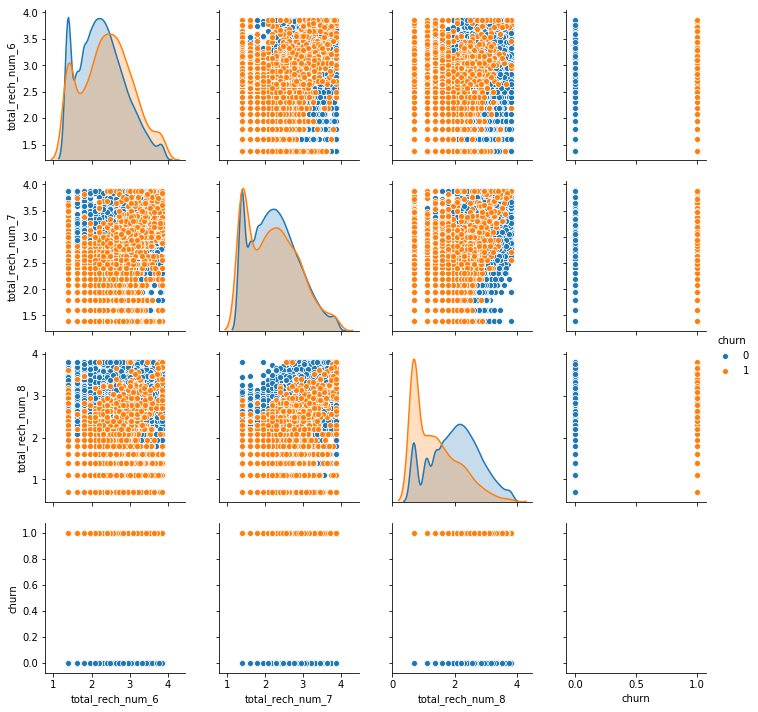

In [94]:
sns.pairplot(data=df_cust[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

Most of the customers who recharges less during the first two months has churned. There are few outliers too. 

#### Total data recharge  number

In [95]:
df_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0   5.285156  5.369782  5.365055    -0.356675    -0.544727     0.000000      2.421257      2.344686      0.788457       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          0.000000          0.000000          0.000000          0.000000          0.182322          0.000000          0.000000          0.000000          0.000000               0.0               0.0          0.000000      0.867100      0.970779      0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000           0.00000      0.000000      0.000000      0.000000           0.0      0.000000      0.000000      0.000000           0.0      0.000000          0.0          0.0          0.0        2.375836        2.310553       -1.560648         -1.272966         -0.776529         -1.832581          1.640937          1.900614          1.418277          0.000000          0.000000   
7   6.974647  7.207749  7.594191     4.057681     4.001498     3.956805      6.116841      6.340641      5.786621       2.786861       3.511247       3.454422       3.167161       2.532903       3.639164          3.939444          3.446171          3.695855          5.732143          6.103408          5.089323          4.129229          4.009875          3.974622               0.0               0.0          0.000000      6.045384      6.280227      5.544357          1.458615          3.148024          2.485740          3.909821          3.458208          3.894673          1.896119          2.999724           2.81421      4.108576      4.319353      4.354655           0.0     -1.714798      2.303585      1.504077           0.0      1.871802          0.0          0.0          0.0        6.189352        6.412212        5.858390          4.062854          3.473828          3.307253          5.382475          5.400377          4.797360          5.024933          4.619665   
8   5.936800  6.198932  4.922620     6.025117     5.860872     3.557631      4.550292      4.389871      4.916178       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          5.694170          5.382613          2.524928          4.393955          4.256747          3.922765          0.000000          0.000000          0.000000               0.0               0.0          1.967112      5.935132      5.663585      4.143769          4.758406          4.893577          3.117065          2.616666          2.306577          4.326646          0.000000          0.000000           0.00000      4.869532      4.966196      4.587821           0.0      0.000000      0.000000      0.000000           0.0      2.325325          0.0          0.0          0.0        6.231190        6.067638        5.144933          3.171365          2.286456         -1.171183          4.053175          2.637628          2.739549          0.000000          0.000000   
21  6.243104  6.393178  6.457962     4.628984     4.883635     4.44429

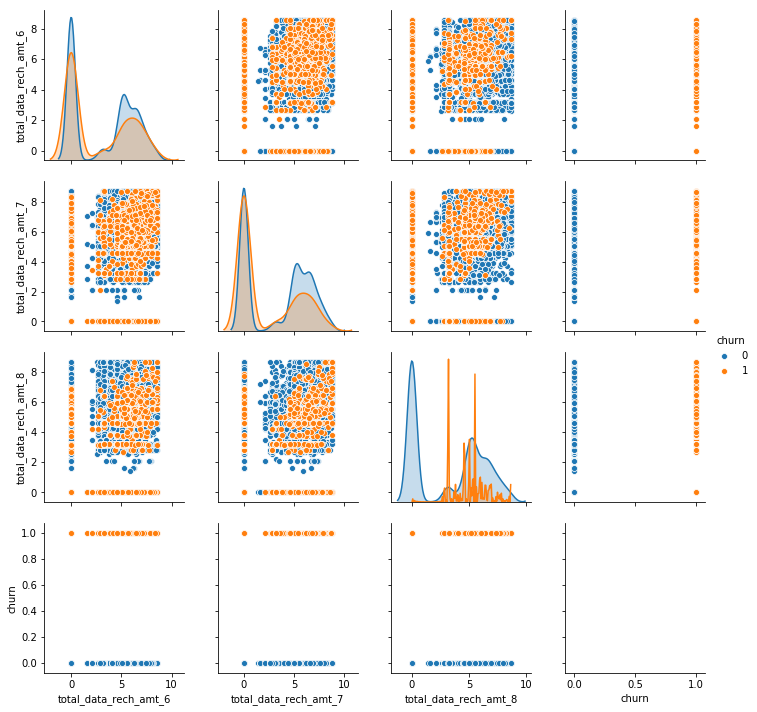

In [96]:

sns.pairplot(data=df_cust[['total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8','churn']],hue='churn')

### Maximum recharge amount:

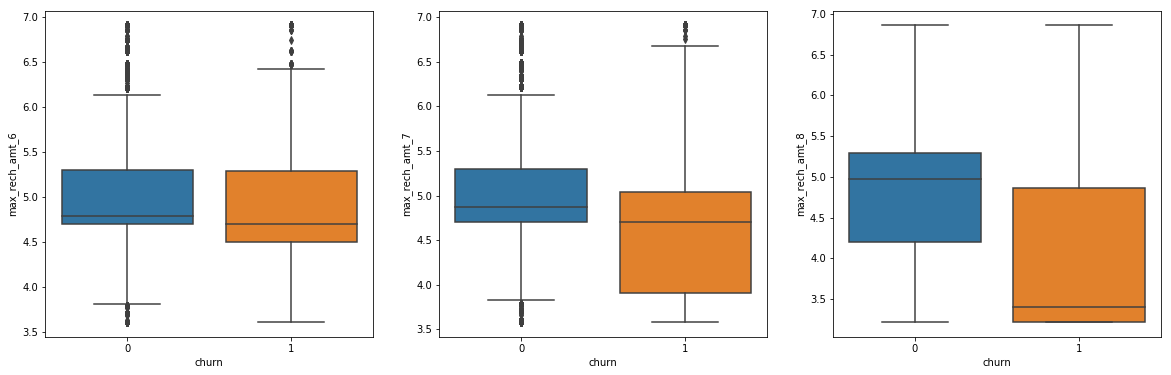

In [97]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x='churn',y='max_rech_amt_6',data=df_cust)
plt.subplot(1,3,2)
sns.boxplot(x='churn',y='max_rech_amt_7',data=df_cust)
plt.subplot(1,3,3)
sns.boxplot(x='churn',y='max_rech_amt_8',data=df_cust)

- MAximum recharge amount does not have any influence in 6th month. But in 7th and 8th month, if the recharge amount is less, customers are more likely to churn

#### Average revenue per customer:

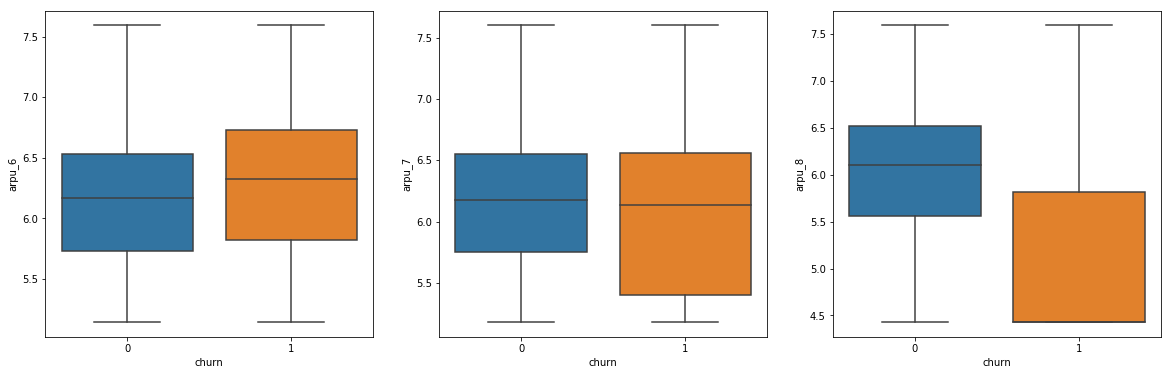

In [98]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x='churn',y='arpu_6',data=df_cust)
plt.subplot(1,3,2)
sns.boxplot(x='churn',y='arpu_7',data=df_cust)
plt.subplot(1,3,3)
sns.boxplot(x='churn',y='arpu_8',data=df_cust)

- Its very cleare that lesser the average revenue for a customer in action phase, more likely is that customer to churn

In [99]:
df_cust.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

#### Derived column - differences:

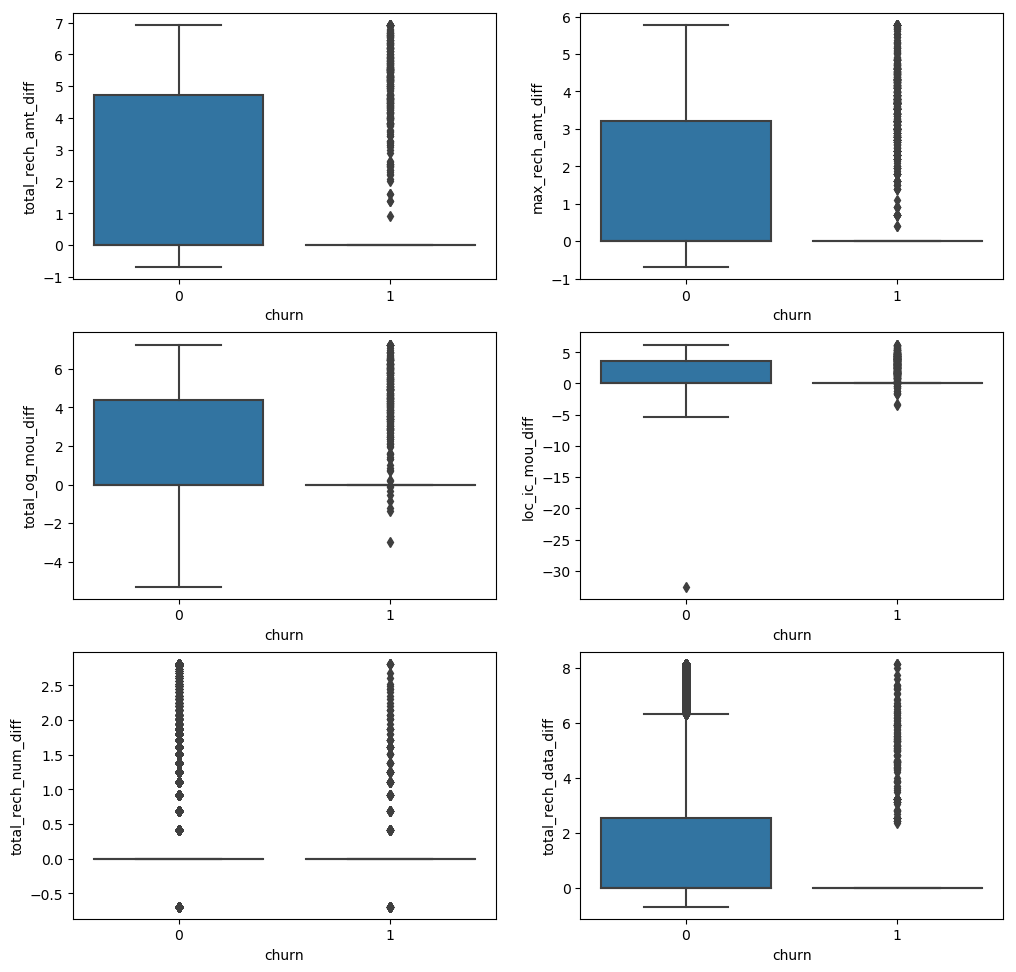

In [100]:
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x='churn',y='total_rech_amt_diff',data=df_cust)
plt.subplot(3,2,2)
sns.boxplot(x='churn',y='max_rech_amt_diff',data=df_cust)
plt.subplot(3,2,3)
sns.boxplot(x='churn',y='total_og_mou_diff',data=df_cust)
plt.subplot(3,2,4)
sns.boxplot(x='churn',y='loc_ic_mou_diff',data=df_cust)
plt.subplot(3,2,5)
sns.boxplot(x='churn',y='total_rech_num_diff',data=df_cust)
plt.subplot(3,2,6)
sns.boxplot(x='churn',y='total_rech_data_diff',data=df_cust)
plt.show()

 - The customers are more likely to churn if the difference in total and maximum recharge amount is negative - which means customers have not recharged for data and voice calls in the 8th month which is the action phase
 - customers who have not made any outgoing calls or received any incoming calls in 8th month are most likely to churn, means og_mou is 0 and hence the difference is negative
 - Same is the case for total recharge number and data difference

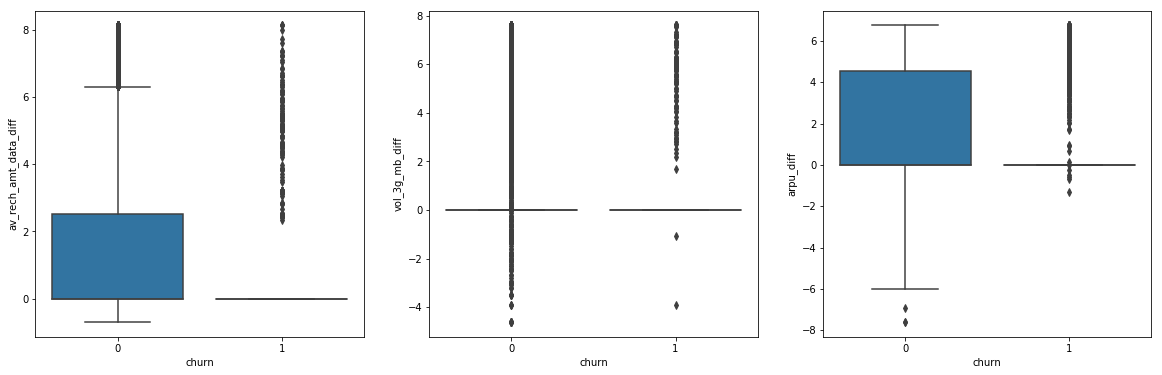

In [101]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x='churn',y='av_rech_amt_data_diff',data=df_cust)
plt.subplot(1,3,2)
sns.boxplot(x='churn',y='vol_3g_mb_diff',data=df_cust)
plt.subplot(1,3,3)
sns.boxplot(x='churn',y='arpu_diff',data=df_cust)
plt.show()

- When the average revenue per customer is less, that is no revenue in 8th month, customer will churn
- 3g mob data and avg data recharge does not have significant difference between churn and non-churn customers

#### AGE ON NETWORK:

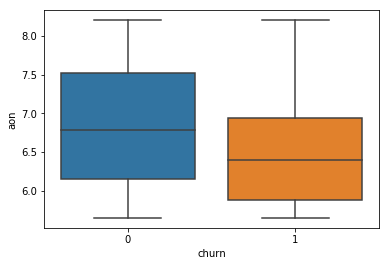

In [102]:
sns.boxplot(x='churn',y='aon',data=df_cust)

- lOwer the age of netowrk, higher is the churn rate for the customer

#### Total data recharge amount:

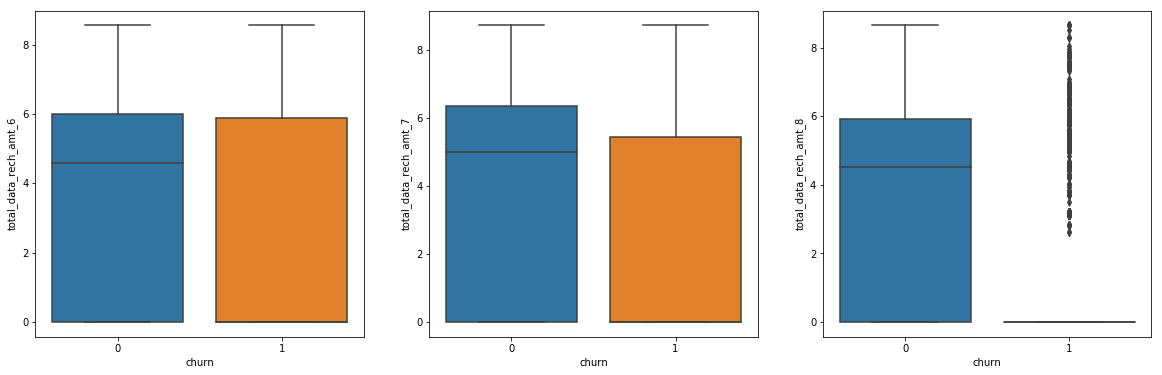

In [103]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x='churn',y='total_data_rech_amt_6',data=df_cust)
plt.subplot(1,3,2)
sns.boxplot(x='churn',y='total_data_rech_amt_7',data=df_cust)
plt.subplot(1,3,3)
sns.boxplot(x='churn',y='total_data_rech_amt_8',data=df_cust)
plt.show()

 - No difference between churn and non churn customer in 6th month
 - 7th month shows lower the total data recharge amt,more the churn rate. 8th month, action phase proves the same fact again.

#### EDA OBSERVATIONS:
- There are many highly correlated features in the data, which needs to be taken care. It will be taken care by feature reduction techniques
- No concrete relationshio with target varibale was found during EDA.Though Some features looks to be related with target variable 'Churn'
- Churn rate is oly 8.13% and Data is heavily imbalanced.Data balancing methods should be applied
- Outliers are floored and capped, post which log is taken.

In [104]:
df_cust.shape

(30001, 163)

In [105]:
df_cust1=df_cust.copy()

### MODEL BUILDING:

In [106]:
df_cust.dtypes.value_counts()

float64     156
object        6
category      1
dtype: int64

#### TRAIN-TEST SPLIT

In [107]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_cust.drop(['churn'], axis=1)
# Putting response variable to y
y = df_cust['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [108]:
y_train.shape

(21000,)

In [109]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
39186  6.990572  6.813772  6.384558     1.738710     2.113843     1.576915      5.023157      5.068967      4.585580       3.365916       3.283164       3.437529       1.813195       2.665838       2.288486          1.684545          2.000128          1.576915          3.074081          3.420346          2.986187          0.173953          0.000000          0.000000               0.0          1.856298           0.09531      3.340385      3.637060      3.205182          0.000000          0.000000          0.000000          0.959350          2.387845          2.584752           0.00000          0.000000          0.000000      0.959350      2.387845      2.584752      3.644928      3.617115      3.356549      0.000000      2.145931      0.095310      0.00000          0.0          0.0        5.020322        5.029850        4.533030          2.727199          3.562182          3.831030          4.898884          4.948618          4.659090          1.971299          2.276241   
39833  6.240975  5.741727  5.897500     4.975975     3.908818     3.706474      5.771877      5.427722      5.581276       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          4.166045          3.420346          3.706474          5.625605          5.190398          5.354509          2.496506          1.644805          3.542118               0.0          2.803966           0.00000      5.869466      5.372079      5.658890          4.387387          2.958030          0.000000          3.451257          2.975019          2.959587           0.00000          1.913977          0.000000      4.718320      3.820785      2.959587      0.000000      0.000000      0.000000      0.000000      2.803966      0.000000      0.00000          0.0          0.0        6.144271        5.625749        5.724010          3.311637          3.066191          3.601686          4.968841          5.320226          5.489599          4.520266          4.048824   
38778  5.698150  5.749966  5.747503     4.238878     4.344974     4.422208      5.808983      5.698368      5.362887       2.875258       3.744314       4.225519       3.135059       3.060115       4.339771          3.069912          2.451867          3.278653          5.347869          5.386969          4.846782          1.141033          1.943049          0.000000               0.0          0.000000           0.00000      5.458904      5.468651      5.036173          3.773680          4.113984          3.301745          4.617198          4.021595          3.660480           0.00000          0.000000          0.000000      4.975077      4.762088      4.190261      0.000000     -1.832581      0.000000      0.000000      0.000000      0.000000      0.00000          0.0          0.0        5.939144        5.870172        5.393309          2.829678          3.302849          3.843958          4.436870          4.953924          4.997280         -4.605170          0.000000   
43026  7.118956  5.779724  6.558822     7.674032     5.111023

In [110]:
X_train.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

#### FEATURE SCALING:

#### TRAIN SET:

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_train= list(X_train.columns)

#applying scaler to all variables
X_train[col_train] =scaler.fit_transform(X_train[col_train])

print(X_train.shape)
X_train.head()

(21000, 162)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
39186  1.421124  1.119466  0.555754    -1.048474    -0.840808    -0.973397     -0.088014     -0.044695     -0.080738       1.848285       2.102930       2.211078       0.628816       1.329737       1.107664         -0.624942         -0.473116         -0.579172         -0.453817         -0.305247         -0.349526         -0.406419         -0.540425         -0.522794         -0.257517          1.801260         -0.138408     -0.629768     -0.496512     -0.433281         -0.865545         -0.866455         -0.803760         -0.713505         -0.150622          0.028221         -0.245684         -0.239912         -0.230713     -0.888829     -0.377386     -0.204138      6.043659      5.874913      6.360581     -0.528662      0.911099     -0.513476    -0.193708          0.0          0.0       -0.370196       -0.367586       -0.144273         -0.037786          0.355335          0.564033          0.487455          0.504763          0.384355          0.456182          0.629383   
39833  0.158284 -0.702059 -0.053710     0.427658    -0.045146    -0.030846      0.439924      0.202862      0.453785      -0.429646      -0.383628      -0.389721      -0.451234      -0.407516      -0.404364          0.648885          0.258134          0.488865          0.888534          0.655845          0.797611          1.377987          0.713648          2.261265         -0.257517          2.863601         -0.245741      0.786096      0.498182      0.711281          0.807487          0.250665         -0.803760          0.261128          0.075997          0.176130         -0.245684          2.375122         -0.230713      0.442759      0.122412     -0.071359     -0.085514     -0.083091     -0.079094     -0.528662      1.379390     -0.583074    -0.193708          0.0          0.0        0.346577        0.006295        0.307873          0.257036          0.085112          0.437652          0.537804          0.788610          0.863742          2.019933          1.709921   
38778 -0.756209 -0.688059 -0.241404     0.091555     0.148190     0.285941      0.466088      0.389620      0.336547       1.516226       2.452189       2.807263       1.416199       1.586676       2.462970          0.086207         -0.240522          0.274300          0.742418          0.762578          0.551685          0.336584          0.941042         -0.522794         -0.257517         -0.279660         -0.245741      0.556250      0.553547      0.420807          0.573464          0.687218          0.484740          0.717150          0.479922          0.452700         -0.245684         -0.239912         -0.230713      0.533713      0.450732      0.364587     -0.085514     -3.101665     -0.079094     -0.528662     -0.616055     -0.583074    -0.193708          0.0          0.0        0.215762        0.159652        0.182325          0.013910          0.214047          0.571157          0.154937          0.508816          0.579565         -3.578378         -0.758178   
43026  1.637411 -0.637496  0.773812     1.657921     0.487759

#### TEST SET:

In [112]:
col_test = list(X_test.columns)

#applying scaler to all variables
X_test[col_test] =scaler.transform(X_test[col_test])

print(X_test.shape)
X_test.head()

(9001, 162)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
20296  0.241146  0.224538 -0.377831    -0.579617    -1.021343    -0.751530     -0.814103     -1.680308     -0.874341      -0.429646      -0.383628      -0.389721      -0.451234      -0.407516      -0.404364         -0.845124         -0.902456         -0.327768         -0.068642         -1.356701         -0.518010          0.439789         -0.226214         -0.110364         -4.313525         -0.279660         -0.245741     -0.286928     -1.313125     -0.452000          0.094215         -0.551901         -0.803760         -0.486787         -0.227205         -0.302172         -0.273108         -0.239912         -0.365968     -0.203992     -0.366663     -0.448075     -0.085514     -0.083091     -0.079094     -0.346920      0.252750      0.240744    -0.193708          0.0          0.0       -0.849693       -1.535225       -0.532525         -0.334562         -0.702047         -1.012120         -0.206578         -0.618900         -0.546508          0.579601          0.912988   
8279  -1.687768 -1.387188 -1.888993    -0.580478    -0.787885    -0.676783     -1.316241     -1.430573     -1.860778       0.755326      -0.383628       0.531711       0.357918       1.111011       0.666890         -0.429338         -1.523971         -0.837790         -2.016181         -1.401600         -3.019318         -0.540066         -0.540425         -0.522794          3.153759          2.297057          0.885249     -1.269126     -1.655525     -1.419037         -0.317400         -0.101507         -0.487296         -1.088726         -1.500095         -0.991715         -0.245684         -0.239912         -0.230713     -0.719461     -0.488901     -0.832485     -0.085514     -0.083091     -0.079094      1.851651      0.812137      0.150292    -0.193708          0.0          0.0       -1.242178       -1.631723       -1.077661          0.220430          0.477030         -0.580300         -1.857337         -1.373301         -1.855124         -0.753179         -0.758178   
72269  0.720945  0.725236  0.623292     0.826952     0.627616     0.741039      1.100218      1.078141      1.091418      -0.429646      -0.383628      -0.389721      -0.451234      -0.407516      -0.404364          1.460174          1.119618          1.172448          1.412429          1.392593          1.340334          0.433323         -0.540425          0.225197         -0.257517         -0.279660          2.351800      1.404017      1.292330      1.195772          0.487035          0.706469          0.874626          0.410681          0.739049          1.099558          1.504396          1.147180          2.984304      0.343350      0.593850      0.880663     -0.085514     -0.083091     -0.079094      1.452674     -0.616055      1.167264     1.073317          0.0          0.0        0.933057        0.833246        0.795140          0.877599          0.580345          0.350724          1.183411          1.211413          1.102690          0.819433          0.073013   
65602 -0.032060  0.056306  0.236022     0.153568     0.072642

In [ ]:
X_train.isnull().sum()

### PCA - FEATURE REDUCTION TECHNIQUE:

In [113]:
X_train.shape

(21000, 162)

In [114]:
#Importing required library
from sklearn.decomposition import PCA

#Instantiate
pca = PCA(random_state=42)

#Fit PCA on scaled train dataset
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [115]:
# Components from the PCA
pca.components_

# Explained variance ratio for each componant
pca.explained_variance_ratio_

array([1.71788385e-01, 1.09967549e-01, 5.89246783e-02, 5.02632083e-02,
       3.56150757e-02, 3.10749136e-02, 2.19396561e-02, 2.08632218e-02,
       1.93244685e-02, 1.76350262e-02, 1.65138536e-02, 1.60462195e-02,
       1.42265603e-02, 1.36671858e-02, 1.23237535e-02, 1.13565069e-02,
       1.11050458e-02, 1.08413966e-02, 1.04371267e-02, 1.01777916e-02,
       9.26932790e-03, 8.97066811e-03, 8.53813038e-03, 8.43260622e-03,
       7.80750847e-03, 7.59968359e-03, 7.41528585e-03, 7.23864368e-03,
       7.02458747e-03, 6.85389715e-03, 6.75744557e-03, 6.64477775e-03,
       6.55078866e-03, 6.20896012e-03, 6.08473134e-03, 5.95992306e-03,
       5.83434621e-03, 5.70101208e-03, 5.59806481e-03, 5.54702486e-03,
       5.34306628e-03, 5.19562265e-03, 5.10937871e-03, 5.04010134e-03,
       4.95781547e-03, 4.86603111e-03, 4.76536640e-03, 4.74374590e-03,
       4.58230874e-03, 4.47082657e-03, 4.39743169e-03, 4.32304224e-03,
       4.23124852e-03, 4.06367836e-03, 3.98184418e-03, 3.88028820e-03,
      

In [116]:
#SCREE PLOT
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.17178838, 0.28175593, 0.34068061, 0.39094382, 0.4265589 ,
       0.45763381, 0.47957347, 0.50043669, 0.51976116, 0.53739618,
       0.55391004, 0.56995626, 0.58418282, 0.59785   , 0.61017375,
       0.62153026, 0.63263531, 0.6434767 , 0.65391383, 0.66409162,
       0.67336095, 0.68233162, 0.69086975, 0.69930235, 0.70710986,
       0.71470955, 0.72212483, 0.72936348, 0.73638806, 0.74324196,
       0.74999941, 0.75664418, 0.76319497, 0.76940393, 0.77548866,
       0.78144859, 0.78728293, 0.79298395, 0.79858201, 0.80412904,
       0.8094721 , 0.81466772, 0.8197771 , 0.8248172 , 0.82977502,
       0.83464105, 0.83940642, 0.84415016, 0.84873247, 0.8532033 ,
       0.85760073, 0.86192377, 0.86615502, 0.8702187 , 0.87420054,
       0.87808083, 0.88185215, 0.88560027, 0.88923055, 0.89282032,
       0.89633436, 0.8997525 , 0.90312066, 0.90647777, 0.90971361,
       0.91280972, 0.91580768, 0.91874296, 0.92160592, 0.92444925,
       0.92711598, 0.92963656, 0.93207855, 0.93443826, 0.93675

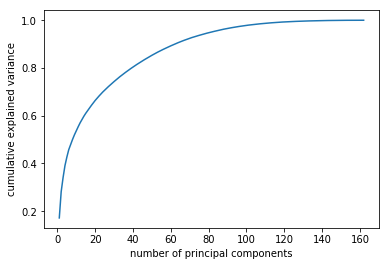

In [117]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.show()

- From the above scree plot, we can observed that around 65 componants explain 91% variance in the data

#### Checking the load of variables on the first 10 principal components:

In [118]:
col = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'PC10':pca.components_[9],'Feature':col})
print(pca_df.shape)
pca_df.head()

(162, 11)


PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      Feature
0 -0.109685  0.025205  0.022690 -0.098666  0.118537  0.160621  0.121817  0.001081 -0.014785  0.118892       arpu_6
1 -0.119193  0.038100  0.085783 -0.067732 -0.032714  0.112698  0.027424 -0.029587  0.083888  0.170911       arpu_7
2 -0.111414  0.092879  0.121633 -0.010361 -0.168065  0.039495  0.050452  0.005643  0.023733  0.085170       arpu_8
3 -0.138180 -0.008532  0.026681 -0.011296  0.095342  0.089549  0.104596 -0.090673 -0.050523 -0.054713  onnet_mou_6
4 -0.146076 -0.002913  0.056819  0.004329  0.016465  0.061383  0.043694 -0.115870  0.006846 -0.029523  onnet_mou_7

#### plotting the first 2 principal componants to visualise the variables:

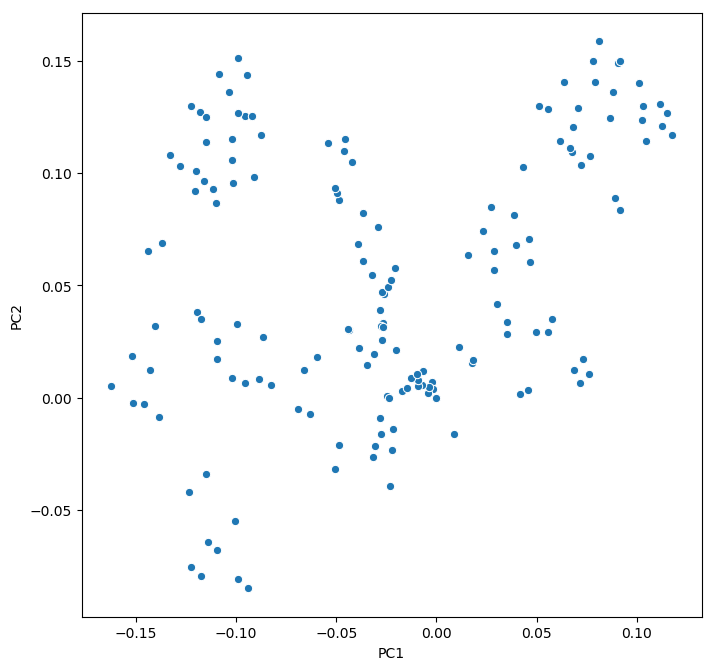

In [119]:
plt.figure(figsize=(8,8),dpi=100)
ax = sns.scatterplot(x='PC1',y='PC2',palette="set8",data=pca_df)
#for i, txt in enumerate(pca_df['Feature']):
    #ax.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.show()

##### We infer from the above plot that:
- we are able to see clusters in the features

#### INCREMENTAL PCA - TRAIN SET

In [120]:
# Importing library:
from sklearn.decomposition import IncrementalPCA

#Instantiate
pca_incremental = IncrementalPCA(n_components=65)

#Fit transformed intremental PCA on scaled dataset - to transform the data with respect to 5 PC
df_train_pca = pca_incremental.fit_transform(X_train)

In [121]:
df_train_pca.shape

(21000, 65)

### Correlation of principal components

In [122]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(65, 65)

In [ ]:
#plt.figure(figsize=[20,16])
#sns.heatmap(corrmat, annot=True)

- As expected, the correlation between the principal components is almost equal to zero, which means the principal components are NOT CORRELATED or NO RELATIONSHIP

#### INCREMENTAL PCA - TEST SET

In [123]:
df_test_pca = pca_incremental.transform(X_test)
df_test_pca.shape

(9001, 65)

### MODELS FOR PREDICTING CHURN
- Logistic regression with PCA
- Logistic regression with penalty
- Random forest with PCA
- XG boost with PCA

### LOGISTIC REGRESSION WITH PCA

In [124]:
# iMPORTING LIBRARIES:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Creating instance

logreg_pca = LogisticRegression(class_weight='balanced')

#fitting logistic regression model on pca componants
res_pca = logreg_pca.fit(df_train_pca, y_train)
res_pca

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### PREDICTIONS ON TRAIN SET:

In [125]:
# Getting the predicted values on the train set
y_train_pred_pca = res_pca.predict_proba(df_train_pca)

In [126]:
y_train_pred_pca

array([[0.53229248, 0.46770752],
       [0.9936266 , 0.0063734 ],
       [0.72093288, 0.27906712],
       ...,
       [0.85497138, 0.14502862],
       [0.66564464, 0.33435536],
       [0.78997621, 0.21002379]])

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_df_pca = pd.DataFrame(y_train_pred_pca)
# Converting to column dataframe
y_pred_1_pca = y_pred_df_pca.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1_pca.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_pca = pd.concat([y_train,y_pred_1_pca],axis=1)

# Renaming the column 
y_pred_final_pca = y_pred_final_pca.rename(columns={ 1 : 'churn_prob_pca'})

In [128]:
y_pred_final_pca.head()

churn  churn_prob_pca
0     0        0.467708
1     0        0.006373
2     0        0.279067
3     0        0.049653
4     0        0.024245

In [129]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_pred_final_pca['predicted_pca'] = y_pred_final_pca.churn_prob_pca.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final_pca.head()

churn  churn_prob_pca  predicted_pca
0     0        0.467708              0
1     0        0.006373              0
2     0        0.279067              0
3     0        0.049653              0
4     0        0.024245              0

In [130]:
from sklearn import metrics
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final_pca.churn,y_pred_final_pca.predicted_pca))

0.8644285714285714


In [131]:
# Confusion matrix 
confusion_pca = metrics.confusion_matrix(y_pred_final_pca.churn,y_pred_final_pca.predicted_pca)
print(confusion_pca)

[[16700  2609]
 [  238  1453]]


In [132]:
# Predicted     not_churn    churn
# Actual
# not_churn        16696     2613
# churn            227       1464  

In [133]:
metrics.roc_auc_score(y_pred_final_pca.churn,y_pred_final_pca.predicted_pca)

0.8620682700856888

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve( y_pred_final_pca.churn,y_pred_final_pca.predicted_pca, drop_intermediate = False )

In [136]:
print(fpr_pca.shape)
print(tpr_pca)

(3,)
[0.         0.85925488 1.        ]


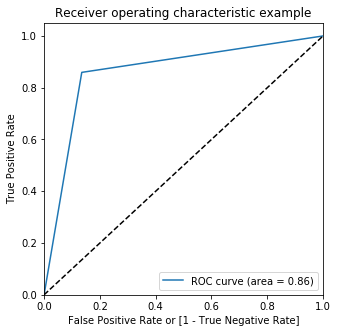

In [137]:
draw_roc(y_pred_final_pca.churn,y_pred_final_pca.predicted_pca)

#### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_pca[i]= y_pred_final_pca.churn_prob_pca.map(lambda x: 1 if x > i else 0)
y_pred_final_pca.head(10)

churn  churn_prob_pca  predicted_pca  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0     0        0.467708              0    1    1    1    1    1    0    0    0    0    0
1     0        0.006373              0    1    0    0    0    0    0    0    0    0    0
2     0        0.279067              0    1    1    1    0    0    0    0    0    0    0
3     0        0.049653              0    1    0    0    0    0    0    0    0    0    0
4     0        0.024245              0    1    0    0    0    0    0    0    0    0    0
5     0        0.006232              0    1    0    0    0    0    0    0    0    0    0
6     0        0.024569              0    1    0    0    0    0    0    0    0    0    0
7     0        0.015873              0    1    0    0    0    0    0    0    0    0    0
8     0        0.134657              0    1    1    0    0    0    0    0    0    0    0
9     0        0.101255              0    1    1    0    0    0    0    0    0    0    0

In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_pca = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_pca.churn, y_pred_final_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_pca.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_pca)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.525381  0.981668  0.485421
0.2   0.2  0.688238  0.958013  0.664612
0.3   0.3  0.774905  0.931993  0.761148
0.4   0.4  0.829048  0.895328  0.823243
0.5   0.5  0.864429  0.859255  0.864882
0.6   0.6  0.888667  0.803075  0.896162
0.7   0.7  0.910571  0.751035  0.924543
0.8   0.8  0.924143  0.665287  0.946812
0.9   0.9  0.931762  0.497930  0.969755


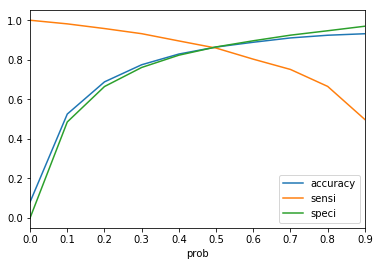

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df_pca.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.51 is the optimum point to take it as a cutoff probability. we wil be taking 0.47 as the cut off as we want to make sure to identify churn customers

In [141]:
y_pred_final_pca['final_predicted_pca'] = y_pred_final_pca.churn_prob_pca.map( lambda x: 1 if x > 0.47 else 0)

y_pred_final_pca.head(10)

churn  churn_prob_pca  predicted_pca  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted_pca
0     0        0.467708              0    1    1    1    1    1    0    0    0    0    0                    0
1     0        0.006373              0    1    0    0    0    0    0    0    0    0    0                    0
2     0        0.279067              0    1    1    1    0    0    0    0    0    0    0                    0
3     0        0.049653              0    1    0    0    0    0    0    0    0    0    0                    0
4     0        0.024245              0    1    0    0    0    0    0    0    0    0    0                    0
5     0        0.006232              0    1    0    0    0    0    0    0    0    0    0                    0
6     0        0.024569              0    1    0    0    0    0    0    0    0    0    0                    0
7     0        0.015873              0    1    0    0    0    0    0    0    0    0    0                    0
8     0        0.134657              0    1    1    0    0    0    0    0    0    0    0                    0
9     0        0.101255              0    1    1    0    0    0    0    0    0    0    0                    0

##### TRAIN DATA METRICS:

In [142]:
confusion2_pca = metrics.confusion_matrix(y_pred_final_pca.churn, y_pred_final_pca.final_predicted_pca)
confusion2_pca

array([[16489,  2820],
       [  212,  1479]], dtype=int64)

In [143]:
TP_pca = confusion2_pca[1,1] # true positive 
TN_pca = confusion2_pca[0,0] # true negatives
FP_pca = confusion2_pca[0,1] # false positives
FN_pca = confusion2_pca[1,0] # false negatives

In [144]:
# Let's check the overall accuracy.
print("Accuracy_train_pca:",round(metrics.accuracy_score(y_pred_final_pca.churn, y_pred_final_pca.final_predicted_pca),2))

# Let's see the sensitivity/recall of our logistic regression model
print("Sensitivity/recall_train_pca:",round(TP_pca / float(TP_pca+FN_pca),2))

# Let us calculate specificity
print("Specificity_train_pca:",round(TN_pca / float(TN_pca+FP_pca),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("FPR_train_pca:",round(FP_pca/ float(TN_pca+FP_pca),2))

# Positive predictive value/Precision 
print("Precision/positive predictive value_train_pca:",round(TP_pca / float(TP_pca+FP_pca),2))

# Negative predictive value
print("Neg predictive value_train_pca:",round(TN_pca / float(TN_pca+ FN_pca),2))

Accuracy_train_pca: 0.86
Sensitivity/recall_train_pca: 0.87
Specificity_train_pca: 0.85
FPR_train_pca: 0.15
Precision/positive predictive value_train_pca: 0.34
Neg predictive value_train_pca: 0.99


#### MAKING PREDICTIONS ON TEST SET:

In [145]:
# Getting the predicted values on the test set
y_test_pred_pca = res_pca.predict_proba(df_test_pca)

In [146]:
y_test_pred_pca

array([[0.2888738 , 0.7111262 ],
       [0.24888824, 0.75111176],
       [0.87818237, 0.12181763],
       ...,
       [0.99064734, 0.00935266],
       [0.42169193, 0.57830807],
       [0.77876776, 0.22123224]])

In [147]:
len(y_test_pred_pca)

9001

In [148]:
len(y_train_pred_pca)

21000

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_df_test_pca = pd.DataFrame(y_test_pred_pca)
# Converting to column dataframe
y_pred_2pca = y_pred_df_test_pca.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_2pca.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_test_pca = pd.concat([y_test,y_pred_2pca],axis=1)

# Renaming the column 
y_pred_final_test_pca= y_pred_final_test_pca.rename(columns={ 1 : 'churn_prob_pca'})

In [150]:
y_pred_final_test_pca.head()

churn  churn_prob_pca
0     1        0.711126
1     1        0.751112
2     0        0.121818
3     0        0.131492
4     1        0.990726

In [151]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.51 else 0 - which is the optimum cutoff

y_pred_final_test_pca['predicted_test_pca'] = y_pred_final_test_pca.churn_prob_pca.map(lambda x: 1 if x > 0.51 else 0)

# Let's see the head
y_pred_final_test_pca.head()

churn  churn_prob_pca  predicted_test_pca
0     1        0.711126                   1
1     1        0.751112                   1
2     0        0.121818                   0
3     0        0.131492                   0
4     1        0.990726                   1

##### TEST DATA METRICS:

In [152]:
confusion_test_pca = metrics.confusion_matrix(y_pred_final_test_pca.churn, y_pred_final_test_pca.predicted_test_pca)
confusion_test_pca

array([[7232, 1019],
       [ 108,  642]], dtype=int64)

In [153]:
# Predicted     not_churn    churn
# Actual
# not_churn        7232 TN  1019 FP
# churn            108 FN   642 TP  

In [154]:
TP_test_pca = confusion_test_pca[1,1] # true positive 
TN_test_pca = confusion_test_pca[0,0] # true negatives
FP_test_pca = confusion_test_pca[0,1] # false positives
FN_test_pca = confusion_test_pca[1,0] # false negatives

In [155]:
# Let's check the overall accuracy.
acc_log_pca = round(metrics.accuracy_score(y_pred_final_test_pca.churn, y_pred_final_test_pca.predicted_test_pca),2)
print("Accuracy_log_pca:",acc_log_pca)

# Let's see the sensitivity/recall of our logistic regression model
sen_rec_log_pca= round(TP_test_pca / float(TP_test_pca+FN_test_pca),2)
print("Sensitivity/recall_log_pca:",sen_rec_log_pca)

# Let us calculate specificity
spec_log_pca = round(TN_test_pca / float(TN_test_pca+FP_test_pca),2)
print("Specificity_log_pca:",spec_log_pca)

# Calculate false postive rate - predicting churn when customer does not have churned
fpr_log_pca = round(FP_test_pca/ float(TN_test_pca+FP_test_pca),2)
print("FPR_log_pca:",fpr_log_pca)

# Positive predictive value/Precision 
precision_ppv_log_pca = round(TP_test_pca / float(TP_test_pca+FP_test_pca),2)
print("Precision/positive predictive value_log_pca:",precision_ppv_log_pca)

# Negative predictive value
neg_pred_va_log_pca= round(TN_test_pca / float(TN_test_pca+ FN_test_pca),2)
print("Neg predictive value_log_pca:",neg_pred_va_log_pca)

#ROC
AUC_ROC_log_pca = round(metrics.roc_auc_score(y_pred_final_test_pca.churn, y_pred_final_test_pca.predicted_test_pca),2)
print("AUC_ROC_Log_pca:",AUC_ROC_log_pca)

Accuracy_log_pca: 0.87
Sensitivity/recall_log_pca: 0.86
Specificity_log_pca: 0.88
FPR_log_pca: 0.12
Precision/positive predictive value_log_pca: 0.39
Neg predictive value_log_pca: 0.99
AUC_ROC_Log_pca: 0.87


- The test and train metrics are almost the same.
- Accuracy is very good so is sensitivity and specificity.
- Logistic regression with PCA is giving slightly better results than rfe.
- Lets try logistic regression with penalty

### LOGISTIC REGRESSION WITH PENALTY:

In [ ]:
# C: Regularisation Paramter: Lambda
# Lamda: Tunes/Controls the amount of weight you want to put in the regularisation paramter
# C is inverse of lamda: Smaller a value means higher stronger the regularisations
#imbalance-class_weight
#hyperparameter tuning - chose best parameter - grid search cv

### L2 penalty on PCA dataframe:

In [156]:
#hyperparameter tuning - chose best parameter - grid search cv
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty':['l2'], 'class_weight': ['balanced']}
logistic = LogisticRegression()
model_l2 = GridSearchCV(estimator = logistic, cv =5, param_grid = params, scoring = 'recall', return_train_score  =True)
model_l2.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2], 'penalty': ['l2'], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [157]:
print("Model best score:",model_l2.best_score_)
print("Models best parameters:",model_l2.best_params_)

Model best score: 0.9089272710498033
Models best parameters: {'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'}


In [158]:
#Since l2 dones not perform feature selection, lets run l2on pca dataset
logreg_l2 = LogisticRegression(penalty = 'l2', C=0.0001, class_weight = 'balanced')
logreg_l2.fit(df_train_pca, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [159]:
# Predictions on test set:
y_pred_l2 = logreg_l2.predict(df_test_pca)

In [160]:
confusion_l2 = metrics.confusion_matrix(y_test,y_pred_l2)
confusion_l2

array([[5920, 2331],
       [  75,  675]], dtype=int64)

In [161]:
TP_l2 = confusion_l2[1,1] # true positive 
TN_l2 = confusion_l2[0,0] # true negatives
FP_l2 = confusion_l2[0,1] # false positives
FN_l2 = confusion_l2[1,0] # false negatives

In [162]:
# Let's check the overall accuracy.
acc_l2 = round(metrics.accuracy_score(y_test,y_pred_l2),2)
print("Accuracy_l2:",acc_l2)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_l2 = round(TP_l2 / float(TP_l2+FN_l2),2)
print("Sensitivity/recall_l2:",Sensitivity_recall_l2)

# Let us calculate specificity
Specificity_l2 = round(TN_l2 / float(TN_l2 +FP_l2),2)
print("Specificity_l2:",Specificity_l2)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_l2 = round(FP_l2/ float(TN_l2 +FP_l2),2)
print("FPR_l2:",FPR_l2)

# Positive predictive value/Precision 
Precision_ppv_l2 = round(TP_l2 / float(TP_l2+FP_l2),2)
print("Precision/positive predictive value_l2:",Precision_ppv_l2)

# Negative predictive value
npv_l2= round(TN_l2 / float(TN_l2 + FN_l2),2)
print("Neg predictive value_l2:",npv_l2)

#ROC
AUC_ROC_L2 = round(metrics.roc_auc_score(y_test,y_pred_l2),2)
print("AUC_ROC_L2:",AUC_ROC_L2)

Accuracy_l2: 0.73
Sensitivity/recall_l2: 0.9
Specificity_l2: 0.72
FPR_l2: 0.28
Precision/positive predictive value_l2: 0.22
Neg predictive value_l2: 0.99
AUC_ROC_L2: 0.81


### L1 penalty-original features:

In [163]:
#hyperparameter tuning - chose best parameter - grid search cv
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty':['l1'], 'class_weight': ['balanced']}
logistic = LogisticRegression()
model_l1 = GridSearchCV(estimator = logistic, cv =5, param_grid = params, scoring = 'recall', return_train_score  =True)
model_l1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2], 'penalty': ['l1'], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [164]:
print("Model best score:",model_l1.best_score_)
print("Models best parameters:",model_l1.best_params_)

Model best score: 0.8515759327277367
Models best parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'}


In [165]:
#Since l2 dones not perform feature selection, lets run l2on pca dataset
logreg_l1 = LogisticRegression(penalty = 'l1', C=0.001, class_weight = 'balanced')
logreg_l1.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [166]:
# Predictions on test set:
y_pred_l1 = logreg_l1.predict(X_test)

In [167]:
confusion_l1 = metrics.confusion_matrix(y_test,y_pred_l1)
confusion_l1

array([[6719, 1532],
       [ 106,  644]], dtype=int64)

In [168]:
TP_l1 = confusion_l1[1,1] # true positive 
TN_l1 = confusion_l1[0,0] # true negatives
FP_l1 = confusion_l1[0,1] # false positives
FN_l1 = confusion_l1[1,0] # false negatives

In [169]:
# Let's check the overall accuracy.
acc_l1 = round(metrics.accuracy_score(y_test,y_pred_l1),2)
print("Accuracy_l1:",acc_l1)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_l1 = round(TP_l1 / float(TP_l1+FN_l1),2)
print("Sensitivity/recall_l1:",Sensitivity_recall_l1)

# Let us calculate specificity
Specificity_l1 = round(TN_l1 / float(TN_l1 +FP_l1),2)
print("Specificity_l1:",Specificity_l1)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_l1 = round(FP_l1/ float(TN_l1 +FP_l1),2)
print("FPR_l1:",FPR_l1)

# Positive predictive value/Precision 
Precision_ppv_l1 = round(TP_l1 / float(TP_l1+FP_l1),2)
print("Precision/positive predictive value_l1:",Precision_ppv_l1)

# Negative predictive value
npv_l1= round(TN_l1 / float(TN_l1 + FN_l1),2)
print("Neg predictive value_l1:",npv_l1)

#ROC
AUC_ROC_l1 = round(metrics.roc_auc_score(y_test,y_pred_l1),2)
print("AUC_ROC_l1:",AUC_ROC_l1)

Accuracy_l1: 0.82
Sensitivity/recall_l1: 0.86
Specificity_l1: 0.81
FPR_l1: 0.19
Precision/positive predictive value_l1: 0.3
Neg predictive value_l1: 0.98
AUC_ROC_l1: 0.84


## Random Forest with PCA

In [170]:
# Running the random forest with default parameters.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight="balanced_subsample")

In [171]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [172]:
predictions = rfc.predict(df_test_pca)

In [173]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8251
          1       0.70      0.22      0.34       750

avg / total       0.91      0.93      0.91      9001



In [174]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8179   72]
 [ 582  168]]


In [175]:
predictions.shape

(9001,)

In [176]:
print(accuracy_score(y_test,predictions))

0.9273414065103878


## Hyperparameter Tuning


#### Tuning max_depth

In [177]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [178]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.246000      0.009165           0.0044        0.000490               2   {'max_depth': 2}           0.816472           0.837381           0.862619           0.764524           0.798762         0.815952        0.033399                4            0.825109            0.841250            0.858095            0.772202            0.800429          0.819417         0.030315
1       0.634400      0.020500           0.0064        0.000490               7   {'max_depth': 7}           0.914068           0.898333           0.911190           0.910952           0.898785         0.906667        0.006711                3            0.926008            0.927976            0.932679            0.922024            0.927980          0.927333         0.003445
2       0.864200      0.027838           0.0078        0.001166              12  {'max_depth': 12}           0.934063           0.924524           0.929286           0.933571           0.929031         0.930095        0.003483                2            0.970832            0.972619            0.972202            0.969524            0.969645          0.970964         0.001273
3       0.887398      0.018541           0.0072        0.000400              17  {'max_depth': 17}           0.935254           0.929286           0.932619           0.940000           0.935461         0.934524        0.003535                1            0.980118            0.981131            0.979048            0.979524            0.980656          0.980095         0.000750

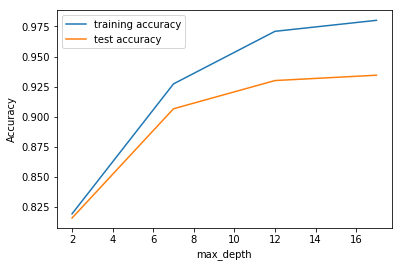

In [179]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease

### Tuning n_estimators

In [180]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                  params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       4.158800      0.227068           0.0344        0.007631                100   {'n_estimators': 100}           0.905261           0.883333           0.892381           0.895000           0.891403         0.893476        0.007065                4            0.904101            0.894405            0.896964            0.899702            0.901077          0.899250         0.003340
1      20.052998      0.583378           0.1510        0.011524                500   {'n_estimators': 500}           0.903118           0.890476           0.903095           0.900476           0.893784         0.898190        0.005148                1            0.901839            0.903750            0.904167            0.901607            0.902208          0.902714         0.001042
2      35.785994      1.330942           0.2692        0.038238                900   {'n_estimators': 900}           0.903594           0.890714           0.901905           0.896667           0.894022         0.897381        0.004802                3            0.899994            0.901012            0.904226            0.900655            0.901137          0.901405         0.001466
3      51.476791      0.366993           0.3620        0.001265               1300  {'n_estimators': 1300}           0.905023           0.890476           0.900714           0.900000           0.891165         0.897476        0.005703                2            0.901839            0.902440            0.904107            0.901250            0.902208          0.902369         0.000958

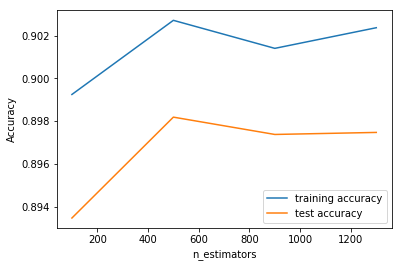

In [182]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [183]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 20, 24,44,48,54,64]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 20, 24, 44, 48, 54, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_features                params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.2362      0.003600           0.0044        0.000490                  4   {'max_features': 4}           0.866222           0.860952           0.877381           0.855238           0.844725         0.860905        0.010896                5            0.854158            0.873869            0.881607            0.851190            0.855663          0.863298         0.012128
1         0.4010      0.001673           0.0046        0.000490                  8   {'max_features': 8}           0.876220           0.850714           0.859286           0.860238           0.879733         0.865238        0.010973                3            0.885827            0.858452            0.865179            0.866310            0.883221          0.871798         0.010764
2         0.8958      0.003429           0.0052        0.000980                 20  {'max_features': 20}           0.893597           0.855714           0.865476           0.873571           0.861157         0.869905        0.013209                1            0.889577            0.867917            0.869881            0.877500            0.864889          0.873953         0.008853
3         1.0932      0.044247           0.0054        0.000800                 24  {'max_features': 24}           0.878838           0.852143           0.878333           0.872381           0.856633         0.867667        0.011167                2            0.875885            0.864286            0.884940            0.873452            0.865484          0.872810         0.007528
4         1.9246      0.016390           0.0050        0.000632                 44  {'max_features': 44}           0.875506           0.848095           0.874048           0.854762           0.856871         0.861857        0.010950                4            0.869933            0.863869            0.884464            0.859405            0.863163          0.868167         0.008821

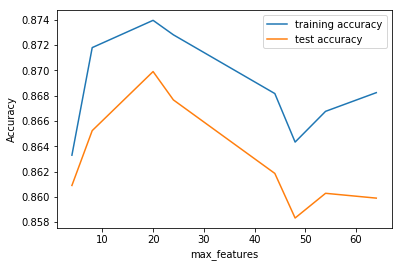

In [185]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features

### Tuning min_samples_leaf

In [186]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [187]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.6694      0.029736           0.0068        0.001166                    100  {'min_samples_leaf': 100}           0.894787           0.891667           0.889048           0.893333           0.889021         0.891571        0.002295                1            0.901244            0.909048            0.905893            0.901488            0.905422          0.904619         0.002935
1         0.5984      0.015832           0.0062        0.000400                    150  {'min_samples_leaf': 150}           0.895263           0.889048           0.887619           0.890476           0.882353         0.888952        0.004183                2            0.892910            0.899167            0.895774            0.894345            0.891971          0.894833         0.002522
2         0.5928      0.021311           0.0064        0.000490                    200  {'min_samples_leaf': 200}           0.884789           0.879048           0.873571           0.870000           0.873541         0.876190        0.005183                3            0.879517            0.893869            0.879940            0.883512            0.884531          0.884274         0.005179
3         0.5510      0.018155           0.0060        0.000633                    250  {'min_samples_leaf': 250}           0.880743           0.865238           0.877857           0.874286           0.872827         0.874190        0.005261                4            0.878683            0.877917            0.880952            0.871548            0.881079          0.878036         0.003473
4         0.5234      0.011603           0.0074        0.001744                    300  {'min_samples_leaf': 300}           0.876220           0.849048           0.876429           0.868571           0.864968         0.867048        0.010028                5            0.866004            0.866131            0.879821            0.872917            0.873579          0.871690         0.005185

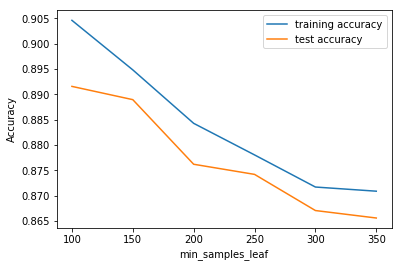

In [188]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

the model starts of overfit as you decrease the value of min_samples_leaf

### Tuning min_samples_split

In [189]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [190]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                      params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.8558      0.051184           0.0070    6.324097e-04                     200  {'min_samples_split': 200}           0.912164           0.902857           0.905000           0.910000           0.905930         0.907190        0.003400                1            0.921662            0.931429            0.929107            0.930536            0.924766          0.927500         0.003709
1         0.8118      0.044238           0.0060    1.168008e-07                     250  {'min_samples_split': 250}           0.905023           0.895714           0.897857           0.901667           0.906644         0.901381        0.004137                2            0.915352            0.919762            0.916190            0.913214            0.924469          0.917798         0.003948
2         0.7830      0.039125           0.0064    7.999659e-04                     300  {'min_samples_split': 300}           0.898596           0.888571           0.899286           0.900238           0.884973         0.894333        0.006299                3            0.909221            0.905357            0.910774            0.911845            0.905065          0.908452         0.002776
3         0.7654      0.029977           0.0062    4.000902e-04                     350  {'min_samples_split': 350}           0.903356           0.892619           0.888810           0.889286           0.889021         0.892619        0.005548                5            0.911423            0.914226            0.904167            0.903988            0.901673          0.907095         0.004842
4         0.7220      0.017424           0.0060    1.784161e-07                     400  {'min_samples_split': 400}           0.903118           0.885238           0.889286           0.902619           0.889736         0.894000        0.007411                4            0.905947            0.906726            0.902024            0.907679            0.903696          0.905214         0.002068

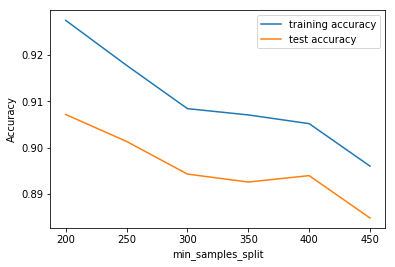

In [191]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [192]:
df_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0   5.285156  5.369782  5.365055    -0.356675    -0.544727     0.000000      2.421257      2.344686      0.788457       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          0.000000          0.000000          0.000000          0.000000          0.182322          0.000000          0.000000          0.000000          0.000000               0.0               0.0          0.000000      0.867100      0.970779      0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000           0.00000      0.000000      0.000000      0.000000           0.0      0.000000      0.000000      0.000000           0.0      0.000000          0.0          0.0          0.0        2.375836        2.310553       -1.560648         -1.272966         -0.776529         -1.832581          1.640937          1.900614          1.418277          0.000000          0.000000   
7   6.974647  7.207749  7.594191     4.057681     4.001498     3.956805      6.116841      6.340641      5.786621       2.786861       3.511247       3.454422       3.167161       2.532903       3.639164          3.939444          3.446171          3.695855          5.732143          6.103408          5.089323          4.129229          4.009875          3.974622               0.0               0.0          0.000000      6.045384      6.280227      5.544357          1.458615          3.148024          2.485740          3.909821          3.458208          3.894673          1.896119          2.999724           2.81421      4.108576      4.319353      4.354655           0.0     -1.714798      2.303585      1.504077           0.0      1.871802          0.0          0.0          0.0        6.189352        6.412212        5.858390          4.062854          3.473828          3.307253          5.382475          5.400377          4.797360          5.024933          4.619665   
8   5.936800  6.198932  4.922620     6.025117     5.860872     3.557631      4.550292      4.389871      4.916178       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          5.694170          5.382613          2.524928          4.393955          4.256747          3.922765          0.000000          0.000000          0.000000               0.0               0.0          1.967112      5.935132      5.663585      4.143769          4.758406          4.893577          3.117065          2.616666          2.306577          4.326646          0.000000          0.000000           0.00000      4.869532      4.966196      4.587821           0.0      0.000000      0.000000      0.000000           0.0      2.325325          0.0          0.0          0.0        6.231190        6.067638        5.144933          3.171365          2.286456         -1.171183          4.053175          2.637628          2.739549          0.000000          0.000000   
21  6.243104  6.393178  6.457962     4.628984     4.883635     4.44429

## Grid Search to Find Optimal Hyperparameters

In [193]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [1500,1600], 
    'max_features': [12,15]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced_subsample")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [194]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 51.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [1500, 1600], 'max_features': [12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [195]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8990952380952381 using {'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 1600}


**Fitting the final model with the best parameters obtained from grid search.**

In [196]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=1600,
                            class_weight="balanced_subsample")

In [197]:
df_train_pca.shape

(21000, 65)

In [198]:
# fit
fit_Trained_RFC=rfc.fit(df_train_pca,y_train)

In [199]:
# predictions on test set
predictions_pca = fit_Trained_RFC.predict(df_test_pca)

In [200]:
cm_test_pca = confusion_matrix(y_test, predictions_pca)
print(cm_test_pca)

[[7573  678]
 [ 175  575]]


Sensitivity/recall_rf :  0.92
Specificity_rf :  0.77
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      8251
          1       0.46      0.77      0.57       750

avg / total       0.93      0.91      0.92      9001

Accuracy for the test dataset 90.5%
ROC for the test dataset 91.7%


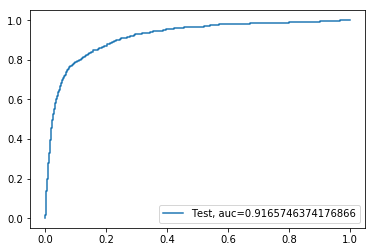

In [201]:
#test data metrics
preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_rf_pca = round((cm_test_pca[0,0]/(cm_test_pca[0,0]+cm_test_pca[0,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_pca )

specificity_rf_pca = round((cm_test_pca[1,1]/(cm_test_pca[1,0]+cm_test_pca[1,1])),2)
print('Specificity_rf : ', specificity_rf_pca)

print(classification_report(y_test, predictions_pca))
accuracy = metrics.accuracy_score(y_test, predictions_pca)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

##### Accuracy of the test and train are very similar the model is good fit.

### XGBOOST ON PCA:

In [202]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [203]:
# fit model on training data with default hyperparameters
xg_model_pca = XGBClassifier()
xg_model_pca.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [204]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1_pca = xg_model_pca.predict(df_test_pca)
y_pred_xg_pca = xg_model_pca.predict_proba(df_test_pca)
y_pred_xg_pca[:10]

array([[0.92445207, 0.07554793],
       [0.84161985, 0.15838015],
       [0.97056955, 0.02943043],
       [0.9492936 , 0.05070636],
       [0.46231705, 0.53768295],
       [0.9911963 , 0.0088037 ],
       [0.9932013 , 0.00679869],
       [0.98608625, 0.01391375],
       [0.98602164, 0.01397839],
       [0.90099734, 0.09900265]], dtype=float32)

In [205]:
from sklearn import metrics
confusion_xg_pca = metrics.confusion_matrix(y_test,y_pred_xg1_pca)
confusion_xg_pca

array([[8105,  146],
       [ 423,  327]], dtype=int64)

In [206]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg_pca[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 92.46%


In [207]:
label=y_train

In [208]:
ratio = float(np.sum(label == 0)) / np.sum(label == 1)

In [209]:
ratio

11.418687167356595

In [210]:
# fit model on training data with scale_pos_weight
xg_modelscale_pca = XGBClassifier(scale_pos_weight=ratio)
xg_modelscale_pca.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=11.418687167356595, seed=None,
       silent=None, subsample=1, verbosity=1)

In [211]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc

y_pred_xgs_pca = xg_modelscale_pca.predict_proba(df_test_pca)
y_pred_xgs_pca[:10]

array([[0.37911576, 0.62088424],
       [0.32824874, 0.67175126],
       [0.84437406, 0.15562595],
       [0.732865  , 0.26713505],
       [0.0865674 , 0.9134326 ],
       [0.9682927 , 0.03170726],
       [0.9513495 , 0.04865049],
       [0.8924988 , 0.10750119],
       [0.8031421 , 0.19685796],
       [0.6322385 , 0.3677615 ]], dtype=float32)

In [212]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xgs_pca[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 92.89%


#### Lets tune the hyperparameters using k-fold cv and find the optimal hyperparameters using grid search cv

In [213]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]
             }          

# specify model
xgb_model_pca = XGBClassifier(max_depth=2, n_estimators=200,scale_pos_weight=ratio)

# set up GridSearchCV()
model_cv_xg_pca = GridSearchCV(estimator = xgb_model_pca, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [214]:
# fit the model
model_cv_xg_pca.fit(df_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=11.418687167356595, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [215]:
# cv results
cv_results_xg_pca = pd.DataFrame(model_cv_xg_pca.cv_results_)
cv_results_xg_pca

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate param_subsample                                    params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
0       6.068667      0.056050         0.040333        0.001886                 0.2             0.3  {'learning_rate': 0.2, 'subsample': 0.3}           0.911928           0.916381           0.918447         0.915585        0.002720                3            0.970371            0.968912            0.967629          0.968971         0.001120
1       8.058332      0.193923         0.037000        0.000817                 0.2             0.6  {'learning_rate': 0.2, 'subsample': 0.6}           0.918783           0.921192           0.922042         0.920672        0.001380                2            0.972794            0.972511            0.971831          0.972378         0.000404
2       8.755331      0.048452         0.038000        0.000817                 0.2             0.9  {'learning_rate': 0.2, 'subsample': 0.9}           0.917065           0.922470           0.922603         0.920712        0.002580                1            0.973850            0.973784            0.972712          0.973449         0.000522
3       5.797000      0.020607         0.036667        0.000943                 0.6             0.3  {'learning_rate': 0.6, 'subsample': 0.3}           0.879013           0.866955           0.870539         0.872169        0.005056                6            0.968503            0.964290            0.959854          0.964216         0.003531
4       7.851667      0.062168         0.037333        0.000471                 0.6             0.6  {'learning_rate': 0.6, 'subsample': 0.6}           0.893802           0.894241           0.893792         0.893945        0.000209                5            0.988029            0.985367            0.985694          0.986363         0.001185
5       8.956000      0.068707         0.049667        0.013275                 0.6             0.9  {'learning_rate': 0.6, 'subsample': 0.9}           0.899495           0.901106           0.903117         0.901239        0.001482                4            0.990695            0.990534            0.990048          0.990426         0.000275

In [216]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg_pca.best_score_,'using',model_cv_xg_pca.best_params_)

We can get accuracy of 0.9207122995899587 using {'learning_rate': 0.2, 'subsample': 0.9}


The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [217]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'scale_pos_weight':ratio,
         'objective':'binary:logistic'}



In [218]:
# fit model on training data
xg_optimum_pca = XGBClassifier(params = params)
xg_optimum_pca.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.9, 'scale_pos_weight': 11.418687167356595, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

#### PREDICTIONS:

In [219]:
# predictions on test set
y_pred_xg_test1_pca = xg_optimum_pca.predict(df_test_pca)
y_pred_xg_test_pca = xg_optimum_pca.predict_proba(df_test_pca)
y_pred_xg_test_pca[:10]

array([[0.92445207, 0.07554793],
       [0.84161985, 0.15838015],
       [0.97056955, 0.02943043],
       [0.9492936 , 0.05070636],
       [0.46231705, 0.53768295],
       [0.9911963 , 0.0088037 ],
       [0.9932013 , 0.00679869],
       [0.98608625, 0.01391375],
       [0.98602164, 0.01397839],
       [0.90099734, 0.09900265]], dtype=float32)

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

#### TEST DATA METRICS:

In [220]:
# roc_auc TEST
auc_xg_test_pca = metrics.roc_auc_score(y_test, y_pred_xg_test_pca[:, 1])

print("AUC: %.2f%%" % (auc_xg_test_pca * 100.0))

AUC: 92.46%


In [221]:
confusion_xg_test_pca = metrics.confusion_matrix(y_test,y_pred_xg_test1_pca )
confusion_xg_test_pca

array([[8105,  146],
       [ 423,  327]], dtype=int64)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        7234 TN 00  1017 FP 01
# churn            111 FN 10  639 TP  11

In [222]:
TP_test_xg_pca = confusion_xg_test_pca[1,1] # true positive 
TN_test_xg_pca = confusion_xg_test_pca[0,0] # true negatives
FP_test_xg_pca = confusion_xg_test_pca[0,1] # false positives
FN_test_xg_pca = confusion_xg_test_pca[1,0] # false negatives

In [223]:
# Let's check the overall accuracy.
print("XGBOOST PCA TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1_pca),2))

sensitivity_pca_test = round((confusion_xg_test_pca[0,0]/(confusion_xg_test_pca[0,0]+confusion_xg_test_pca[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_pca_test )

specificity_pca_test = round((confusion_xg_test_pca[1,1]/(confusion_xg_test_pca[1,0]+confusion_xg_test_pca[1,1])),2)
print('Specificity_test : ', specificity_pca_test)

print(classification_report(y_test, y_pred_xg_test1_pca))

XGBOOST PCA TEST RESULTS:
Accuracy_test: 0.94
Sensitivity/recall_test :  0.98
Specificity_test :  0.44
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      8251
          1       0.69      0.44      0.53       750

avg / total       0.93      0.94      0.93      9001



In [224]:
### PREDICTION MODELS CONSOLIDATION:

data_predictions = [['logistic_pca',0.87,0.86,0.88,0.39,0.86],
                    ['logreg_l2_penalty',0.73,0.90,0.72,0.22,0.81],
                   ['logreg_l1_penalty',0.82,0.86,0.81,0.3,0.84],
                   ['Randomforest_pca',0.91,0.92,0.76,0.98,0.92],
                   ['Xgboost_pca',0.94,0.98,0.44,0.95,0.92]]

results_predictions_df = pd.DataFrame(data_predictions,columns = ['Model Name','Accuracy','Sensitivity or Recall',
                                                               'Specificity','Precision','Area under ROC curve'])
results_predictions_df

Model Name  Accuracy  Sensitivity or Recall  Specificity  Precision  Area under ROC curve
0       logistic_pca      0.87                   0.86         0.88       0.39                  0.86
1  logreg_l2_penalty      0.73                   0.90         0.72       0.22                  0.81
2  logreg_l1_penalty      0.82                   0.86         0.81       0.30                  0.84
3   Randomforest_pca      0.91                   0.92         0.76       0.98                  0.92
4        Xgboost_pca      0.94                   0.98         0.44       0.95                  0.92

### PREDICTION MODELS CONSOLIDATION:
- From the above table, we can see that all models have pretty good sensitivity,Specificity for xgboost is pretty low and precision for logistic models are low
- Area under ROC curve for all models is pretty decent
- Overall, random forest with PCA perform better than the rest, but its computationally time consuming.
- As we are more focussed on predicting the churn customers more than non churn customers, precision and recall is more imporant that accuracy. On that front, xgboost with pca model has high precison and recall.But specificity is low.
- We are choosing XGBOOSTMODEL TO PREDICT CHURNERS as it has higher precision and recall and high F1-score of 0.97

### MODELS FOR INTERPRETABILITY:

- Logistic regression with RFE
- Random forest on original features
- XGboost on original features

### LOGISTIC REGRESSION WITH RFE:

#### FEATURE REDUCTION USING RFE:

In [225]:
# iMPORTING LIBRARIES:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

#create instance
logreg = LogisticRegression(class_weight='balanced')

In [226]:
# running RFE with 10 variables as output
rfe = RFE(logreg, 10)   
rfe = rfe.fit(X_train, y_train)

In [227]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['arpu_7', 'roam_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'fb_user_8', 'sep_vbc_3g', 'days_left_rech_8', 'vol_2g_mb_diff'], dtype='object')

In [228]:
# Creating X_train & X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe]
X_test_rfe = X_test[col_rfe]

In [229]:
#checking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6           fb_user_8  12.15
5     max_rech_data_8  11.62
3        loc_ic_mou_8   3.18
2        loc_ic_mou_7   3.00
0              arpu_7   1.33
9      vol_2g_mb_diff   1.28
4  last_day_rch_amt_8   1.17
1       roam_og_mou_8   1.08
8    days_left_rech_8   1.08
7          sep_vbc_3g   1.05

In [230]:
X_train_rfe.head()

arpu_7  roam_og_mou_8  loc_ic_mou_7  loc_ic_mou_8  last_day_rch_amt_8  max_rech_data_8  fb_user_8  sep_vbc_3g  days_left_rech_8  vol_2g_mb_diff
39186  1.119466       1.107664      0.356325      0.329016            0.993775        -1.015223  -1.042887   -0.293218         -0.325987       -0.458490
39833 -0.702059      -0.404364      0.695636      0.726075            0.787698         0.934254   1.013317   -0.293218         -1.049688        2.571121
38778 -0.688059       2.462970      0.278758      0.489506            0.086236        -1.015223  -1.042887   -0.293218          1.121416       -0.458490
43026 -0.637496       1.683185      0.914397      1.716571            0.787698        -1.015223  -1.042887   -0.293218         -0.325987       -0.458490
12271 -0.049448      -0.404364      1.068731      1.035880            0.086236         1.126433   1.013317   -0.293218         -1.049688        1.200216

In [231]:
X_train_rfe = X_train_rfe.drop(['fb_user_8'],1)

In [232]:
#checking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3        loc_ic_mou_8  3.18
2        loc_ic_mou_7  3.00
5     max_rech_data_8  1.34
0              arpu_7  1.27
8      vol_2g_mb_diff  1.25
4  last_day_rch_amt_8  1.17
1       roam_og_mou_8  1.08
7    days_left_rech_8  1.05
6          sep_vbc_3g  1.04

In [233]:
vif.Features

3          loc_ic_mou_8
2          loc_ic_mou_7
5       max_rech_data_8
0                arpu_7
8        vol_2g_mb_diff
4    last_day_rch_amt_8
1         roam_og_mou_8
7      days_left_rech_8
6            sep_vbc_3g
Name: Features, dtype: object

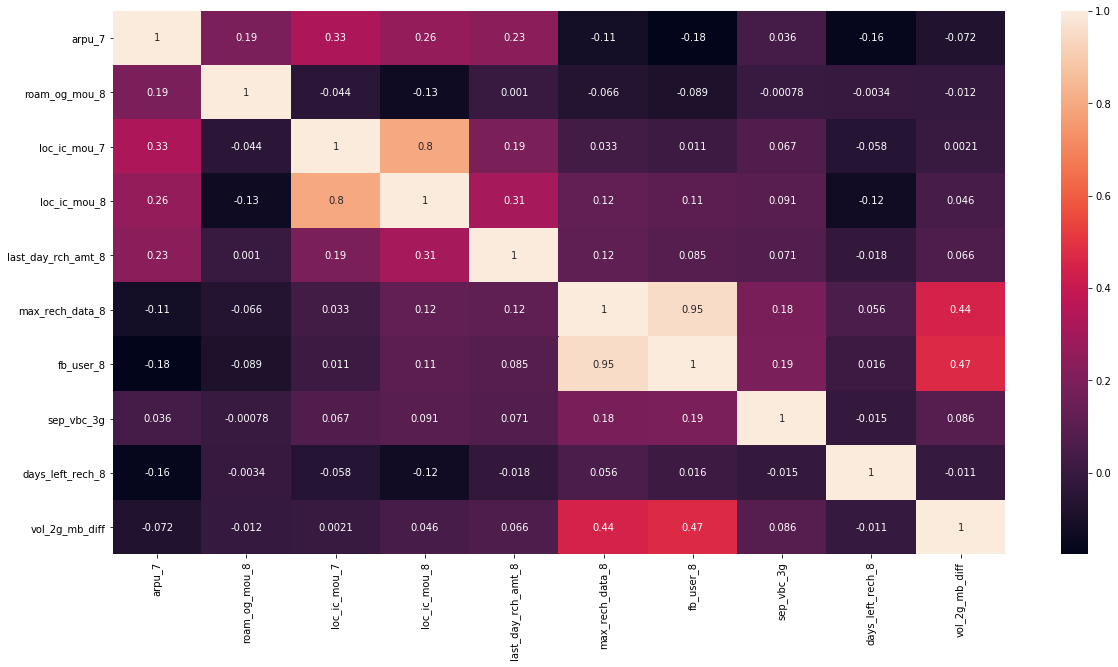

In [234]:
# Let's see the correlation matrix for rfe selected features
plt.figure(figsize = (20,10))       
sns.heatmap(X_train[col_rfe].corr(),annot = True)

In [235]:
#logistic refression model
res = logreg.fit(X_train[col_rfe], y_train)
res

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [236]:
(logreg.coef_)

array([[ 0.28940015,  0.40715603,  0.57294342, -1.54023667, -0.6927997 ,
        -0.84828016,  0.42073383, -0.72440157,  0.66101716, -0.4196575 ]])

#### PREDICTIONS ON TRAIN SET:

In [237]:
# Getting the predicted values on the train set
y_train_pred = res.predict_proba(X_train[col_rfe])

In [238]:
y_train_pred

array([[0.77410226, 0.22589774],
       [0.99444318, 0.00555682],
       [0.47727371, 0.52272629],
       ...,
       [0.92844854, 0.07155146],
       [0.812822  , 0.187178  ],
       [0.84159826, 0.15840174]])

In [239]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_train_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [240]:
y_pred_final.head()

churn  churn_prob
0     0    0.225898
1     0    0.005557
2     0    0.522726
3     0    0.039910
4     0    0.012574

In [241]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_pred_final['predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

churn  churn_prob  predicted
0     0    0.225898          0
1     0    0.005557          0
2     0    0.522726          1
3     0    0.039910          0
4     0    0.012574          0

In [242]:
from sklearn import metrics
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.churn,y_pred_final.predicted))

0.8598571428571429


In [243]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn,y_pred_final.predicted)
print(confusion)

[[16625  2684]
 [  259  1432]]


In [244]:
# Predicted     not_churn    churn
# Actual
# not_churn        16748     2561
# churn            292       1399  

In [245]:
metrics.roc_auc_score(y_pred_final.churn,y_pred_final.predicted)

0.8539168269629354

In [246]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [247]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn,y_pred_final.predicted, drop_intermediate = False )

In [248]:
print(fpr.shape)
print(tpr)

(3,)
[0.         0.84683619 1.        ]


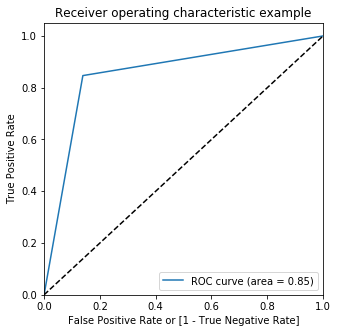

In [249]:
draw_roc(y_pred_final.churn,y_pred_final.predicted)

#### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [250]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head(20)

churn  churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.225898          0    1    1    1    0    0    0    0    0    0    0
1      0    0.005557          0    1    0    0    0    0    0    0    0    0    0
2      0    0.522726          1    1    1    1    1    1    1    0    0    0    0
3      0    0.039910          0    1    0    0    0    0    0    0    0    0    0
4      0    0.012574          0    1    0    0    0    0    0    0    0    0    0
5      0    0.012325          0    1    0    0    0    0    0    0    0    0    0
6      0    0.022795          0    1    0    0    0    0    0    0    0    0    0
7      0    0.017501          0    1    0    0    0    0    0    0    0    0    0
8      0    0.105658          0    1    1    0    0    0    0    0    0    0    0
9      0    0.106452          0    1    1    0    0    0    0    0    0    0    0
10     0    0.064958          0    1    0    0    0    0    0    0    0    0    0
11     0    0.058206          0    1    0    0    0    0    0    0    0    0    0
12     0    0.094424          0    1    0    0    0    0    0    0    0    0    0
13     0    0.105064          0    1    1    0    0    0    0    0    0    0    0
14     0    0.064114          0    1    0    0    0    0    0    0    0    0    0
15     0    0.338519          0    1    1    1    1    0    0    0    0    0    0
16     0    0.408856          0    1    1    1    1    1    0    0    0    0    0
17     0    0.123149          0    1    1    0    0    0    0    0    0    0    0
18     1    0.556729          1    1    1    1    1    1    1    0    0    0    0
19     0    0.082738          0    1    0    0    0    0    0    0    0    0    0

In [251]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.492524  0.982850  0.449583
0.2   0.2  0.677762  0.959196  0.653115
0.3   0.3  0.770714  0.924897  0.757212
0.4   0.4  0.823143  0.888232  0.817443
0.5   0.5  0.859857  0.846836  0.860997
0.6   0.6  0.885190  0.802484  0.892434
0.7   0.7  0.908952  0.748669  0.922989
0.8   0.8  0.920286  0.627439  0.945932
0.9   0.9  0.930286  0.483146  0.969444


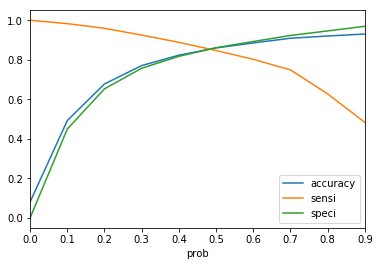

In [252]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [253]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.head(10)

churn  churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0     0    0.225898          0    1    1    1    0    0    0    0    0    0    0                0
1     0    0.005557          0    1    0    0    0    0    0    0    0    0    0                0
2     0    0.522726          1    1    1    1    1    1    1    0    0    0    0                1
3     0    0.039910          0    1    0    0    0    0    0    0    0    0    0                0
4     0    0.012574          0    1    0    0    0    0    0    0    0    0    0                0
5     0    0.012325          0    1    0    0    0    0    0    0    0    0    0                0
6     0    0.022795          0    1    0    0    0    0    0    0    0    0    0                0
7     0    0.017501          0    1    0    0    0    0    0    0    0    0    0                0
8     0    0.105658          0    1    1    0    0    0    0    0    0    0    0                0
9     0    0.106452          0    1    1    0    0    0    0    0    0    0    0                0

##### TRAIN DATA METRICS:

In [254]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
confusion2

array([[16252,  3057],
       [  220,  1471]], dtype=int64)

In [255]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [256]:
# Let's check the overall accuracy.
print("Accuracy_train:",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted),2))

# Let's see the sensitivity/recall of our logistic regression model
print("Sensitivity?recall_train:",round(TP / float(TP+FN),2))

# Let us calculate specificity
print("Specificity_train:",round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("FPR_train:",round(FP/ float(TN+FP),2))

# Positive predictive value/Precision 
print("Precision/positive predictive value_train:",round(TP / float(TP+FP),2))

# Negative predictive value
print("Neg predictive value_train:",round(TN / float(TN+ FN),2))

Accuracy_train: 0.84
Sensitivity?recall_train: 0.87
Specificity_train: 0.84
FPR_train: 0.16
Precision/positive predictive value_train: 0.32
Neg predictive value_train: 0.99


#### MAKING PREDICTIONS ON TEST SET:

In [257]:
# Getting the predicted values on the test set
y_test_pred = res.predict_proba(X_test[col_rfe])

In [258]:
y_test_pred

array([[0.46348013, 0.53651987],
       [0.09796449, 0.90203551],
       [0.89160583, 0.10839417],
       ...,
       [0.96953243, 0.03046757],
       [0.21741583, 0.78258417],
       [0.74770475, 0.25229525]])

In [259]:
len(y_test_pred)

9001

In [260]:
len(y_train_pred)

21000

In [261]:
# Converting y_pred to a dataframe which is an array
y_pred_df_test = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_pred_2 = y_pred_df_test.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test,y_pred_2],axis=1)

# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 1 : 'churn_prob'})

In [262]:
y_pred_final_test.head()

churn  churn_prob
0     1    0.536520
1     1    0.902036
2     0    0.108394
3     0    0.118706
4     1    0.964111

In [263]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.45 else 0 - which is the optimum cutoff

y_pred_final_test['predicted_test'] = y_pred_final_test.churn_prob.map(lambda x: 1 if x > 0.45 else 0)

# Let's see the head
y_pred_final_test.head()

churn  churn_prob  predicted_test
0     1    0.536520               1
1     1    0.902036               1
2     0    0.108394               0
3     0    0.118706               0
4     1    0.964111               1

##### TEST DATA METRICS:

In [264]:
confusion_test = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.predicted_test)
confusion_test

array([[6977, 1274],
       [ 102,  648]], dtype=int64)

In [265]:
# Predicted     not_churn    churn
# Actual
# not_churn        6998 TN  1253 FP
# churn            107 FN   643 TP  

In [266]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [267]:
# Let's check the overall accuracy.
print("Accuracy_test:",round(metrics.accuracy_score(y_pred_final_test.churn, y_pred_final_test.predicted_test),2))

# Let's see the sensitivity/recall of our logistic regression model
print("Sensitivity/recall_test:",round(TP_test / float(TP_test+FN_test),2))

# Let us calculate specificity
print("Specificity_test:",round(TN_test / float(TN_test+FP_test),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("FPR_test:",round(FP_test/ float(TN_test+FP_test),2))

# Positive predictive value/Precision 
print("Precision/positive predictive value_test:",round(TP_test / float(TP_test+FP_test),2))

# Negative predictive value
print("Neg predictive value_test:",round(TN_test / float(TN_test+ FN_test),2))

Accuracy_test: 0.85
Sensitivity/recall_test: 0.86
Specificity_test: 0.85
FPR_test: 0.15
Precision/positive predictive value_test: 0.34
Neg predictive value_test: 0.99


- The test and train metrics are almost the same.
- Accuracy is very good so is sensitivity and specificity.
- Logistic regression with RFE is giving good results.
- Lets try logistic regression with PCA

In [268]:
res.coef_[0]

array([ 0.28940015,  0.40715603,  0.57294342, -1.54023667, -0.6927997 ,
       -0.84828016,  0.42073383, -0.72440157,  0.66101716, -0.4196575 ])

In [269]:
# extracting features logistic regression - rfe
importances_log = list(res.coef_[0])
col_names =  X_train_rfe.columns

sorted_feature_importance_logreg = pd.DataFrame(sorted(zip(importances_log, list(col_names)), reverse=True))
sorted_feature_importance_logreg

0                   1
0  0.661017      vol_2g_mb_diff
1  0.572943        loc_ic_mou_7
2  0.420734          sep_vbc_3g
3  0.407156       roam_og_mou_8
4  0.289400              arpu_7
5 -0.692800  last_day_rch_amt_8
6 -0.724402    days_left_rech_8
7 -0.848280     max_rech_data_8
8 -1.540237        loc_ic_mou_8

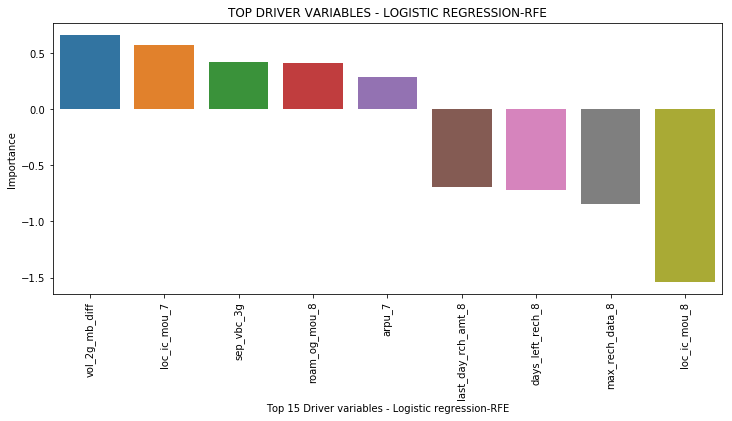

In [270]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_logreg)
ax.set(xlabel = 'Top 15 Driver variables - Logistic regression-RFE', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - LOGISTIC REGRESSION-RFE")
plt.show()

##### The features that influence the churn of the customer as per logistic regression with rfe model are as follows:
    
- loc_ic_mou_8
- loc_ic_mou_7
- max_rech_data_8
- arpu_7
- vol_2g_mb_diff
- last_day_rch_amt_8
- roam_og_mou_8
- days_left_rech_8
- sep_vbc_3g

## Random Forest with original features

In [271]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced_subsample")

In [272]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [273]:
predictions = rfc.predict(X_test)

In [274]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8251
          1       0.74      0.40      0.52       750

avg / total       0.93      0.94      0.93      9001



In [275]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8148  103]
 [ 450  300]]


In [276]:
print(accuracy_score(y_test,predictions))

0.9385623819575603


## Hyperparameter Tuning


#### Tuning max_depth

In [277]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [278]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.1918      0.010980           0.0070        0.001265               2   {'max_depth': 2}           0.882409           0.867143           0.876667           0.859762           0.864253         0.870048        0.008300                4            0.881838            0.879405            0.876369            0.860179            0.864651          0.872488         0.008524
1         0.4770      0.014283           0.0086        0.001855               7   {'max_depth': 7}           0.919305           0.909048           0.913571           0.918095           0.918552         0.915714        0.003890                3            0.928150            0.930238            0.931429            0.930774            0.931076          0.930333         0.001159
2         0.6606      0.023888           0.0084        0.000800              12  {'max_depth': 12}           0.937396           0.930000           0.934524           0.940952           0.936413         0.935857        0.003598                2            0.967558            0.973869            0.968452            0.966548            0.968097          0.968905         0.002564
3         0.6842      0.023928           0.0084        0.000490              17  {'max_depth': 17}           0.943347           0.936190           0.941905           0.948333           0.940462         0.942048        0.003951                1            0.978153            0.980238            0.978929            0.976012            0.978632          0.978393         0.001377

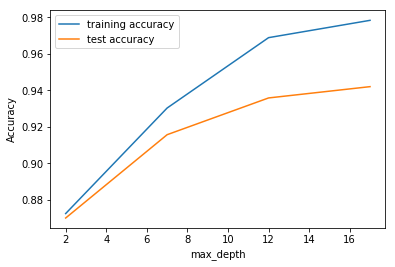

In [279]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease

### Tuning n_estimators

In [280]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [281]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                  params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         2.7620      0.037202           0.0304        0.000490                100   {'n_estimators': 100}           0.904070           0.893095           0.897857           0.895952           0.898547         0.897905        0.003616                4            0.901661            0.905714            0.905357            0.895893            0.899351          0.901595         0.003706
1        13.7728      0.251784           0.1412        0.001470                500   {'n_estimators': 500}           0.907641           0.891667           0.898571           0.899762           0.900929         0.899714        0.005107                1            0.904518            0.907619            0.905000            0.898750            0.901018          0.903381         0.003127
2        24.4226      0.054437           0.2496        0.001356                900   {'n_estimators': 900}           0.906213           0.894524           0.897143           0.897857           0.902834         0.899714        0.004218                1            0.903447            0.908571            0.904940            0.897143            0.901851          0.903190         0.003754
3        35.0436      0.222371           0.3558        0.001720               1300  {'n_estimators': 1300}           0.907165           0.893333           0.897381           0.898571           0.900452         0.899381        0.004538                3            0.903863            0.908393            0.905119            0.897143            0.900185          0.902941         0.003912

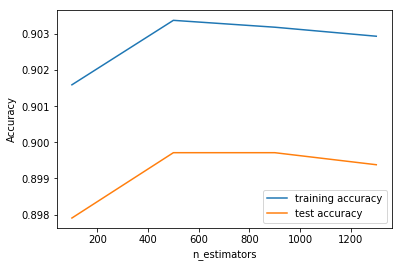

In [282]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [283]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 20, 24,44,48,54,64]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 20, 24, 44, 48, 54, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [284]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_features                params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.1534      0.014431           0.0058    3.999234e-04                  4   {'max_features': 4}           0.888122           0.864762           0.892619           0.877143           0.881400         0.880810        0.009636                8            0.887434            0.873929            0.899583            0.874048            0.876495          0.882298         0.009969
1         0.2192      0.005381           0.0060    1.784161e-07                  8   {'max_features': 8}           0.894311           0.884762           0.879524           0.897143           0.889259         0.889000        0.006362                7            0.897613            0.897500            0.888333            0.892679            0.890780          0.893381         0.003677
2         0.4344      0.005783           0.0060    1.907349e-07                 20  {'max_features': 20}           0.896691           0.886905           0.897143           0.889048           0.884973         0.890952        0.005040                5            0.898208            0.899643            0.902321            0.895060            0.888757          0.896798         0.004654
3         0.5046      0.011182           0.0058    4.000426e-04                 24  {'max_features': 24}           0.910021           0.895238           0.899048           0.886667           0.888307         0.895857        0.008399                2            0.908566            0.909940            0.904405            0.888274            0.890066          0.900250         0.009246
4         0.8542      0.007332           0.0060    9.536743e-08                 44  {'max_features': 44}           0.904547           0.887857           0.888810           0.894048           0.901881         0.895429        0.006750                3            0.896720            0.901071            0.893690            0.897798            0.901137          0.898083         0.002810

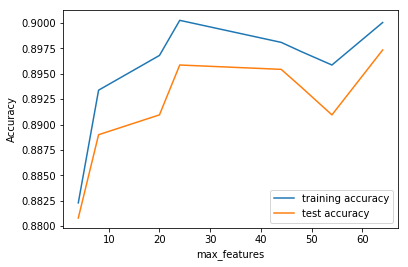

In [285]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features

### Tuning min_samples_leaf

In [286]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [287]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.4664      0.009436           0.0072        0.000400                    100  {'min_samples_leaf': 100}           0.904308           0.872619           0.887381           0.888333           0.889497         0.888429        0.010044                1            0.903506            0.889048            0.897619            0.898631            0.894173          0.896595         0.004812
1         0.4574      0.028577           0.0072        0.000400                    150  {'min_samples_leaf': 150}           0.883599           0.873810           0.880714           0.881190           0.883306         0.880524        0.003543                2            0.881779            0.883512            0.884167            0.880833            0.886495          0.883357         0.001969
2         0.4354      0.007446           0.0072        0.000748                    200  {'min_samples_leaf': 200}           0.879314           0.871190           0.877857           0.879286           0.876399         0.876810        0.003008                3            0.882017            0.882500            0.878869            0.881071            0.880067          0.880905         0.001316
3         0.3946      0.010965           0.0068        0.000748                    250  {'min_samples_leaf': 250}           0.884313           0.872619           0.874762           0.868571           0.878066         0.875667        0.005310                4            0.880826            0.889345            0.874226            0.875298            0.879174          0.879774         0.005365
4         0.3742      0.013167           0.0066        0.000490                    300  {'min_samples_leaf': 300}           0.884313           0.862143           0.882381           0.873095           0.867111         0.873810        0.008548                5            0.883445            0.877560            0.885119            0.873690            0.871258          0.878214         0.005373

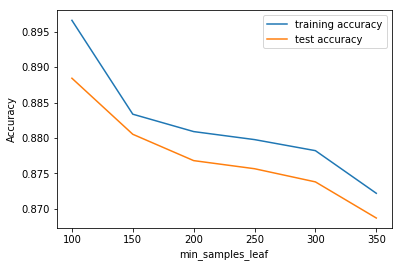

In [288]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

the model starts of overfit as you decrease the value of min_samples_leaf

### Tuning min_samples_split

In [289]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced_subsample")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [290]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                      params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0         0.6010      0.011472           0.0078         0.00040                     200  {'min_samples_split': 200}           0.910736           0.897381           0.904762           0.907143           0.905930         0.905190        0.004388                1            0.917971            0.916310            0.918452            0.918810            0.918636          0.918036         0.000907
1         0.5760      0.015479           0.0074         0.00049                     250  {'min_samples_split': 250}           0.904785           0.892381           0.900714           0.902619           0.904025         0.900905        0.004481                2            0.914162            0.910476            0.916250            0.912738            0.915184          0.913762         0.002011
2         0.5740      0.017720           0.0078         0.00040                     300  {'min_samples_split': 300}           0.900500           0.891429           0.895000           0.895000           0.894975         0.895381        0.002908                3            0.907852            0.907440            0.907262            0.901131            0.902982          0.905333         0.002746
3         0.5418      0.011426           0.0072         0.00040                     350  {'min_samples_split': 350}           0.901928           0.887381           0.900476           0.889524           0.893784         0.894619        0.005776                4            0.903328            0.900000            0.905714            0.894821            0.905125          0.901798         0.004016
4         0.5442      0.010419           0.0074         0.00080                     400  {'min_samples_split': 400}           0.896929           0.882857           0.890238           0.890238           0.893070         0.890667        0.004612                5            0.899756            0.896012            0.904107            0.896786            0.900542          0.899440         0.002895

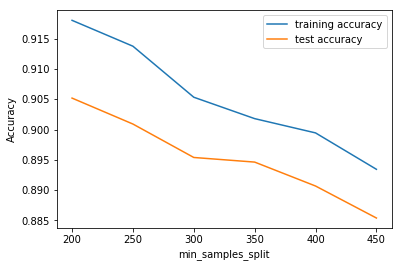

In [291]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [292]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [900,450], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced_subsample")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [293]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 22.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 12, 15], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [900, 450], 'max_features': [10, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [294]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8943809523809524 using {'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 450}


**Fitting the final model with the best parameters obtained from grid search.**

In [295]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=450,
                            class_weight="balanced_subsample")

In [296]:
# fit
fit_Trained_RFC=rfc.fit(X_train,y_train)

In [297]:
### Calculating mean accuracy
fit_Trained_RFC.score(X_train,y_train)

0.9051428571428571

In [298]:
# predictions on test set
predictions = fit_Trained_RFC.predict(X_test)

In [299]:
fit_Trained_RFC.score(X_test,y_test)

0.9038995667148094

In [300]:
cm_test = confusion_matrix(y_test, predictions)
print(cm_test)

[[7527  724]
 [ 141  609]]


Sensitivity/recall_rf :  0.91
Specificity_rf :  0.81
             precision    recall  f1-score   support

          0       0.98      0.91      0.95      8251
          1       0.46      0.81      0.58       750

avg / total       0.94      0.90      0.92      9001

Accuracy for the test dataset 90.4%
ROC for the test dataset 93.8%


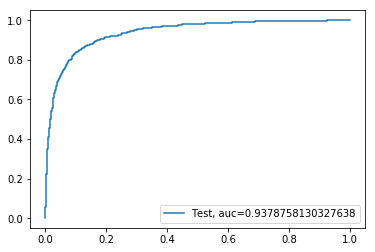

In [301]:
#TEST DATA METRICS
preds_probs_RFC=fit_Trained_RFC.predict_proba(X_test)[:,1]

sensitivity_rf_test = round((cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_test)

specificity_rf_test = round((cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])),2)
print('Specificity_rf : ', specificity_rf_test)

print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

##### Accuracy of the test and train are very similar the model is good fit.

#### Extracting features-rf:

In [302]:
importances_rf = fit_Trained_RFC.feature_importances_
col_names =  X_train.columns

sorted_feature_importance_rf = pd.DataFrame(sorted(zip(importances_rf, list(col_names)), reverse=True))
sorted_feature_importance_rf.head(10)

0                   1
0  0.113258        loc_ic_mou_8
1  0.097739    loc_ic_t2m_mou_8
2  0.097451      total_ic_mou_8
3  0.059590      total_og_mou_8
4  0.051507    loc_ic_t2t_mou_8
5  0.047032  last_day_rch_amt_8
6  0.044006    days_left_rech_8
7  0.037957       roam_og_mou_8
8  0.036271    loc_og_t2m_mou_8
9  0.034841        loc_og_mou_8

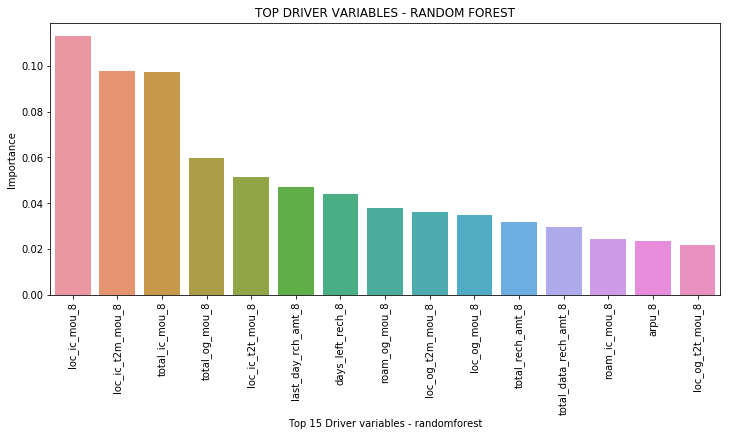

In [303]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_rf[0:15])
ax.set(xlabel = 'Top 15 Driver variables - randomforest', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - RANDOM FOREST")
plt.show()

##### The features that influence the churn of the customer as per random forest model are as follows:
    
- loc_ic_mou_8
- total_ic_mou_8
- loc_ic_t2m_mou_8
- loc_ic_t2t_mou_8
- last_day_rch_amt_8
- loc_og_t2m_mou_8
- loc_og_mou_8
- total_rech_amt_8
- total_og_mou_8
- days_left_rech_8

### XGBOOST ON ORIGINAL FEATURES:

In [304]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [305]:
# fit model on training data with default hyperparameters
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [306]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1 = xg_model.predict(X_test)
y_pred_xg = xg_model.predict_proba(X_test)
y_pred_xg[:10]

array([[0.79764175, 0.20235823],
       [0.7712327 , 0.22876726],
       [0.9887076 , 0.01129237],
       [0.991529  , 0.00847101],
       [0.5731565 , 0.42684355],
       [0.99442697, 0.00557306],
       [0.9952488 , 0.00475121],
       [0.99624324, 0.00375677],
       [0.9884888 , 0.01151118],
       [0.9930558 , 0.0069442 ]], dtype=float32)

In [307]:
from sklearn import metrics
confusion_xg = metrics.confusion_matrix(y_test,y_pred_xg1)
confusion_xg

array([[8107,  144],
       [ 352,  398]], dtype=int64)

In [308]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.34%


In [309]:
label=y_train

In [310]:
ratio = float(np.sum(label == 0)) / np.sum(label == 1)

In [311]:
ratio

11.418687167356595

In [312]:
# fit model on training data with scale_pos_weight
xg_modelscale = XGBClassifier(scale_pos_weight=ratio)
xg_modelscale.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=11.418687167356595, seed=None,
       silent=None, subsample=1, verbosity=1)

In [313]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc

y_pred_xgs = xg_modelscale.predict_proba(X_test)
y_pred_xgs[:10]

array([[0.3552785 , 0.6447215 ],
       [0.25942677, 0.7405732 ],
       [0.93432516, 0.06567486],
       [0.94428533, 0.05571464],
       [0.10117054, 0.89882946],
       [0.96575546, 0.03424456],
       [0.98488414, 0.01511584],
       [0.97186226, 0.02813774],
       [0.90697783, 0.09302218],
       [0.97883385, 0.02116613]], dtype=float32)

In [314]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xgs[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.28%


#### Lets tune the hyperparameters using k-fold cv and find the optimal hyperparameters using grid search cv

In [315]:
df_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0   5.285156  5.369782  5.365055    -0.356675    -0.544727     0.000000      2.421257      2.344686      0.788457       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          0.000000          0.000000          0.000000          0.000000          0.182322          0.000000          0.000000          0.000000          0.000000               0.0               0.0          0.000000      0.867100      0.970779      0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000          0.000000           0.00000      0.000000      0.000000      0.000000           0.0      0.000000      0.000000      0.000000           0.0      0.000000          0.0          0.0          0.0        2.375836        2.310553       -1.560648         -1.272966         -0.776529         -1.832581          1.640937          1.900614          1.418277          0.000000          0.000000   
7   6.974647  7.207749  7.594191     4.057681     4.001498     3.956805      6.116841      6.340641      5.786621       2.786861       3.511247       3.454422       3.167161       2.532903       3.639164          3.939444          3.446171          3.695855          5.732143          6.103408          5.089323          4.129229          4.009875          3.974622               0.0               0.0          0.000000      6.045384      6.280227      5.544357          1.458615          3.148024          2.485740          3.909821          3.458208          3.894673          1.896119          2.999724           2.81421      4.108576      4.319353      4.354655           0.0     -1.714798      2.303585      1.504077           0.0      1.871802          0.0          0.0          0.0        6.189352        6.412212        5.858390          4.062854          3.473828          3.307253          5.382475          5.400377          4.797360          5.024933          4.619665   
8   5.936800  6.198932  4.922620     6.025117     5.860872     3.557631      4.550292      4.389871      4.916178       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000          5.694170          5.382613          2.524928          4.393955          4.256747          3.922765          0.000000          0.000000          0.000000               0.0               0.0          1.967112      5.935132      5.663585      4.143769          4.758406          4.893577          3.117065          2.616666          2.306577          4.326646          0.000000          0.000000           0.00000      4.869532      4.966196      4.587821           0.0      0.000000      0.000000      0.000000           0.0      2.325325          0.0          0.0          0.0        6.231190        6.067638        5.144933          3.171365          2.286456         -1.171183          4.053175          2.637628          2.739549          0.000000          0.000000   
21  6.243104  6.393178  6.457962     4.628984     4.883635     4.44429

In [316]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]
             }          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,scale_pos_weight=ratio)

# set up GridSearchCV()
model_cv_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [317]:
# fit the model
model_cv_xg.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=11.418687167356595, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [318]:
# 'scale_pos_weight':[0.8,1.0,5,10,11.5,15]

In [319]:
# cv results
cv_results_xg = pd.DataFrame(model_cv_xg.cv_results_)
cv_results_xg

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate param_subsample                                    params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
0      11.714333      0.100454         0.066667        0.002357                 0.2             0.3  {'learning_rate': 0.2, 'subsample': 0.3}           0.929543           0.931119           0.933659         0.931440        0.001695                3            0.974714            0.974760            0.971609          0.973694         0.001475
1      14.188667      0.055379         0.068000        0.002944                 0.2             0.6  {'learning_rate': 0.2, 'subsample': 0.6}           0.930651           0.938792           0.938844         0.936095        0.003850                2            0.978501            0.977777            0.976859          0.977712         0.000672
2      14.826333      0.402974         0.070667        0.007587                 0.2             0.9  {'learning_rate': 0.2, 'subsample': 0.9}           0.933818           0.934551           0.940801         0.936390        0.003133                1            0.978607            0.977714            0.976557          0.977626         0.000839
3      11.499000      0.158350         0.070000        0.006377                 0.6             0.3  {'learning_rate': 0.6, 'subsample': 0.3}           0.887178           0.896847           0.898262         0.894095        0.004926                6            0.974353            0.973721            0.974096          0.974057         0.000260
4      14.088987      0.238420         0.067000        0.005715                 0.6             0.6  {'learning_rate': 0.6, 'subsample': 0.6}           0.910792           0.912416           0.919390         0.914199        0.003730                5            0.990020            0.989115            0.987997          0.989044         0.000827
5      14.170320      0.299955         0.071667        0.006944                 0.6             0.9  {'learning_rate': 0.6, 'subsample': 0.9}           0.921109           0.924084           0.930711         0.925301        0.004014                4            0.991902            0.991157            0.991746          0.991602         0.000321

In [320]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg.best_score_,'using',model_cv_xg.best_params_)

We can get accuracy of 0.9363896585983225 using {'learning_rate': 0.2, 'subsample': 0.9}


The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [321]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'scale_pos_weight':ratio,
         'objective':'binary:logistic'}



In [322]:
# fit model on training data
xg_optimum = XGBClassifier(params = params)
xg_optimum.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.9, 'scale_pos_weight': 11.418687167356595, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

#### PREDICTIONS:

In [323]:
# predictions on TRAIN set
y_pred_xg_train1 = xg_optimum.predict(X_train)
y_pred_xg_train = xg_optimum.predict_proba(X_train)
y_pred_xg_train[:10]

array([[0.94255614, 0.05744388],
       [0.9966764 , 0.00332364],
       [0.96359414, 0.03640588],
       [0.990231  , 0.00976903],
       [0.9938305 , 0.00616953],
       [0.9965324 , 0.00346761],
       [0.9926479 , 0.00735213],
       [0.9956423 , 0.0043577 ],
       [0.9715944 , 0.02840562],
       [0.9911517 , 0.00884833]], dtype=float32)

In [324]:
# predictions on test set
y_pred_xg_test1 = xg_optimum.predict(X_test)
y_pred_xg_test = xg_optimum.predict_proba(X_test)
y_pred_xg_test[:10]

array([[0.79764175, 0.20235823],
       [0.7712327 , 0.22876726],
       [0.9887076 , 0.01129237],
       [0.991529  , 0.00847101],
       [0.5731565 , 0.42684355],
       [0.99442697, 0.00557306],
       [0.9952488 , 0.00475121],
       [0.99624324, 0.00375677],
       [0.9884888 , 0.01151118],
       [0.9930558 , 0.0069442 ]], dtype=float32)

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

#### TRAIN DATA METRICS:

In [325]:
# roc_auc TEST
auc_xg_train = metrics.roc_auc_score(y_train, y_pred_xg_train[:, 1])

print("AUC: %.2f%%" % (auc_xg_train * 100.0))

AUC: 96.36%


In [326]:
confusion_xg_train = metrics.confusion_matrix(y_train,y_pred_xg_train1 )
confusion_xg_train

array([[18980,   329],
       [  765,   926]], dtype=int64)

In [327]:
# Predicted     not_churn    churn
# Actual
# not_churn        7234 TN  1017 FP
# churn            111 FN   639 TP  

In [328]:
# Let's check the overall accuracy.
print("XGBOOST original features TRAIN RESULTS:")
print("Accuracy_train:",round(metrics.accuracy_score(y_train,y_pred_xg_train1),2))

sensitivity_xg_train = round((confusion_xg_train[0,0]/(confusion_xg_train[0,0]+confusion_xg_train[0,1])),2)
print('Sensitivity/recall_train : ', sensitivity_xg_train )

specificity_xg_train = round((confusion_xg_train[1,1]/(confusion_xg_train[1,0]+confusion_xg_train[1,1])),2)
print('Specificity_train : ', specificity_xg_train)

print(classification_report(y_train, y_pred_xg_train1))

XGBOOST original features TRAIN RESULTS:
Accuracy_train: 0.95
Sensitivity/recall_train :  0.98
Specificity_train :  0.55
             precision    recall  f1-score   support

          0       0.96      0.98      0.97     19309
          1       0.74      0.55      0.63      1691

avg / total       0.94      0.95      0.94     21000



#### TEST DATA METRICS:

In [329]:
# roc_auc TEST
auc_xg_test = metrics.roc_auc_score(y_test, y_pred_xg_test[:, 1])

print("AUC: %.2f%%" % (auc_xg_test * 100.0))

AUC: 94.34%


In [330]:
confusion_xg_test = metrics.confusion_matrix(y_test,y_pred_xg_test1 )
confusion_xg_test

array([[8107,  144],
       [ 352,  398]], dtype=int64)

In [331]:
# Predicted     not_churn    churn
# Actual
# not_churn        7234 TN  1017 FP
# churn            111 FN   639 TP  

In [332]:
# Let's check the overall accuracy.
print("XGBOOST original features TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1),2))

sensitivity_xg_test = round((confusion_xg_test[0,0]/(confusion_xg_test[0,0]+confusion_xg_test[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_xg_test )

specificity_xg_test = round((confusion_xg_test[1,1]/(confusion_xg_test[1,0]+confusion_xg_test[1,1])),2)
print('Specificity_test : ', specificity_xg_test)

print(classification_report(y_test, y_pred_xg_test1))

XGBOOST original features TEST RESULTS:
Accuracy_test: 0.94
Sensitivity/recall_test :  0.98
Specificity_test :  0.53
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8251
          1       0.73      0.53      0.62       750

avg / total       0.94      0.94      0.94      9001



#### Extracting features-xgboost:

In [333]:
importances_xg = xg_optimum.feature_importances_
col_names =  X_train.columns

sorted_feature_importance_xg = pd.DataFrame(sorted(zip(importances_xg, list(col_names)), reverse=True))
sorted_feature_importance_xg.head(10)

0                      1
0  0.105469         total_ic_mou_8
1  0.096879              fb_user_8
2  0.091992       loc_ic_t2m_mou_8
3  0.072927           loc_ic_mou_8
4  0.021704       total_rech_num_7
5  0.021698     last_day_rch_amt_8
6  0.019833         total_ic_mou_7
7  0.018430  total_data_rech_amt_8
8  0.018312         max_rech_amt_8
9  0.018124       total_rech_amt_8

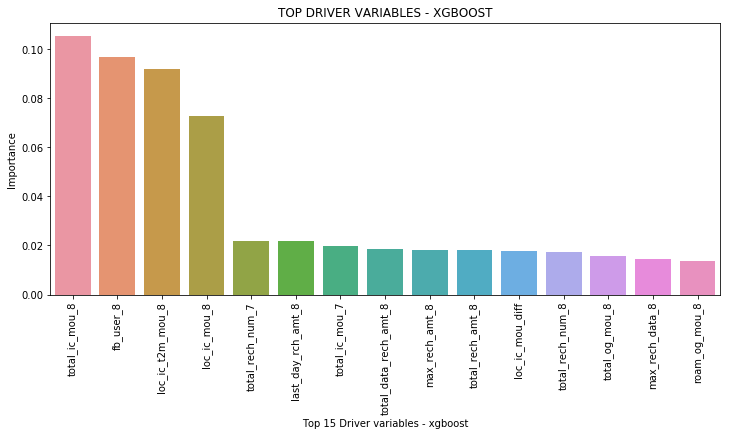

In [334]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_xg[0:15])
ax.set(xlabel = 'Top 15 Driver variables - xgboost', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - XGBOOST")
plt.show()

##### The features that influence the churn of the customer as per xgboost model are as follows:
    
- total_ic_mou_8
- loc_ic_t2m_mou_8
- loc_ic_mou_8
- max_rech_data_8
- total_rech_amt_8
- total_data_rech_amt_8
- total_rech_num_7
- max_rech_data_7
- last_day_rch_amt_8
- total_ic_mou_7

In [335]:
### PREDICTION MODELS CONSOLIDATION:

data_interpret = [['logistic_rfe',0.85,0.86,0.85,0.34,0.85],
                   ['Randomforest_all_features',0.90,0.91,0.81,0.98,0.94],
                   ['Xgboost_all_features',0.94,0.98,0.53,0.96,0.96]]

results_interpret_df = pd.DataFrame(data_interpret,columns = ['Model Name','Accuracy','Sensitivity or Recall',
                                                               'Specificity','Precision','Area under ROC curve'])
results_interpret_df

Model Name  Accuracy  Sensitivity or Recall  Specificity  Precision  Area under ROC curve
0               logistic_rfe      0.85                   0.86         0.85       0.34                  0.85
1  Randomforest_all_features      0.90                   0.91         0.81       0.98                  0.94
2       Xgboost_all_features      0.94                   0.98         0.53       0.96                  0.96

##### Logistic regression with RFE predictor variables:

- loc_ic_mou_8
- loc_ic_mou_7
- max_rech_data_8
- arpu_7
- vol_2g_mb_diff
- last_day_rch_amt_8
- roam_og_mou_8
- days_left_rech_8
- sep_vbc_3g

##### Randomforest predictor variables:

- loc_ic_mou_8
- total_ic_mou_8
- loc_ic_t2m_mou_8
- loc_ic_t2t_mou_8
- last_day_rch_amt_8
- loc_og_t2m_mou_8
- loc_og_mou_8
- total_rech_amt_8
- total_og_mou_8
- days_left_rech_8

##### XGboost predictor variables:

- total_ic_mou_8
- loc_ic_t2m_mou_8
- loc_ic_mou_8
- max_rech_data_8
- total_rech_amt_8
- total_data_rech_amt_8
- total_rech_num_7
- max_rech_data_7
- last_day_rch_amt_8
- total_ic_mou_7

### INTERPRETABLE MODELS CONSOLIDATION:
- Sensitivity, accuracy and area under roc curve are very good for all models.
- Specificity is low in xg boost model and precision is low in logistic model with rfe.
- Random forest has decent values for all metrics, but computationally time consuming
- The ensemble alogos XGBoost and random forests performed better than logistic regression
- The top predictor variables are almost the same in all 3 models, We have identified the below as important driver variables to identify churn:

    - loc_ic_mou_8
    - total_ic_mou_8
    - last_day_rch_amt_8
    - total_rech_amt_8
    - days_left_rech_8
    - max_rech_data_8
    - days_left_rech_8
    - loc_og_t2m_mou_8
    - loc_og_mou_8
    - total_og_mou_8
    - arpu_7
    - roam_og_mou_8
    - loc_ic_t2t_mou_8
    - total_ic_mou_7
    - total_data_rech_amt_8
    - total_rech_num_7
    - max_rech_data_7
    - sep_vbc_3g


### RECOMMENDATION TO BUSINESS:

WE can use XGBOOST model to predict the churners as it has high precision and recall because predicting churners is more important that prediction non churners.So we used precision and recall as our main metrics.

From the inpretation models, most of the driver variables are same in all 3 models. We have specfied the imporatant driver variables to predict churners above.
 
From the same, we recommend the following to the business:
 
* 8th month parameters are very important for the business as we can see the most important variables are of 8th month which is the action phase
* Companies should keep track of customers incoming local call minute of usage as that is the most important variable determining the churn.This needs to be checked because the local call percentage of customers will be higher than the STD. Hence more offer on local call rates can be introduced.
* Total incoming calls percentage for customers also should be tracked and attractive extra minutes can be offered for customers with low usage
* Outgoing calls made by customers should also be checked, both local and total outgoing calls. When the percentage of out going calls made by customer decreases, company can contact the customer, get the feedback and enhance our services accordingly to retain the customer.
* Recharge amount by a customer plays an important role. When the customer starts to recharge for less amt, its an indication of churn. Reminder messages and calls can be sent to customers initially, followed my providing offers like full talk time and additional talktime.
* Data usage of customer also needs be checked by the company. When ever there is a decrease in the usage of data proactivly company can ask for the reason if the usage has decreased due to lack of network availablity steps needs to be taken to ensure this is resolved.
* Company should focus on the average revenue per user metric as it decreases the change of churn increases.
* company can focus on the last day of recharge of customers and can provide with personalised offers before the net recharge time will decrease the probability of churn
* 2g internet usage also turns up significant in the model but since the customers are moving to 3g and 4g company can take call on wheather to concentrate on this